In [ ]:
# Configuration file to set up basic assumptions

DISCOUNT_RATE = 0.10  # Example discount rate (WACC)
GROWTH_RATE = 0.12  # Example terminal growth rate
RISK_PREMIUM = 0.06  # Example risk premium for RADR
PROJECTED_CASH_FLOWS = {
    1: 160,  # Projected cash flow for year 1 in billions
    # 2: 130,
    # 3: 140,
    # 4: 150,
    2: 170
}
LAST_YEAR_CF = 64.089  # Last year's cash flow (year 5)
DEBT = 0.35  # Debt in billions
CASH = 2.82  # Cash in billions

In [ ]:
# Function to calculate the Present Value (PV) of cash flows for each year
def calculate_discounted_cash_flow():
    discounted_cash_flows = {}

    for year, cash_flow in PROJECTED_CASH_FLOWS.items():
        discounted_cash_flows[year] = cash_flow / (1 + DISCOUNT_RATE) ** year

    return discounted_cash_flows

# Function to calculate the Terminal Value (TV) based on the last projected cash flow and terminal growth rate
def calculate_terminal_value():
    terminal_value = LAST_YEAR_CF * (1 + TERMINAL_GROWTH_RATE) / (DISCOUNT_RATE - TERMINAL_GROWTH_RATE)
    print(terminal_value)
    return terminal_value

# Function to calculate the total Enterprise Value (EV) based on discounted cash flows and terminal value
def calculate_enterprise_value(discounted_cash_flows, terminal_value):
    total_discounted_cash_flows = sum(discounted_cash_flows.values())
    enterprise_value = total_discounted_cash_flows + terminal_value
    return enterprise_value

In [ ]:
def calculate_discounted_cash_flow():
    discounted_cash_flows = {}
    for year, cash_flow in PROJECTED_CASH_FLOWS.items():
        discounted_cash_flows[year] = cash_flow / (1 + DISCOUNT_RATE) ** year
    return discounted_cash_flows

def calculate_terminal_value():
    terminal_value = LAST_YEAR_CF * (1 + GROWTH_RATE) / (DISCOUNT_RATE - GROWTH_RATE)
    print("terminal_value is", terminal_value)
    return terminal_value

def calculate_enterprise_value(discounted_cash_flows, terminal_value):
    enterprise_value = sum(discounted_cash_flows.values()) + terminal_value
    # print("enterprise_value is", enterprise_value)
    return enterprise_value

def calculate_equity_value(enterprise_value, debt, cash):
    equity_value = enterprise_value - (debt - cash)
    print("equity_value is", equity_value)
    return equity_value

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows):
    years = list(discounted_cash_flows.keys())
    cash_flows = list(PROJECTED_CASH_FLOWS.values())

    plt.figure(figsize=(10, 6))
    plt.bar(years, cash_flows, label="Projected Cash Flows", color='blue', alpha=0.6)
    plt.bar(years, list(discounted_cash_flows.values()), label="Discounted Cash Flows", color='red', alpha=0.6)
    plt.xlabel("Year")
    plt.ylabel("Cash Flow (in billions)")
    plt.title("Projected Cash Flows vs Discounted Cash Flows")
    plt.legend()
    plt.show()

def plot_sensitivity_analysis(sensitivity_results):
    # Assuming sensitivity_results is a matrix or DataFrame of results from sensitivity analysis
    fig, ax = plt.subplots()
    ax.plot(sensitivity_results)
    ax.set_xlabel('Discount Rate / Growth Rate')
    ax.set_ylabel('Enterprise Value')
    ax.set_title('Sensitivity Analysis Results')
    plt.show()

In [ ]:
def plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows):
    years = list(discounted_cash_flows.keys())
    cash_flows = list(PROJECTED_CASH_FLOWS.values())

    print("DCF is:",list(discounted_cash_flows.values()))

    plt.figure(figsize=(10, 6))
    plt.bar(years, cash_flows, label="Projected Cash Flows", color='blue', alpha=0.6)
    plt.bar(years, list(discounted_cash_flows.values()), label="Discounted Cash Flows", color='red', alpha=0.6)
    plt.xlabel("Year")
    plt.ylabel("Cash Flow (in billions)")
    plt.title("Projected Cash Flows vs Discounted Cash Flows")
    plt.legend()
    plt.show()

def plot_sensitivity_analysis(sensitivity_results):
    # Assuming sensitivity_results is a matrix or DataFrame of results from sensitivity analysis
    fig, ax = plt.subplots()
    ax.plot(sensitivity_results)
    ax.set_xlabel('Discount Rate / Growth Rate')
    ax.set_ylabel('Enterprise Value')
    ax.set_title('Sensitivity Analysis Results')
    plt.show()

In [ ]:
def sensitivity_analysis(discount_rate_range, growth_rate_range):
    ev_matrix = np.zeros((len(discount_rate_range), len(growth_rate_range)))

    for i, discount_rate in enumerate(discount_rate_range):
        for j, growth_rate in enumerate(growth_rate_range):
            terminal_value = LAST_YEAR_CF * (1 + growth_rate) / (discount_rate - growth_rate)
            discounted_cash_flows = calculate_discounted_cash_flow()
            ev_matrix[i, j] = calculate_enterprise_value(discounted_cash_flows, terminal_value)

    # Plotting
    X, Y = np.meshgrid(growth_rate_range, discount_rate_range)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, ev_matrix, cmap='viridis')
    ax.set_xlabel('Growth Rate')
    ax.set_ylabel('Discount Rate')
    ax.set_zlabel('Enterprise Value')
    plt.title("Sensitivity Analysis (Discount Rate vs Growth Rate)")
    plt.show()

In [ ]:
import random
def monte_carlo_simulation(num_simulations=1000):
    simulations = []
    for _ in range(num_simulations):
        discount_rate_sim = random.uniform(0.08, 0.12)  # Simulate within a range
        growth_rate_sim = random.uniform(0.6, 0.8)  # Simulate within a range

        terminal_value = LAST_YEAR_CF * (1 + growth_rate_sim) / (discount_rate_sim - growth_rate_sim)
        discounted_cash_flows = calculate_discounted_cash_flow()
        enterprise_value = calculate_enterprise_value(discounted_cash_flows, terminal_value)
        simulations.append(enterprise_value)

    # Plot histogram of results
    plt.hist(simulations, bins=50, color='blue', edgecolor='black')
    plt.xlabel('Enterprise Value (in billions)')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation - Enterprise Value Distribution')
    plt.show()

terminal_value is -3588.9840000000017
equity_value is -3300.5635867768615
Enterprise Value: $-3303.03 billion
Equity Value: $-3300.56 billion
PCF is: [160, 170]
DCF is: [145.45454545454544, 140.49586776859502]


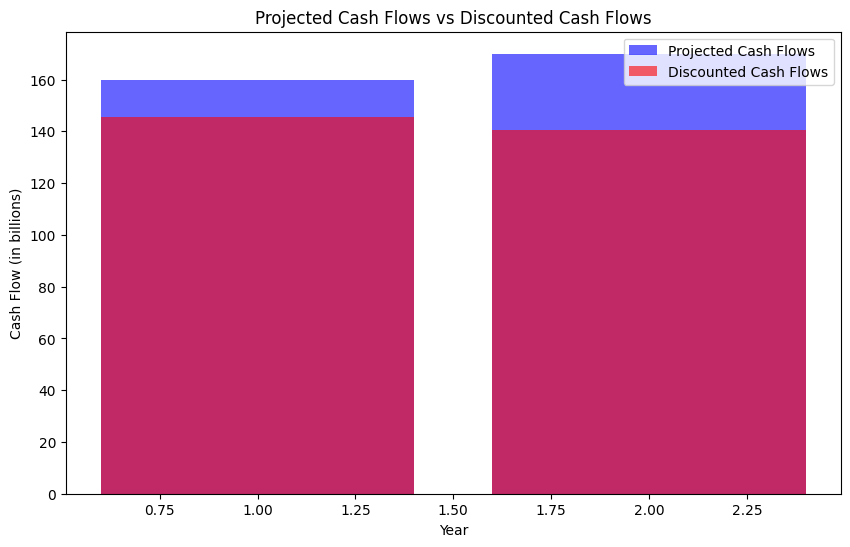

Performing Sensitivity Analysis...


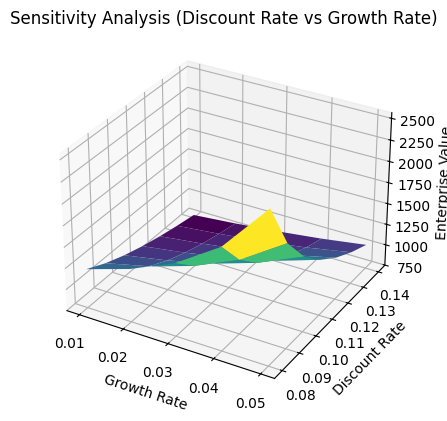

Running Monte Carlo Simulation...


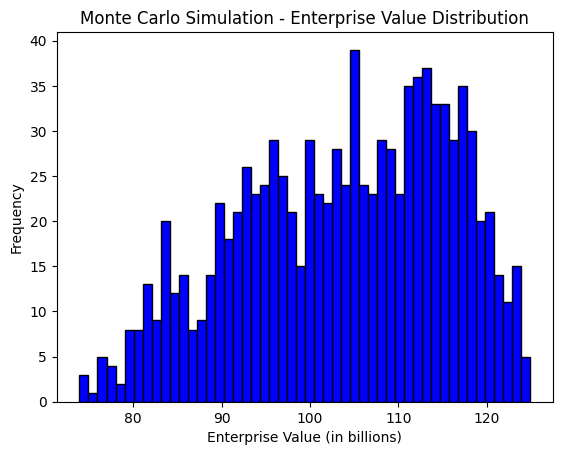

In [ ]:
import numpy as np

def main():
    # Calculate discounted cash flows and terminal value
    discounted_cash_flows = calculate_discounted_cash_flow()
    terminal_value = calculate_terminal_value()

    # Calculate enterprise value and equity value
    enterprise_value = calculate_enterprise_value(discounted_cash_flows, terminal_value)
    equity_value = calculate_equity_value(enterprise_value, DEBT, CASH)

    # Print results
    print(f"Enterprise Value: ${enterprise_value:.2f} billion")
    print(f"Equity Value: ${equity_value:.2f} billion")
    print("PCF is:",list(PROJECTED_CASH_FLOWS.values()))
    # Visualize the cash flows vs discounted cash flows
    plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows)

    # Perform Sensitivity Analysis
    print("Performing Sensitivity Analysis...")
    sensitivity_analysis(np.arange(0.08, 0.15, 0.01), np.arange(0.01, 0.06, 0.01))

    # Run Monte Carlo Simulation
    print("Running Monte Carlo Simulation...")
    monte_carlo_simulation()

if __name__ == "__main__":
    main()

In [ ]:
# Configuration file to set up basic assumptions

DISCOUNT_RATE = 0.10  # Example discount rate (10%)(WACC)
GROWTH_RATE = 0.70  # Example terminal growth rate (3%)
RISK_PREMIUM = 0.09  # Example risk premium for RADR (2%)
PROJECTED_CASH_FLOWS = {
    1: 200,  # Projected cash flow for year 1 in billions
    2: 300,
    3: 400,
    4: 500,
    5: 600
}
LAST_YEAR_CF = 64.089  # Last year's cash flow (year 5)
DEBT = 10.27  # Debt in billions
CASH = 52.69  # Cash in billions

In [ ]:
# Function to calculate the Present Value (PV) of cash flows for each year
def calculate_discounted_cash_flow():
    discounted_cash_flows = {}

    for year, cash_flow in PROJECTED_CASH_FLOWS.items():
        discounted_cash_flows[year] = cash_flow / (1 + DISCOUNT_RATE) ** year

    return discounted_cash_flows

# Function to calculate the Terminal Value (TV) based on the last projected cash flow and terminal growth rate
def calculate_terminal_value():
    terminal_value = LAST_YEAR_CF * (1 + TERMINAL_GROWTH_RATE) / (DISCOUNT_RATE - TERMINAL_GROWTH_RATE)
    print(terminal_value)
    return terminal_value

# Function to calculate the total Enterprise Value (EV) based on discounted cash flows and terminal value
def calculate_enterprise_value(discounted_cash_flows, terminal_value):
    total_discounted_cash_flows = sum(discounted_cash_flows.values())
    enterprise_value = total_discounted_cash_flows + terminal_value
    return enterprise_value

In [ ]:
def calculate_discounted_cash_flow():
    discounted_cash_flows = {}
    for year, cash_flow in PROJECTED_CASH_FLOWS.items():
        discounted_cash_flows[year] = cash_flow / (1 + DISCOUNT_RATE) ** year
    return discounted_cash_flows

def calculate_terminal_value():
    terminal_value = LAST_YEAR_CF * (1 + GROWTH_RATE) / (DISCOUNT_RATE - GROWTH_RATE)
    print("terminal_value is", terminal_value)
    return terminal_value

def calculate_enterprise_value(discounted_cash_flows, terminal_value):
    enterprise_value = sum(discounted_cash_flows.values()) + terminal_value
    # print("enterprise_value is", enterprise_value)
    return enterprise_value

def calculate_equity_value(enterprise_value, debt, cash):
    equity_value = enterprise_value - (debt - cash)
    print("equity_value is", equity_value)
    return equity_value

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows):
    years = list(discounted_cash_flows.keys())
    cash_flows = list(PROJECTED_CASH_FLOWS.values())

    plt.figure(figsize=(10, 6))
    plt.bar(years, cash_flows, label="Projected Cash Flows", color='blue', alpha=0.6)
    plt.bar(years, list(discounted_cash_flows.values()), label="Discounted Cash Flows", color='red', alpha=0.6)
    plt.xlabel("Year")
    plt.ylabel("Cash Flow (in billions)")
    plt.title("Projected Cash Flows vs Discounted Cash Flows")
    plt.legend()
    plt.show()

def plot_sensitivity_analysis(sensitivity_results):
    # Assuming sensitivity_results is a matrix or DataFrame of results from sensitivity analysis
    fig, ax = plt.subplots()
    ax.plot(sensitivity_results)
    ax.set_xlabel('Discount Rate / Growth Rate')
    ax.set_ylabel('Enterprise Value')
    ax.set_title('Sensitivity Analysis Results')
    plt.show()

In [ ]:
def plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows):
    years = list(discounted_cash_flows.keys())
    cash_flows = list(PROJECTED_CASH_FLOWS.values())

    print("DCF is:",list(discounted_cash_flows.values()))

    plt.figure(figsize=(10, 6))
    plt.bar(years, cash_flows, label="Projected Cash Flows", color='blue', alpha=0.6)
    plt.bar(years, list(discounted_cash_flows.values()), label="Discounted Cash Flows", color='red', alpha=0.6)
    plt.xlabel("Year")
    plt.ylabel("Cash Flow (in billions)")
    plt.title("Projected Cash Flows vs Discounted Cash Flows")
    plt.legend()
    plt.show()

def plot_sensitivity_analysis(sensitivity_results):
    # Assuming sensitivity_results is a matrix or DataFrame of results from sensitivity analysis
    fig, ax = plt.subplots()
    ax.plot(sensitivity_results)
    ax.set_xlabel('Discount Rate / Growth Rate')
    ax.set_ylabel('Enterprise Value')
    ax.set_title('Sensitivity Analysis Results')
    plt.show()

In [ ]:
def sensitivity_analysis(discount_rate_range, growth_rate_range):
    ev_matrix = np.zeros((len(discount_rate_range), len(growth_rate_range)))

    for i, discount_rate in enumerate(discount_rate_range):
        for j, growth_rate in enumerate(growth_rate_range):
            terminal_value = LAST_YEAR_CF * (1 + growth_rate) / (discount_rate - growth_rate)
            discounted_cash_flows = calculate_discounted_cash_flow()
            ev_matrix[i, j] = calculate_enterprise_value(discounted_cash_flows, terminal_value)

    # Plotting
    X, Y = np.meshgrid(growth_rate_range, discount_rate_range)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, ev_matrix, cmap='viridis')
    ax.set_xlabel('Growth Rate')
    ax.set_ylabel('Discount Rate')
    ax.set_zlabel('Enterprise Value')
    plt.title("Sensitivity Analysis (Discount Rate vs Growth Rate)")
    plt.show()

In [ ]:
import random
def monte_carlo_simulation(num_simulations=1000):
    simulations = []
    for _ in range(num_simulations):
        discount_rate_sim = random.uniform(0.08, 0.12)  # Simulate within a range
        growth_rate_sim = random.uniform(0.6, 0.8)  # Simulate within a range

        terminal_value = LAST_YEAR_CF * (1 + growth_rate_sim) / (discount_rate_sim - growth_rate_sim)
        discounted_cash_flows = calculate_discounted_cash_flow()
        enterprise_value = calculate_enterprise_value(discounted_cash_flows, terminal_value)
        simulations.append(enterprise_value)

    # Plot histogram of results
    plt.hist(simulations, bins=50, color='blue', edgecolor='black')
    plt.xlabel('Enterprise Value (in billions)')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation - Enterprise Value Distribution')
    plt.show()

terminal_value is -181.5855
equity_value is 1305.1720079943618
Enterprise Value: $1262.75 billion
Equity Value: $1305.17 billion
PCF is: [200, 300, 400, 500, 600]
DCF is: [181.8181818181818, 247.93388429752062, 300.525920360631, 341.50672768253526, 372.552793835493]


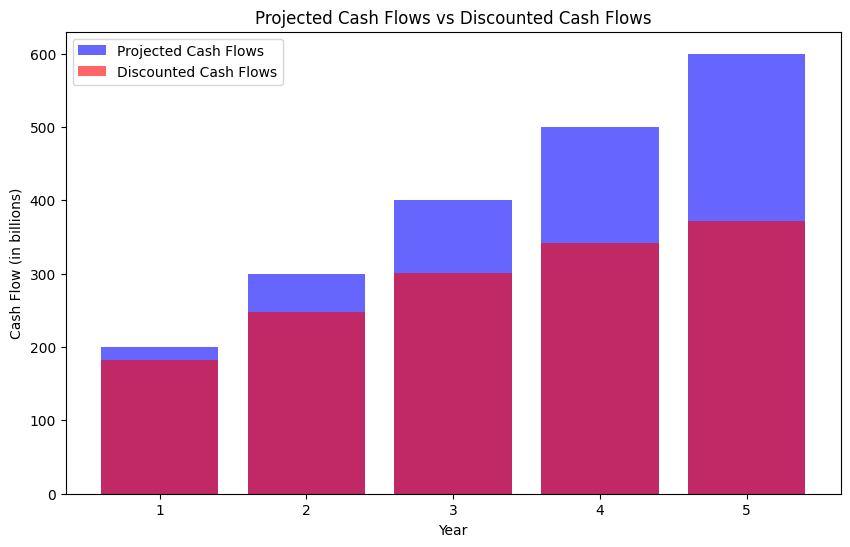

Performing Sensitivity Analysis...


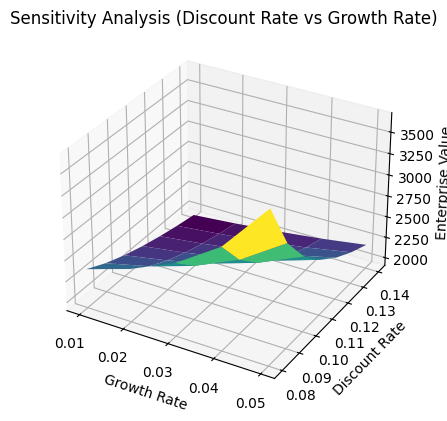

Running Monte Carlo Simulation...


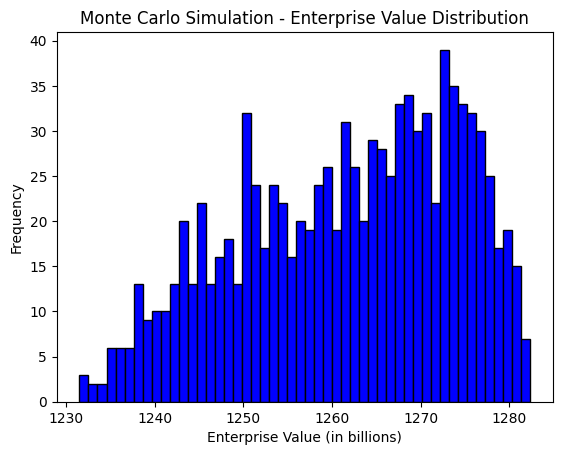

In [ ]:
import numpy as np

def main():
    # Calculate discounted cash flows and terminal value
    discounted_cash_flows = calculate_discounted_cash_flow()
    terminal_value = calculate_terminal_value()

    # Calculate enterprise value and equity value
    enterprise_value = calculate_enterprise_value(discounted_cash_flows, terminal_value)
    equity_value = calculate_equity_value(enterprise_value, DEBT, CASH)

    # Print results
    print(f"Enterprise Value: ${enterprise_value:.2f} billion")
    print(f"Equity Value: ${equity_value:.2f} billion")
    print("PCF is:",list(PROJECTED_CASH_FLOWS.values()))

    # Visualize the cash flows vs discounted cash flows
    plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows)

    # Perform Sensitivity Analysis
    print("Performing Sensitivity Analysis...")
    sensitivity_analysis(np.arange(0.08, 0.15, 0.01), np.arange(0.01, 0.06, 0.01))

    # Run Monte Carlo Simulation
    print("Running Monte Carlo Simulation...")
    monte_carlo_simulation()

if __name__ == "__main__":
    main()

In [ ]:
# Configuration file to set up basic assumptions

DISCOUNT_RATE = 0.10  # Example discount rate (10%)(WACC)
GROWTH_RATE = 0.70  # Example terminal growth rate (3%)
RISK_PREMIUM = 0.09  # Example risk premium for RADR (2%)
PROJECTED_CASH_FLOWS = {
    1: 200,  # Projected cash flow for year 1 in billions
    2: 180,
    3: 150,
    4: 110,
    5: 100
}
LAST_YEAR_CF = 64.089  # Last year's cash flow (year 5)
DEBT = 10.27  # Debt in billions
CASH = 52.69  # Cash in billions

terminal_value is -181.5855
equity_value is 441.333844928004
Enterprise Value: $398.91 billion
Equity Value: $441.33 billion
PCF is: [200, 180, 150, 110, 100]
DCF is: [181.8181818181818, 148.76033057851237, 112.69722013523663, 75.13148009015775, 62.0921323059155]


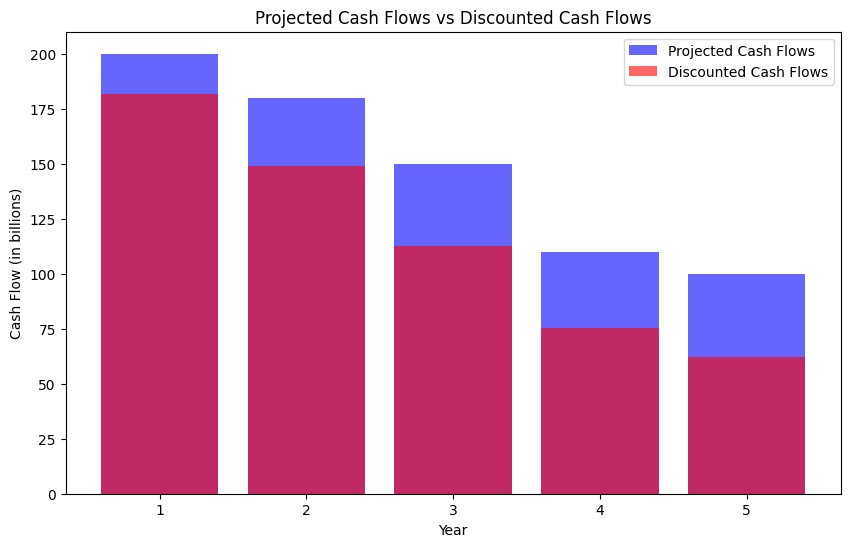

Performing Sensitivity Analysis...


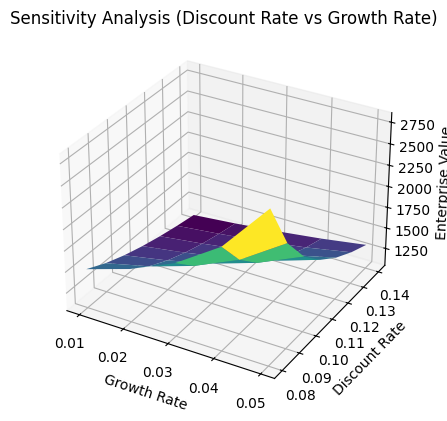

Running Monte Carlo Simulation...


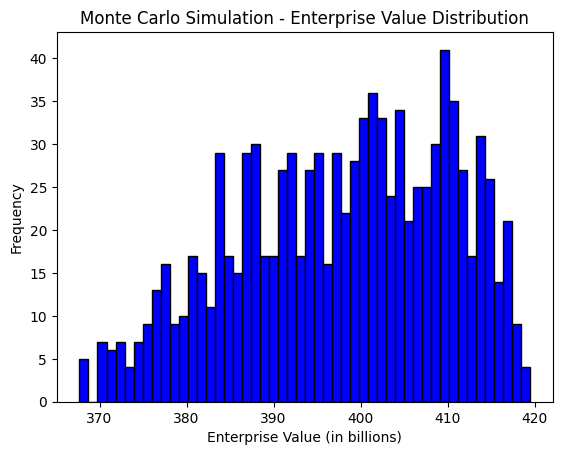

In [ ]:
import numpy as np

def main():
    # Calculate discounted cash flows and terminal value
    discounted_cash_flows = calculate_discounted_cash_flow()
    terminal_value = calculate_terminal_value()

    # Calculate enterprise value and equity value
    enterprise_value = calculate_enterprise_value(discounted_cash_flows, terminal_value)
    equity_value = calculate_equity_value(enterprise_value, DEBT, CASH)

    # Print results
    print(f"Enterprise Value: ${enterprise_value:.2f} billion")
    print(f"Equity Value: ${equity_value:.2f} billion")
    print("PCF is:",list(PROJECTED_CASH_FLOWS.values()))

    # Visualize the cash flows vs discounted cash flows
    plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows)

    # Perform Sensitivity Analysis
    print("Performing Sensitivity Analysis...")
    sensitivity_analysis(np.arange(0.08, 0.15, 0.01), np.arange(0.01, 0.06, 0.01))

    # Run Monte Carlo Simulation
    print("Running Monte Carlo Simulation...")
    monte_carlo_simulation()

if __name__ == "__main__":
    main()

In [ ]:
# Configuration file to set up basic assumptions

DISCOUNT_RATE = 0.10  # Example discount rate (10%)(WACC)
GROWTH_RATE = 0.70  # Example terminal growth rate (3%)
RISK_PREMIUM = 0.09  # Example risk premium for RADR (2%)
PROJECTED_CASH_FLOWS = {
    1: 150,  # Projected cash flow for year 1 in billions
    2: 180,
    3: 200,
    4: 170,
    5: 130
}
LAST_YEAR_CF = 64.089  # Last year's cash flow (year 5)
DEBT = 10.27  # Debt in billions
CASH = 52.69  # Cash in billions

terminal_value is -181.5855
equity_value is 493.05348653221637
Enterprise Value: $450.63 billion
Equity Value: $493.05 billion
PCF is: [150, 180, 200, 170, 130]
DCF is: [136.36363636363635, 148.76033057851237, 150.2629601803155, 116.11228741206199, 80.71977199769015]


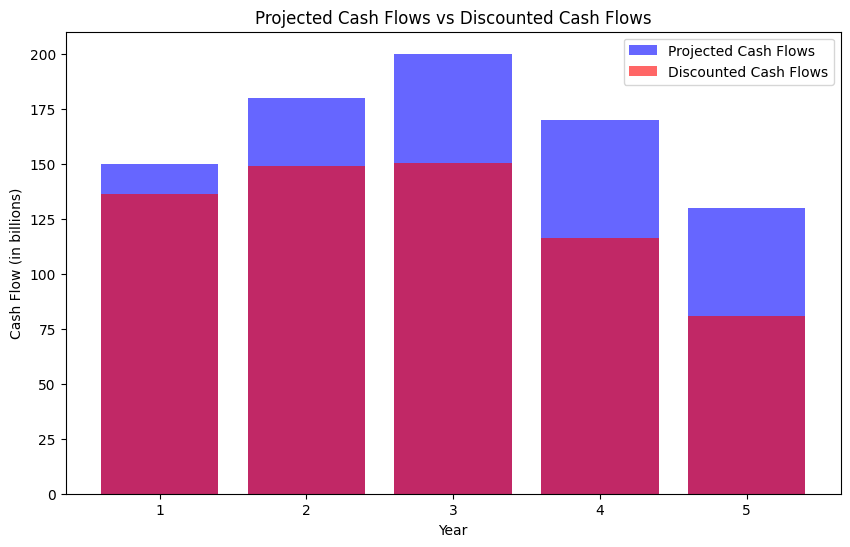

Performing Sensitivity Analysis...


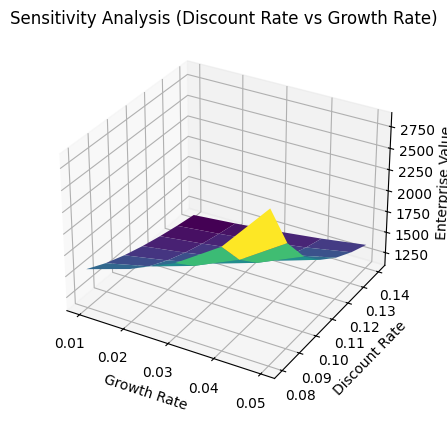

Running Monte Carlo Simulation...


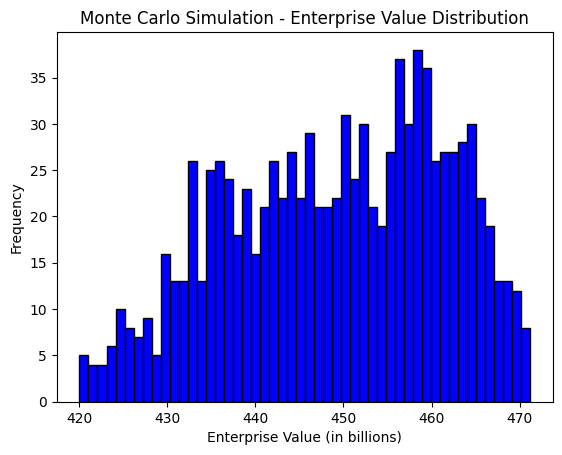

In [ ]:
import numpy as np

def main():
    # Calculate discounted cash flows and terminal value
    discounted_cash_flows = calculate_discounted_cash_flow()
    terminal_value = calculate_terminal_value()

    # Calculate enterprise value and equity value
    enterprise_value = calculate_enterprise_value(discounted_cash_flows, terminal_value)
    equity_value = calculate_equity_value(enterprise_value, DEBT, CASH)

    # Print results
    print(f"Enterprise Value: ${enterprise_value:.2f} billion")
    print(f"Equity Value: ${equity_value:.2f} billion")
    print("PCF is:",list(PROJECTED_CASH_FLOWS.values()))

    # Visualize the cash flows vs discounted cash flows
    plot_cash_flows_vs_discounted_cash_flows(discounted_cash_flows)

    # Perform Sensitivity Analysis
    print("Performing Sensitivity Analysis...")
    sensitivity_analysis(np.arange(0.08, 0.15, 0.01), np.arange(0.01, 0.06, 0.01))

    # Run Monte Carlo Simulation
    print("Running Monte Carlo Simulation...")
    monte_carlo_simulation()

if __name__ == "__main__":
    main()

In [ ]:
import yfinance as yf
def discounted_cash_flow(ticker, years=5, discount_rate=0.10, fcf_growth=0.08, terminal_growth=0.02):
    stock = yf.Ticker(ticker)

    # Step 1: Get trailing 12-month free cash flow
    cashflow = stock.cashflow
    if "Total Cash From Operating Activities" not in cashflow.index or "Capital Expenditures" not in cashflow.index:
        return "Missing FCF data"

    ocf = cashflow.loc["Total Cash From Operating Activities"].iloc[0]
    capex = cashflow.loc["Capital Expenditures"].iloc[0]
    fcf = ocf + capex  # CapEx is negative

    if fcf < 0:
        return "Negative FCF, DCF not reliable"

    # Step 2: Project future FCF
    projected_fcfs = [fcf * ((1 + fcf_growth) ** i) for i in range(1, years + 1)]

    # Step 3: Terminal Value (Gordon Growth)
    terminal_value = projected_fcfs[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)

    # Step 4: Discount to present value
    discounted_fcfs = [fcf / ((1 + discount_rate) ** i) for i, fcf in enumerate(projected_fcfs, start=1)]
    discounted_terminal = terminal_value / ((1 + discount_rate) ** years)

    # Step 5: Enterprise value
    enterprise_value = sum(discounted_fcfs) + discounted_terminal

    # Step 6: Get share count and calculate intrinsic value per share
    info = stock.info
    shares_outstanding = info.get("sharesOutstanding", None)
    current_price = info.get("currentPrice", None)

    if shares_outstanding and current_price:
        fair_value_per_share = enterprise_value / shares_outstanding
        return {
            "Ticker": ticker,
            "Fair Value per Share": round(fair_value_per_share, 2),
            "Current Price": round(current_price, 2),
            "Undervalued (%)": round((fair_value_per_share - current_price) / current_price * 100, 2)
        }
    else:
        return "Missing share count or price"


In [ ]:
result = discounted_cash_flow("NVDA")
print(result)


Missing FCF data


In [ ]:
import yfinance as yf

def check_fcf_data(ticker):
    stock = yf.Ticker(ticker)
    cashflow = stock.cashflow

    return {
        "cashflow_index": list(cashflow.index),
        "available_columns": list(cashflow.columns),
        "has_ocf": "Total Cash From Operating Activities" in cashflow.index,
        "has_capex": "Capital Expenditures" in cashflow.index,
        "cashflow_snapshot": cashflow.head(5).to_dict()
    }

check_fcf_data("AAPL")


{'cashflow_index': ['Free Cash Flow',
  'Repurchase Of Capital Stock',
  'Repayment Of Debt',
  'Issuance Of Debt',
  'Issuance Of Capital Stock',
  'Capital Expenditure',
  'Interest Paid Supplemental Data',
  'Income Tax Paid Supplemental Data',
  'End Cash Position',
  'Beginning Cash Position',
  'Changes In Cash',
  'Financing Cash Flow',
  'Cash Flow From Continuing Financing Activities',
  'Net Other Financing Charges',
  'Cash Dividends Paid',
  'Common Stock Dividend Paid',
  'Net Common Stock Issuance',
  'Common Stock Payments',
  'Common Stock Issuance',
  'Net Issuance Payments Of Debt',
  'Net Short Term Debt Issuance',
  'Net Long Term Debt Issuance',
  'Long Term Debt Payments',
  'Long Term Debt Issuance',
  'Investing Cash Flow',
  'Cash Flow From Continuing Investing Activities',
  'Net Other Investing Changes',
  'Net Investment Purchase And Sale',
  'Sale Of Investment',
  'Purchase Of Investment',
  'Net Business Purchase And Sale',
  'Purchase Of Business',
  'Ne

In [ ]:
import yfinance as yf

def dcf_with_fcf(ticker, growth_rate=0.08, discount_rate=0.10, terminal_growth=0.02, years=5):
    stock = yf.Ticker(ticker)
    cashflow = stock.cashflow

    # Step 1: Use "Free Cash Flow" directly
    if "Free Cash Flow" not in cashflow.index:
        return f"Free Cash Flow data not available for {ticker}"

    fcf_series = cashflow.loc["Free Cash Flow"].dropna().sort_index()
    if fcf_series.empty:
        return f"No non-NaN FCF data found for {ticker}"

    last_fcf = fcf_series.iloc[-1]
    if last_fcf <= 0:
        return f"Last year's FCF is zero or negative: {last_fcf}"

    # Step 2: Project FCF for future years
    projected_fcfs = [last_fcf * (1 + growth_rate) ** i for i in range(1, years + 1)]

    # Step 3: Compute Terminal Value using Gordon Growth
    terminal_value = projected_fcfs[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)

    # Step 4: Discount all future cash flows to present value
    discounted_fcfs = [fcf / ((1 + discount_rate) ** i) for i, fcf in enumerate(projected_fcfs, start=1)]
    discounted_terminal = terminal_value / ((1 + discount_rate) ** years)

    enterprise_value = sum(discounted_fcfs) + discounted_terminal

    # Step 5: Calculate intrinsic value per share
    info = stock.info
    shares = info.get("sharesOutstanding")
    price = info.get("currentPrice")

    if not shares or not price:
        return "Missing share count or current price"

    fair_value = enterprise_value / shares

    return {
        "Ticker": ticker,
        "Current Price": round(price, 2),
        "Fair Value (DCF)": round(fair_value, 2),
        "Undervaluation (%)": round((fair_value - price) / price * 100, 2)
    }


In [ ]:
result = dcf_with_fcf("AAPL")
print(result)


{'Ticker': 'AAPL', 'Current Price': 211.18, 'Fair Value (DCF)': np.float64(119.23), 'Undervaluation (%)': np.float64(-43.54)}


In [ ]:
result = dcf_with_fcf("NVDA")
print(result)


{'Ticker': 'NVDA', 'Current Price': 172.41, 'Fair Value (DCF)': np.float64(40.84), 'Undervaluation (%)': np.float64(-76.31)}


In [ ]:
from google.colab import files
df1 = files.upload()

Saving last_year_vs_current.csv to last_year_vs_current.csv


In [ ]:
import pandas as pd
import yfinance as yf

# STEP 1: Load your dataset from CSV file
df = pd.read_csv("last_year_vs_current.csv")  # Make sure xyz.csv is in the same directory

# STEP 2: Define the DCF calculation function using Free Cash Flow
def dcf_with_fcf(ticker, growth_rate=0.08, discount_rate=0.10, terminal_growth=0.02, years=5):
    try:
        stock = yf.Ticker(ticker)
        cashflow = stock.cashflow

        if "Free Cash Flow" not in cashflow.index:
            return None, None

        fcf_series = cashflow.loc["Free Cash Flow"].dropna().sort_index()
        if fcf_series.empty:
            return None, None

        last_fcf = fcf_series.iloc[-1]
        if last_fcf <= 0:
            return None, None

        # Project FCF for next N years
        projected_fcfs = [last_fcf * ((1 + growth_rate) ** i) for i in range(1, years + 1)]
        terminal_value = projected_fcfs[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)

        # Discount to present value
        discounted_fcfs = [fcf / ((1 + discount_rate) ** i) for i, fcf in enumerate(projected_fcfs, start=1)]
        discounted_terminal = terminal_value / ((1 + discount_rate) ** years)
        enterprise_value = sum(discounted_fcfs) + discounted_terminal

        shares = stock.info.get("sharesOutstanding")
        price = stock.info.get("currentPrice")

        if not shares or not price:
            return None, None

        fair_value = enterprise_value / shares
        valuation_pct = (fair_value - price) / price * 100

        return round(fair_value, 2), round(valuation_pct, 2)

    except Exception as e:
        print(f"{ticker}: Error - {e}")
        return None, None

# STEP 3: Apply DCF to all tickers and store results
df["dcf"], df["dcf_valuation"] = zip(*df["ticker"].apply(dcf_with_fcf))

# STEP 4: Save result into a new CSV file
df.to_csv("xyz_with_dcf.csv", index=False)

print("✅ DCF analysis complete! Results saved to xyz_with_dcf.csv")


✅ DCF analysis complete! Results saved to xyz_with_dcf.csv


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def fetch_nvda_data():
    nvda = yf.Ticker("NVDA")
    info = nvda.info

    # Extract current revenue and operating margin
    revenue = info.get("totalRevenue", None)
    op_margin = info.get("operatingMargins", None)

    if revenue is None or op_margin is None:
        raise ValueError("Could not fetch required data from Yahoo Finance.")

    return revenue, op_margin

def generate_valuation_table(base_revenue, multiple=20):
    # Growth and margin ranges
    revenue_growth_rates = np.arange(0.05, 0.13, 0.01)     # 5% to 12%
    operating_margins = np.arange(0.06, 0.085, 0.005)       # 6% to 8%

    # Create DataFrame for table
    table = pd.DataFrame(index=[f"{int(r*100)}%" for r in revenue_growth_rates],
                         columns=[f"{round(m*100, 1)}%" for m in operating_margins])

    for growth in revenue_growth_rates:
        for margin in operating_margins:
            projected_revenue = base_revenue * (1 + growth)
            operating_income = projected_revenue * margin
            valuation = operating_income * multiple
            table.loc[f"{int(growth*100)}%", f"{round(margin*100, 1)}%"] = round(valuation / 1e9, 2)  # in billion USD

    return table

# Fetch real NVIDIA data
revenue, op_margin = fetch_nvda_data()
print(f"NVIDIA Latest Total Revenue (TTM): ${revenue/1e9:.2f}B")
print(f"NVIDIA Operating Margin: {op_margin:.2%}")

# Generate and print valuation table
valuation_table = generate_valuation_table(revenue)
print("\nValuation Sensitivity Table (in Billion USD):")
print(valuation_table)


NVIDIA Latest Total Revenue (TTM): $148.51B
NVIDIA Operating Margin: 49.11%

Valuation Sensitivity Table (in Billion USD):
       6.0%    6.5%    7.0%    7.5%    8.0%    8.5%
5%   187.13  202.72  218.32  233.91  249.51   265.1
6%   188.91  204.65   220.4  236.14  251.88  267.62
7%   190.69  206.58  222.48  238.37  254.26  270.15
8%   192.48  208.52  224.55  240.59  256.63  272.67
9%   194.26  210.45  226.63  242.82  259.01   275.2
10%  196.04  212.38  228.71  245.05  261.39  277.72
11%  197.82  214.31  230.79  247.28  263.76  280.25
12%   199.6  216.24  232.87  249.51  266.14  282.77


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def fetch_nvda_data():
    nvda = yf.Ticker("BYD")
    info = nvda.info

    # Extract current revenue and operating margin
    revenue = info.get("totalRevenue", None)
    op_margin = info.get("operatingMargins", None)

    if revenue is None or op_margin is None:
        raise ValueError("Could not fetch required data from Yahoo Finance.")

    return revenue, op_margin

def generate_valuation_table(base_revenue, multiple=20):
    # Growth and margin ranges
    revenue_growth_rates = np.arange(0.05, 0.13, 0.01)     # 5% to 12%
    operating_margins = np.arange(0.06, 0.085, 0.005)       # 6% to 8%

    # Create DataFrame for table
    table = pd.DataFrame(index=[f"{int(r*100)}%" for r in revenue_growth_rates],
                         columns=[f"{round(m*100, 1)}%" for m in operating_margins])

    for growth in revenue_growth_rates:
        for margin in operating_margins:
            projected_revenue = base_revenue * (1 + growth)
            operating_income = projected_revenue * margin
            valuation = operating_income * multiple
            table.loc[f"{int(growth*100)}%", f"{round(margin*100, 1)}%"] = round(valuation / 1e9, 2)  # in billion USD

    return table

# Fetch real NVIDIA data
revenue, op_margin = fetch_nvda_data()
print(f"Tesla Latest Total Revenue (TTM): ${revenue/1e9:.2f}B")
print(f"Tesla Operating Margin: {op_margin:.2%}")

# Generate and print valuation table
valuation_table = generate_valuation_table(revenue)
print("\nValuation Sensitivity Table (in Billion USD):")
print(valuation_table)


Tesla Latest Total Revenue (TTM): $3.96B
Tesla Operating Margin: 23.41%

Valuation Sensitivity Table (in Billion USD):
     6.0%  6.5%  7.0%  7.5%  8.0%  8.5%
5%   4.99  5.41  5.82  6.24  6.65  7.07
6%   5.04  5.46  5.88   6.3  6.72  7.14
7%   5.09  5.51  5.93  6.36  6.78  7.21
8%   5.13  5.56  5.99  6.42  6.85  7.27
9%   5.18  5.61  6.04  6.48  6.91  7.34
10%  5.23  5.66   6.1  6.54  6.97  7.41
11%  5.28  5.72  6.16   6.6  7.04  7.47
12%  5.32  5.77  6.21  6.65   7.1  7.54


In [ ]:
import numpy as np
import pandas as pd

def generate_byd_reference_table(base_revenue_usd_billion, multiple):
    # Define revenue growth and margin ranges
    revenue_growth_rates = np.arange(0.05, 0.13, 0.01)     # 5% to 12%
    operating_margins = np.arange(0.06, 0.085, 0.005)       # 6% to 8%

    # Create table
    table = pd.DataFrame(index=[f"{int(r*100)}%" for r in revenue_growth_rates],
                         columns=[f"{round(m*100, 1)}%" for m in operating_margins])

    for growth in revenue_growth_rates:
        for margin in operating_margins:
            projected_revenue = base_revenue_usd_billion * (1 + growth)
            operating_income = projected_revenue * margin
            valuation = operating_income * multiple
            table.loc[f"{int(growth*100)}%", f"{round(margin*100, 1)}%"] = round(valuation, 2)

    return table

# Match your reference BYD values
byd_base_revenue = 100  # example: 70B USD revenue (adjust to match table)
valuation_multiple = 15  # example: 15x EBITDA/OpInc (adjust as needed)

# Generate table
byd_table = generate_byd_reference_table(byd_base_revenue, valuation_multiple)
print("Valuation Table for BYD (in Billion USD):")
print(byd_table)


Valuation Table for BYD (in Billion USD):
      6.0%    6.5%    7.0%    7.5%   8.0%    8.5%
5%    94.5  102.38  110.25  118.13  126.0  133.88
6%    95.4  103.35   111.3  119.25  127.2  135.15
7%    96.3  104.32  112.35  120.38  128.4  136.43
8%    97.2   105.3   113.4   121.5  129.6   137.7
9%    98.1  106.28  114.45  122.63  130.8  138.98
10%   99.0  107.25   115.5  123.75  132.0  140.25
11%   99.9  108.22  116.55  124.88  133.2  141.53
12%  100.8   109.2   117.6   126.0  134.4   142.8


In [ ]:
import numpy as np
import pandas as pd

def generate_byd_paper_table(base_revenue_billion=140.81, multiple=47):
    # Growth and margin ranges exactly as in the paper
    revenue_growth_rates = np.arange(0.05, 0.13, 0.01)     # 5% to 12%
    operating_margins = np.arange(0.06, 0.085, 0.005)       # 6% to 8%

    # Create DataFrame
    table = pd.DataFrame(index=[f"{int(r*100)}%" for r in revenue_growth_rates],
                         columns=[f"{round(m*100, 1)}%" for m in operating_margins])

    for growth in revenue_growth_rates:
        for margin in operating_margins:
            projected_revenue = base_revenue_billion * (1 + growth)
            operating_income = projected_revenue * margin
            valuation = operating_income * multiple
            table.loc[f"{int(growth*100)}%", f"{round(margin*100, 1)}%"] = round(valuation, 2)

    return table

# Generate and print the table
byd_paper_table = generate_byd_paper_table()
print("Replicated Valuation Sensitivity Table for BYD (in Billion USD):")
print(byd_paper_table)


Replicated Valuation Sensitivity Table for BYD (in Billion USD):
       6.0%    6.5%    7.0%    7.5%    8.0%    8.5%
5%   416.94  451.68  486.43  521.17  555.92  590.66
6%   420.91  455.99  491.06  526.14  561.21  596.29
7%   424.88  460.29  495.69   531.1  566.51  601.91
8%   428.85  464.59  500.33  536.06   571.8  607.54
9%   432.82  468.89  504.96  541.03   577.1  613.16
10%  436.79  473.19  509.59  545.99  582.39  618.79
11%  440.76  477.49  514.22  550.95  587.68  624.41
12%  444.73   481.8  518.86  555.92  592.98  630.04


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

def fetch_financials(ticker_symbol, currency_conversion=1.0):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    revenue = info.get("totalRevenue")
    margin = info.get("operatingMargins")
    currency = info.get("financialCurrency", "USD")

    if revenue is None or margin is None:
        raise ValueError(f"Could not fetch data for {ticker_symbol}")

    revenue_usd = revenue * currency_conversion / 1e9  # Convert to billion USD
    return revenue_usd, margin, currency

def generate_sensitivity_table(base_revenue_billion, multiple=20):
    growth_rates = np.arange(0.05, 0.13, 0.01)     # 5% to 12%
    margins = np.arange(0.06, 0.085, 0.005)         # 6% to 8%

    table = pd.DataFrame(index=[f"{int(g*100)}%" for g in growth_rates],
                         columns=[f"{round(m*100,1)}%" for m in margins])

    for g in growth_rates:
        for m in margins:
            projected_revenue = base_revenue_billion * (1 + g)
            op_income = projected_revenue * m
            valuation = op_income * multiple
            table.loc[f"{int(g*100)}%", f"{round(m*100,1)}%"] = round(valuation, 2)

    return table

def main(ticker, multiple=47, currency_conversion=1.0):
    print(f"\nFetching data for: {ticker}")
    try:
        base_revenue_billion, op_margin, currency = fetch_financials(ticker, currency_conversion)
        print(f"Revenue (TTM): {base_revenue_billion:.2f}B USD")
        print(f"Operating Margin: {op_margin:.2%} | Currency: {currency}")
        print(f"Valuation Multiple Used: {multiple}x\n")

        table = generate_sensitivity_table(base_revenue_billion, multiple)
        print("Valuation Sensitivity Table (in Billion USD):")
        print(table)
    except Exception as e:
        print(f"Error: {e}")

# 🔁 Example usage
main("NVDA")        # NVIDIA (USD)
# main("BYDDF")     # BYD (OTC USD)
# main("1211.HK", currency_conversion=0.13)  # BYD Hong Kong, convert HKD to USD



Fetching data for: NVDA
Revenue (TTM): 148.51B USD
Operating Margin: 49.11% | Currency: USD
Valuation Multiple Used: 47x

Valuation Sensitivity Table (in Billion USD):
       6.0%    6.5%    7.0%    7.5%    8.0%    8.5%
5%   439.75   476.4  513.05  549.69  586.34  622.98
6%   443.94  480.94  517.93  554.93  591.92  628.92
7%   448.13  485.47  522.82  560.16  597.51  634.85
8%   452.32  490.01   527.7   565.4  603.09  640.78
9%   456.51  494.55  532.59  570.63  608.67  646.72
10%  460.69  499.08  537.48  575.87  614.26  652.65
11%  464.88  503.62  542.36   581.1  619.84  658.58
12%  469.07  508.16  547.25  586.34  625.43  664.52


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

def fetch_financials(ticker_symbol, currency_conversion=1.0):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    revenue = info.get("totalRevenue")
    margin = info.get("operatingMargins")
    currency = info.get("financialCurrency", "USD")

    if revenue is None or margin is None:
        raise ValueError(f"Could not fetch data for {ticker_symbol}")

    revenue_usd = revenue * currency_conversion / 1e9  # Convert to billion USD
    return revenue_usd, margin, currency

def generate_sensitivity_table(base_revenue_billion, multiple=20):
    growth_rates = np.arange(0.05, 0.13, 0.01)     # 5% to 12%
    margins = np.arange(0.06, 0.085, 0.005)         # 6% to 8%

    table = pd.DataFrame(index=[f"{int(g*100)}%" for g in growth_rates],
                         columns=[f"{round(m*100,1)}%" for m in margins])

    for g in growth_rates:
        for m in margins:
            projected_revenue = base_revenue_billion * (1 + g)
            op_income = projected_revenue * m
            valuation = op_income * multiple
            table.loc[f"{int(g*100)}%", f"{round(m*100,1)}%"] = round(valuation, 2)

    return table

def main(ticker, multiple=47, currency_conversion=1.0):
    print(f"\nFetching data for: {ticker}")
    try:
        base_revenue_billion, op_margin, currency = fetch_financials(ticker, currency_conversion)
        print(f"Revenue (TTM): {base_revenue_billion:.2f}B USD")
        print(f"Operating Margin: {op_margin:.2%} | Currency: {currency}")
        print(f"Valuation Multiple Used: {multiple}x\n")

        table = generate_sensitivity_table(base_revenue_billion, multiple)
        print("Valuation Sensitivity Table (in Billion USD):")
        print(table)
    except Exception as e:
        print(f"Error: {e}")

# 🔁 Example usage
# main("NVDA")        # NVIDIA (USD)
main("BYDDF")     # BYD (OTC USD)
# main("1211.HK", currency_conversion=0.13)  # BYD Hong Kong, convert HKD to USD



Fetching data for: BYDDF
Revenue (TTM): 822.52B USD
Operating Margin: 4.95% | Currency: CNY
Valuation Multiple Used: 47x

Valuation Sensitivity Table (in Billion USD):
        6.0%     6.5%     7.0%     7.5%     8.0%     8.5%
5%   2435.48  2638.43  2841.39  3044.35   3247.3  3450.26
6%   2458.67  2663.56  2868.45  3073.34  3278.23  3483.12
7%   2481.87  2688.69  2895.51  3102.33  3309.16  3515.98
8%   2505.06  2713.82  2922.57  3131.33  3340.08  3548.84
9%   2528.26  2738.95  2949.63  3160.32  3371.01   3581.7
10%  2551.45  2764.07  2976.69  3189.32  3401.94  3614.56
11%  2574.65   2789.2  3003.76  3218.31  3432.86  3647.42
12%  2597.84  2814.33  3030.82   3247.3  3463.79  3680.28


In [ ]:
import yfinance as yf

nvda = yf.Ticker("NVDA")
cf = nvda.cashflow.T  # Transpose to make years the index
print(cf.columns)


Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Proceeds From Stock Option Exercised',
       'Cash Dividends Paid', 'Common Stock Dividend Paid',
       'Net Common Stock Issuance', 'Common Stock Payments',
       'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purchase Of Business',
       'Net PPE Purchase And Sale',

In [ ]:
import yfinance as yf
import pandas as pd

# Get cash flow statement
ticker = yf.Ticker("NVDA")
cf = ticker.cashflow.T  # Transpose so years are index

# View available columns
print("Available columns:", cf.columns.tolist())

# Safely extract FCF = Operating Cash Flow - CapEx
if 'Operating Cash Flow' in cf.columns and 'Capital Expenditures' in cf.columns:
    cf['Free Cash Flow (Estimated)'] = cf['Operating Cash Flow'] + cf['Capital Expenditures']
    print(cf[['Operating Cash Flow', 'Capital Expenditures', 'Free Cash Flow (Estimated)']])
else:
    print("Required columns not found.")


Available columns: ['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt', 'Issuance Of Debt', 'Capital Expenditure', 'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data', 'End Cash Position', 'Beginning Cash Position', 'Changes In Cash', 'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities', 'Net Other Financing Charges', 'Proceeds From Stock Option Exercised', 'Cash Dividends Paid', 'Common Stock Dividend Paid', 'Net Common Stock Issuance', 'Common Stock Payments', 'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance', 'Long Term Debt Payments', 'Long Term Debt Issuance', 'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities', 'Net Other Investing Changes', 'Net Investment Purchase And Sale', 'Sale Of Investment', 'Purchase Of Investment', 'Net Business Purchase And Sale', 'Purchase Of Business', 'Net PPE Purchase And Sale', 'Purchase Of PPE', 'Capital Expenditure Reported', 'Operating Cash Flow', 'Cash Flow

In [ ]:
import yfinance as yf
import pandas as pd

# Load ticker
ticker = yf.Ticker("ARM")
cf = ticker.cashflow.T  # Transpose for years on index

# Use available column names
op_cf_col = 'Operating Cash Flow'
capex_col = 'Capital Expenditure'  # or 'Capital Expenditure Reported'

# Check if both columns exist
if op_cf_col in cf.columns and capex_col in cf.columns:
    # CapEx is negative, so we add it to get FCF
    cf['Free Cash Flow (Computed)'] = cf[op_cf_col] + cf[capex_col]
    print(cf[[op_cf_col, capex_col, 'Free Cash Flow (Computed)']])
else:
    print("Required columns not found. Available columns are:")
    print(cf.columns.tolist())


            Operating Cash Flow  Capital Expenditure  \
2025-03-31         3.970000e+08         -239000000.0   
2024-03-31         1.090000e+09         -143000000.0   
2023-03-31         7.390000e+08          -93000000.0   
2022-03-31         4.580000e+08          -75000000.0   
2021-03-31                  NaN                  NaN   

            Free Cash Flow (Computed)  
2025-03-31                158000000.0  
2024-03-31                947000000.0  
2023-03-31                646000000.0  
2022-03-31                383000000.0  
2021-03-31                        NaN  


In [ ]:
fcf_years = []
fcf = 64_089_000_000  # Starting FCF

for year in range(5):
    fcf *= 1.10
    fcf_years.append(round(fcf, 2))

print(fcf_years)


[70497900000.0, 77547690000.0, 85302459000.0, 93832704900.0, 103215975390.0]


In [ ]:
import yfinance as yf

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get Equity (market cap), beta, and debt
    market_cap = info.get('marketCap')
    beta = info.get('beta')

    bs = ticker.balance_sheet
    debt = bs.loc['Long Term Debt'].iloc[0] if 'Long Term Debt' in bs.index else 0

    # Estimate tax rate from income statement
    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20  # fallback

    # Estimate cost of equity (CAPM)
    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

    # Estimate cost of debt — assume or fetch from interest expense if available
    cost_of_debt = 0.04  # conservative default; could be estimated from interest/debt

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

# Example
discount_rate = estimate_discount_rate("NVDA")
print(f"Estimated WACC for NVDA: {discount_rate*100:.2f}%")


Estimated WACC for NVDA: 16.19%


In [ ]:
import yfinance as yf

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get Market Cap and Beta with fallback
    market_cap = info.get('marketCap')
    beta = info.get('beta', 1.0)  # If beta not available, assume 1.0
    if beta is None:
        beta = 1.0

    # Fetch Balance Sheet and get Debt (try both keys)
    bs = ticker.balance_sheet
    debt = 0
    for debt_key in ['Long Term Debt', 'Total Debt']:
        if debt_key in bs.index:
            debt = bs.loc[debt_key].iloc[0]
            break

    # Estimate tax rate from income statement (safe fallback)
    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20  # fallback

    # CAPM
    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04  # or compute from interest/debt if available

    # WACC calculation
    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)


In [ ]:
print("NVDA WACC:", estimate_discount_rate("NVDA") * 100, "%")
print("ARM WACC :", estimate_discount_rate("ARM") * 100, "%")


NVDA WACC: 16.189999999999998 %
ARM WACC : 9.99 %



--- DCF Model for ARM ---
Discount Rate (WACC): 9.99%
Last Year FCF: $0.16B | Cash: $0.00B | Debt: $0.36B
Discounted FCFs: [0.1, 0.1, 0.1, 0.1, 0.1] B
Discounted Terminal Value: $1.45B
Enterprise Value: $1.94B
Equity Value: $1.58B

--- End of DCF ---

Discounted FCFs: [0.1, 0.1, 0.1, 0.1, 0.1] B
Discounted Terminal Value: $1.45B
Enterprise Value: $1.94B
Equity Value: $1.58B


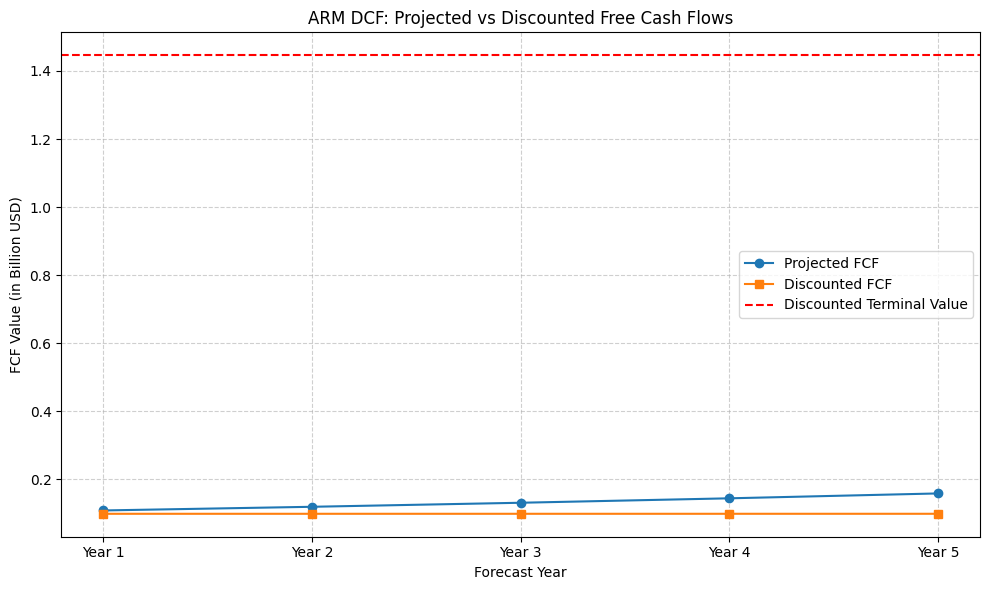

In [ ]:
import yfinance as yf

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get Market Cap and Beta
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    # Get Long Term Debt or Total Debt
    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    # Estimate tax rate
    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20  # Fallback

    # Cost of Equity (CAPM)
    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

    # Cost of Debt (safe fallback)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)

    # Get Free Cash Flow
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]

    # Get Cash
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0

    # Get Long Term or Total Debt
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    return fcf, cash, debt

def perform_dcf(ticker_symbol, growth_rate=0.10, terminal_growth=0.03, years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")

    # Step 1: Get Discount Rate (WACC)
    discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {discount_rate*100:.2f}%")

    # Step 2: Get FCF, Cash, Debt
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")

    # Step 3: Forecast FCFs
    base_fcf = fcf / (1 + growth_rate)**years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, years + 1)]

    # Step 4: Discount FCFs
    discounted_fcf = [fcf_ / (1 + discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    # Step 5: Terminal Value
    terminal_value = fcf_list[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
    discounted_terminal_value = terminal_value / (1 + discount_rate)**years

    # Step 6: Valuation
    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash

    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")


    import matplotlib.pyplot as plt

    # Print Values
    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")

    # --- Plot FCFs ---
    years_list = [f"Year {i}" for i in range(1, years + 1)]

    plt.figure(figsize=(10, 6))
    plt.plot(years_list, [v/1e9 for v in fcf_list], label="Projected FCF", marker='o')
    plt.plot(years_list, [v/1e9 for v in discounted_fcf], label="Discounted FCF", marker='s')
    plt.axhline(y=discounted_terminal_value/1e9, color='r', linestyle='--', label="Discounted Terminal Value")
    plt.title(f"{ticker_symbol} DCF: Projected vs Discounted Free Cash Flows")
    plt.ylabel("FCF Value (in Billion USD)")
    plt.xlabel("Forecast Year")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Example usage:
perform_dcf("ARM")   # Replace with "NVDA", "AAPL", etc.


In [ ]:
import numpy as np
import pandas as pd

def dcf_sensitivity_analysis(ticker_symbol, growth_rate=0.10, base_terminal_growth=0.03, base_years=5):
    print(f"\n--- Sensitivity Analysis for {ticker_symbol} ---")

    # Step 1: Base data
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    base_fcf = fcf / (1 + growth_rate)**base_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, base_years + 1)]

    # Step 2: Sensitivity grid
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted_fcf = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**base_years
            enterprise_value = sum(discounted_fcf) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)  # in Billion USD

    print("\nEquity Value Sensitivity Table (in Billion USD):")
    print(table)
    return table


In [ ]:
dcf_sensitivity_analysis("ARM")



--- Sensitivity Analysis for ARM ---

Equity Value Sensitivity Table (in Billion USD):
       2.0%  2.5%  3.0%  3.5%  4.0%  4.5%  5.0%
8.0%   1.99  2.17  2.38  2.64  2.97  3.38  3.94
9.0%   1.65  1.77  1.91  2.09  2.29  2.54  2.85
10.0%  1.39  1.48  1.58   1.7  1.84   2.0   2.2
11.0%  1.19  1.25  1.33  1.42  1.52  1.63  1.77
12.0%  1.02  1.08  1.14   1.2  1.28  1.36  1.46
13.0%  0.89  0.94  0.98  1.03  1.09  1.15  1.22


2.0%  2.5%  3.0%  3.5%  4.0%  4.5%  5.0%
8.0%   1.99  2.17  2.38  2.64  2.97  3.38  3.94
9.0%   1.65  1.77  1.91  2.09  2.29  2.54  2.85
10.0%  1.39  1.48  1.58   1.7  1.84   2.0   2.2
11.0%  1.19  1.25  1.33  1.42  1.52  1.63  1.77
12.0%  1.02  1.08  1.14   1.2  1.28  1.36  1.46
13.0%  0.89  0.94  0.98  1.03  1.09  1.15  1.22

In [ ]:
# Re-import libraries after code execution environment reset
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted_fcf = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted_fcf) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

    print("\n🧾 Explanation:")
    print("Rows represent different assumed Discount Rates (WACC).")
    print("Columns represent different assumed Terminal Growth Rates.")
    print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
    print("📊 Equity Value Sensitivity Table:")
    return table

# Run for ARM as example
result_table = dcf_sensitivity_analysis_readable("ARM")
print(result_table)


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
       2.0%  2.5%  3.0%  3.5%  4.0%  4.5%  5.0%
8.0%   1.99  2.17  2.38  2.64  2.97  3.38  3.94
9.0%   1.65  1.77  1.91  2.09  2.29  2.54  2.85
10.0%  1.39  1.48  1.58   1.7  1.84   2.0   2.2
11.0%  1.19  1.25  1.33  1.42  1.52  1.63  1.77
12.0%  1.02  1.08  1.14   1.2  1.28  1.36  1.46
13.0%  0.89  0.94  0.98  1.03  1.09  1.15  1.22


In [ ]:
# Re-import libraries after code execution environment reset
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted_fcf = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted_fcf) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

    print("\n🧾 Explanation:")
    print("Rows represent different assumed Discount Rates (WACC).")
    print("Columns represent different assumed Terminal Growth Rates.")
    print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
    print("📊 Equity Value Sensitivity Table:")
    return table

# Run for ARM as example
result_table = dcf_sensitivity_analysis_readable("NVDA")
print(result_table)


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
         2.0%    2.5%    3.0%    3.5%    4.0%    4.5%    5.0%
14.2%  422.92  435.48  449.16  464.12  480.54  498.67  518.76
15.2%  388.45  398.77  409.95  422.07  435.28  449.73   465.6
16.2%  358.89  367.49  376.73  386.71   397.5  409.21  421.98
17.2%  333.28  340.51  348.25  356.55  365.48  375.12  385.55
18.2%  310.87  317.01  323.55  330.54  338.02  346.05  354.68



--- DCF Model for NVDA ---
Discount Rate (WACC): 16.19%
Last Year FCF: $60.85B | Cash: $0.00B | Debt: $8.46B
Discounted FCFs: [35.77, 33.87, 32.06, 30.35, 28.74] B
Discounted Terminal Value: $224.40B
Enterprise Value: $385.19B
Equity Value: $376.73B

--- End of DCF ---

Discounted FCFs: [35.77, 33.87, 32.06, 30.35, 28.74] B
Discounted Terminal Value: $224.40B
Enterprise Value: $385.19B
Equity Value: $376.73B


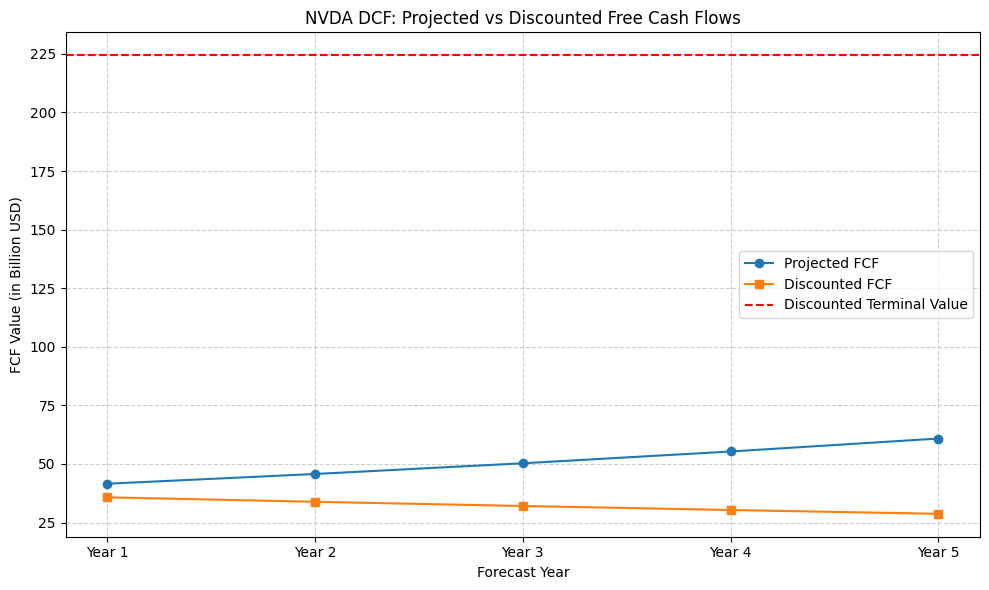

In [ ]:
# Example usage:
perform_dcf("NVDA")   # Replace with "NVDA", "AAPL", etc.

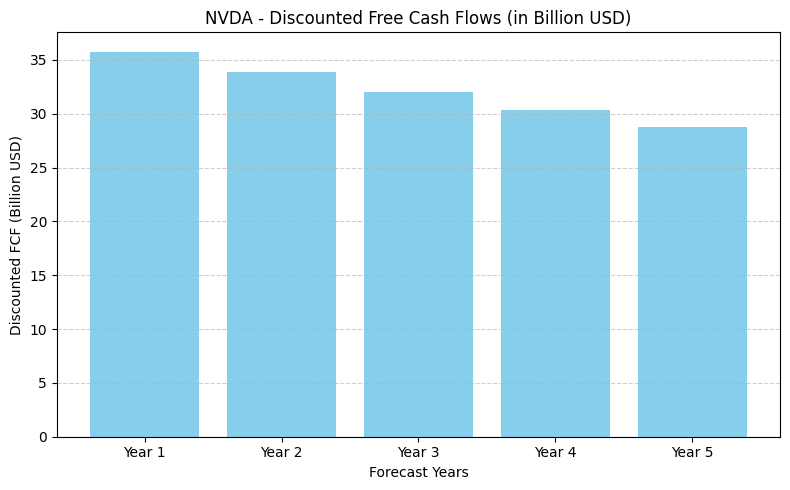


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
         2.0%    2.5%    3.0%    3.5%    4.0%    4.5%    5.0%
14.2%  422.55  435.08  448.73  463.66  480.05  498.13  518.17
15.2%  388.13  398.44  409.59  421.69  434.87  449.29  465.12
16.2%  358.62   367.2  376.43  386.38  397.15  408.84  421.58
17.2%  333.04  340.26  347.98  356.27  365.19  374.81  385.22
18.2%  310.66  316.79  323.32   330.3  337.77  345.78   354.4


In [ ]:
# Required Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    # Store for plotting
    discounted_fcf = [fcf_ / (1 + base_discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    # Plotting discounted FCFs only
    years = [f'Year {i}' for i in range(1, forecast_years + 1)]
    plt.figure(figsize=(8, 5))
    plt.bar(years, [val / 1e9 for val in discounted_fcf], color='skyblue')
    plt.title(f'{ticker_symbol} - Discounted Free Cash Flows (in Billion USD)')
    plt.ylabel('Discounted FCF (Billion USD)')
    plt.xlabel('Forecast Years')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Table
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

    print("\n🧾 Explanation:")
    print("Rows represent different assumed Discount Rates (WACC).")
    print("Columns represent different assumed Terminal Growth Rates.")
    print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
    print("📊 Equity Value Sensitivity Table:")
    return table

# Run for NVDA
result_table = dcf_sensitivity_analysis_readable("NVDA")
print(result_table)



--- DCF Model for ARM ---
Discount Rate (WACC): 9.99%
Last Year FCF: $0.16B | Cash: $0.00B | Debt: $0.36B
Discounted FCFs: [0.1, 0.1, 0.1, 0.1, 0.1] B
Discounted Terminal Value: $1.45B
Enterprise Value: $1.94B
Equity Value: $1.58B

--- End of DCF ---



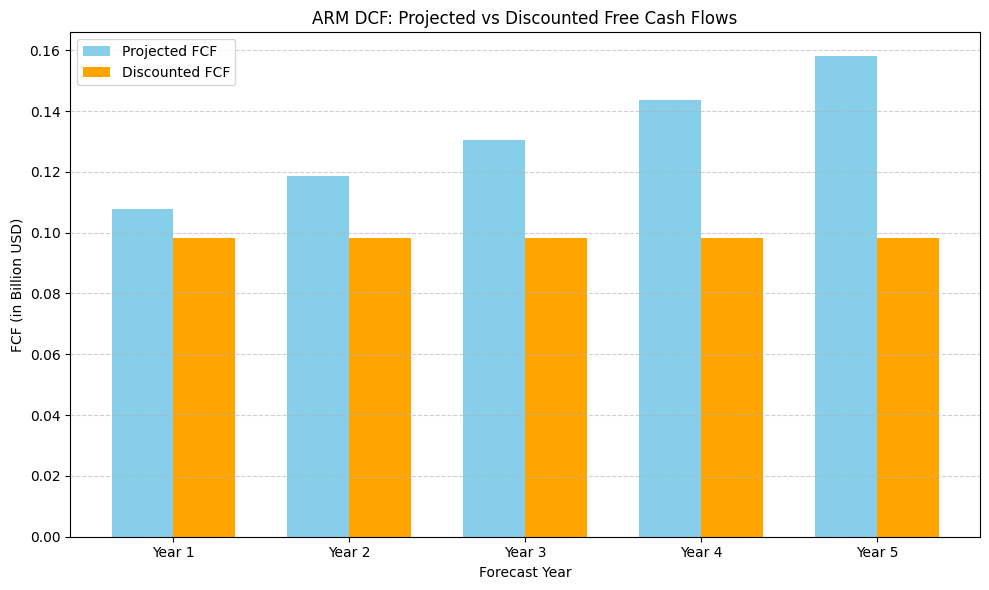

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0) or 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]

    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0

    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    return fcf, cash, debt

def perform_dcf(ticker_symbol, growth_rate=0.10, terminal_growth=0.03, years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")

    discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {discount_rate*100:.2f}%")

    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")

    base_fcf = fcf / (1 + growth_rate)**years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, years + 1)]
    discounted_fcf = [fcf_ / (1 + discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
    discounted_terminal_value = terminal_value / (1 + discount_rate)**years

    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash

    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting as Bar Chart
    years_list = [f"Year {i}" for i in range(1, years + 1)]
    width = 0.35
    x = range(len(years_list))

    plt.figure(figsize=(10, 6))
    plt.bar(x, [v/1e9 for v in fcf_list], width=width, label="Projected FCF", color='skyblue')
    plt.bar([i + width for i in x], [v/1e9 for v in discounted_fcf], width=width, label="Discounted FCF", color='orange')

    plt.xticks([i + width/2 for i in x], years_list)
    plt.title(f"{ticker_symbol} DCF: Projected vs Discounted Free Cash Flows")
    plt.ylabel("FCF (in Billion USD)")
    plt.xlabel("Forecast Year")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage:
perform_dcf("ARM")  # You can change this to "NVDA", "AAPL", etc.



--- DCF Model for ARM ---
Discount Rate (WACC): 9.99%
Last Year FCF: $0.16B | Cash: $0.00B | Debt: $0.36B
Discounted FCFs: [0.1, 0.1, 0.1, 0.1, 0.1] B
Discounted Terminal Value: $1.45B
Enterprise Value: $1.94B
Equity Value: $1.58B

--- End of DCF ---



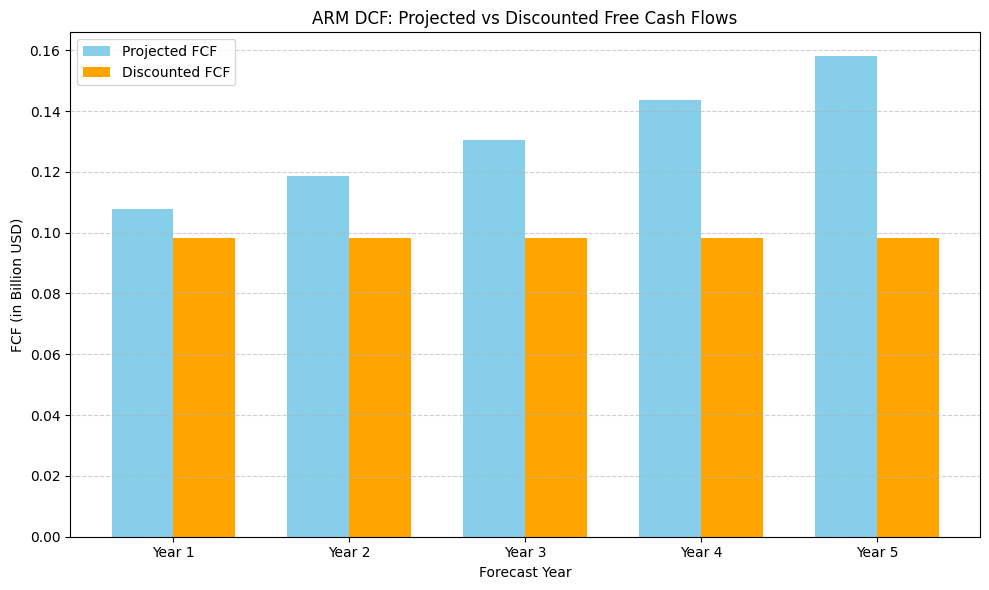

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0) or 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]

    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0

    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    return fcf, cash, debt

def perform_dcf(ticker_symbol, growth_rate=0.10, terminal_growth=0.03, years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")

    discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {discount_rate*100:.2f}%")

    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")

    base_fcf = fcf / (1 + growth_rate)**years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, years + 1)]
    discounted_fcf = [fcf_ / (1 + discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
    discounted_terminal_value = terminal_value / (1 + discount_rate)**years

    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash

    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting as Bar Chart
    years_list = [f"Year {i}" for i in range(1, years + 1)]
    width = 0.35
    x = range(len(years_list))

    plt.figure(figsize=(10, 6))
    plt.bar(x, [v/1e9 for v in fcf_list], width=width, label="Projected FCF", color='skyblue')
    plt.bar([i + width for i in x], [v/1e9 for v in discounted_fcf], width=width, label="Discounted FCF", color='orange')

    plt.xticks([i + width/2 for i in x], years_list)
    plt.title(f"{ticker_symbol} DCF: Projected vs Discounted Free Cash Flows")
    plt.ylabel("FCF (in Billion USD)")
    plt.xlabel("Forecast Year")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage:
perform_dcf("ARM")  # You can change this to "NVDA", "AAPL", etc.


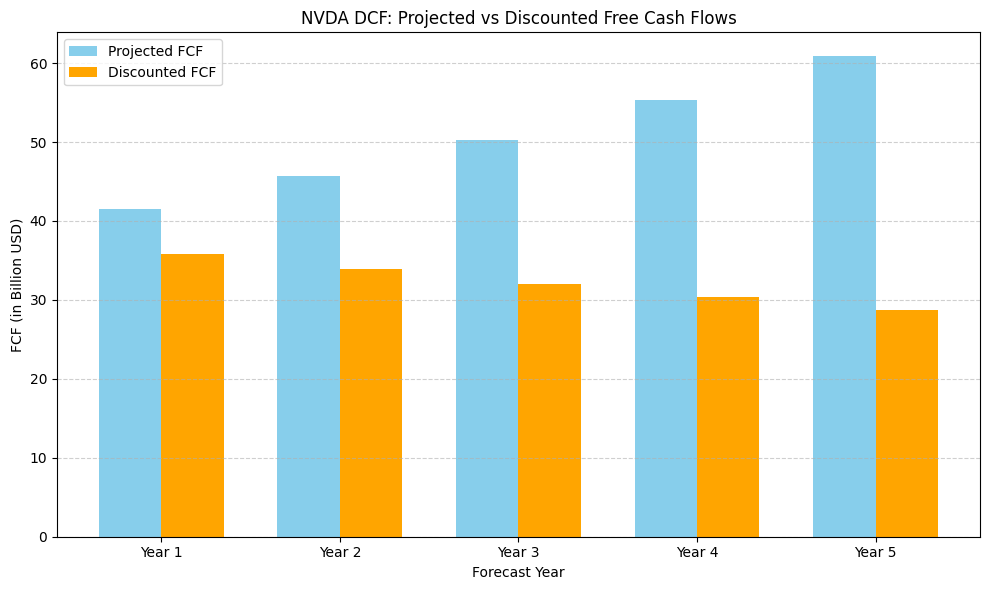

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0) or 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]

    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0

    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    return fcf, cash, debt

def perform_dcf_with_sensitivity(ticker_symbol, growth_rate=0.10, terminal_growth=0.03, years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")
    discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    base_fcf = fcf / (1 + growth_rate)**years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, years + 1)]
    discounted_fcf = [fcf_ / (1 + discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
    discounted_terminal_value = terminal_value / (1 + discount_rate)**years

    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash

    # Plot bar chart of Projected and Discounted FCFs
    years_list = [f"Year {i}" for i in range(1, years + 1)]
    x = np.arange(len(years_list))
    width = 0.35

    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, [v/1e9 for v in fcf_list], width=width, label="Projected FCF", color='skyblue')
    plt.bar(x + width/2, [v/1e9 for v in discounted_fcf], width=width, label="Discounted FCF", color='orange')
    plt.xticks(x, years_list)
    plt.title(f"{ticker_symbol} DCF: Projected vs Discounted Free Cash Flows")
    plt.ylabel("FCF (in Billion USD)")
    plt.xlabel("Forecast Year")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Analysis Table and 3D Plot
    discount_rates = np.arange(discount_rate - 0.02, discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)
    sensitivity_table = pd.DataFrame(index=[f"{r:.2%}" for r in discount_rates],
                                     columns=[f"{g:.2%}" for g in terminal_growth_rates])

    X, Y, Z = [], [], []
    for r in discount_rates:
        for g in terminal_growth_rates:
            d_fcf = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            t_val = fcf_list[-1] * (1 + g) / (r - g)
            d_tv = t_val / (1 + r)**years
            ent_val = sum(d_fcf) + d_tv
            eq_val = ent_val - debt + cash
            sensitivity_table.loc[f"{r:.2%}", f"{g:.2%}"] = round(eq_val / 1e9, 2)
            X.append(r * 100)
            Y.append(g * 100)
            Z.append(eq_val / 1e9)

    import ace_tools as tools
    tools.display_dataframe_to_user(name=f"{ticker_symbol} Sensitivity Table", dataframe=sensitivity_table)

    # 3D Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'{ticker_symbol} Equity Value Sensitivity Analysis')
    ax.set_xlabel('Discount Rate (%)')
    ax.set_ylabel('Terminal Growth Rate (%)')
    ax.set_zlabel('Equity Value (Billion USD)')
    plt.tight_layout()
    plt.show()

# Example usage:
perform_dcf_with_sensitivity("NVDA")



--- DCF Model for NVDA ---
Discount Rate (WACC): 16.20%
Last Year FCF: $60.85B | Cash: $0.00B | Debt: $8.46B
Discounted FCFs: [35.77, 33.86, 32.05, 30.34, 28.72] B
Discounted Terminal Value: $224.14B
Enterprise Value: $384.89B
Equity Value: $376.43B

--- End of DCF ---



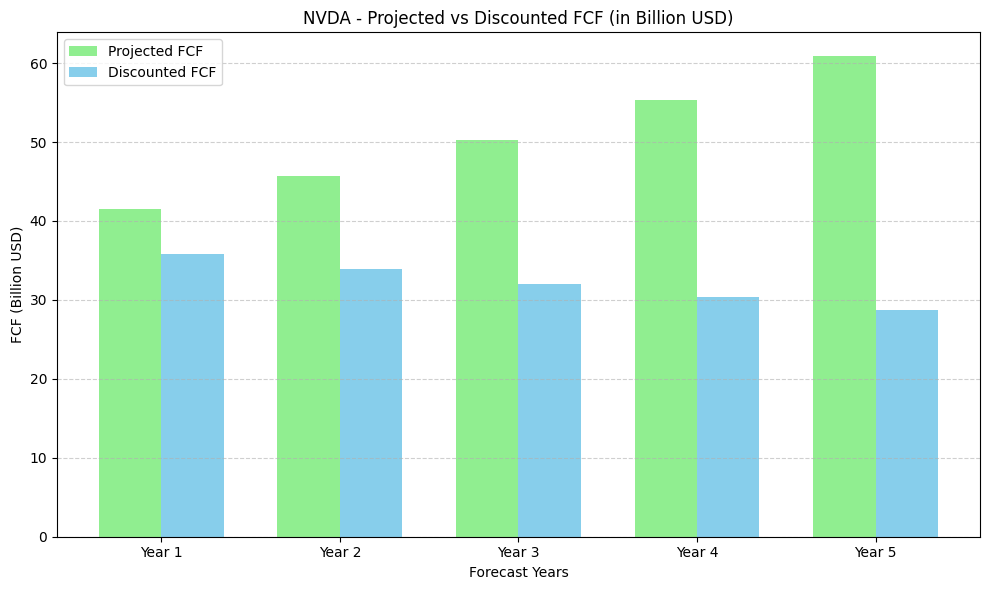

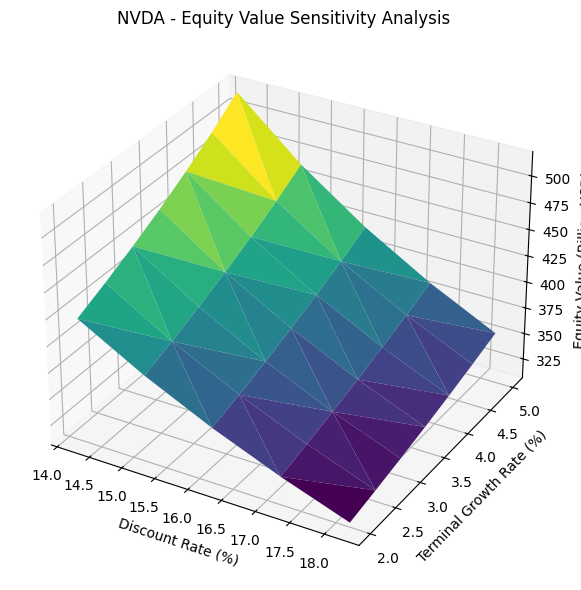


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
         2.0%    2.5%    3.0%    3.5%    4.0%    4.5%    5.0%
14.2%  422.55  435.08  448.73  463.66  480.05  498.13  518.17
15.2%  388.13  398.44  409.59  421.69  434.87  449.29  465.12
16.2%  358.62   367.2  376.43  386.38  397.15  408.84  421.58
17.2%  333.04  340.26  347.98  356.27  365.19  374.81  385.22
18.2%  310.66  316.79  323.32   330.3  337.77  345.78   354.4


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {base_discount_rate*100:.2f}%")
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    # Store for plotting
    discounted_fcf = [fcf_ / (1 + base_discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + 0.03) / (base_discount_rate - 0.03)
    discounted_terminal_value = terminal_value / (1 + base_discount_rate)**forecast_years
    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash
    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting projected vs discounted FCFs as bar graph
    years = [f'Year {i}' for i in range(1, forecast_years + 1)]
    x = np.arange(len(years))
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, [val / 1e9 for val in fcf_list], width=width, label='Projected FCF', color='lightgreen')
    plt.bar(x + width/2, [val / 1e9 for val in discounted_fcf], width=width, label='Discounted FCF', color='skyblue')
    plt.xticks(x, years)
    plt.title(f'{ticker_symbol} - Projected vs Discounted FCF (in Billion USD)')
    plt.ylabel('FCF (Billion USD)')
    plt.xlabel('Forecast Years')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Table
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    X, Y, Z = [], [], []

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

            X.append(r * 100)
            Y.append(g * 100)
            Z.append(equity_value / 1e9)

    # 3D Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis')
    ax.set_xlabel('Discount Rate (%)')
    ax.set_ylabel('Terminal Growth Rate (%)')
    ax.set_zlabel('Equity Value (Billion USD)')
    plt.tight_layout()
    plt.show()

    return table

# Run for NVDA
result_table = dcf_sensitivity_analysis_readable("NVDA")

print("\n🧾 Explanation:")
print("Rows represent different assumed Discount Rates (WACC).")
print("Columns represent different assumed Terminal Growth Rates.")
print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
print("📊 Equity Value Sensitivity Table:")
print(result_table)


--- DCF Model for NVDA ---
Discount Rate (WACC): 16.20%
Last Year FCF: $60.85B | Cash: $0.00B | Debt: $8.46B
Projected FCFs: [41.56, 45.72, 50.29, 55.32, 60.85] B
Discounted FCFs: [35.77, 33.86, 32.05, 30.34, 28.72] B
Discounted Terminal Value: $224.14B
Enterprise Value: $384.89B
Equity Value: $376.43B

--- End of DCF ---



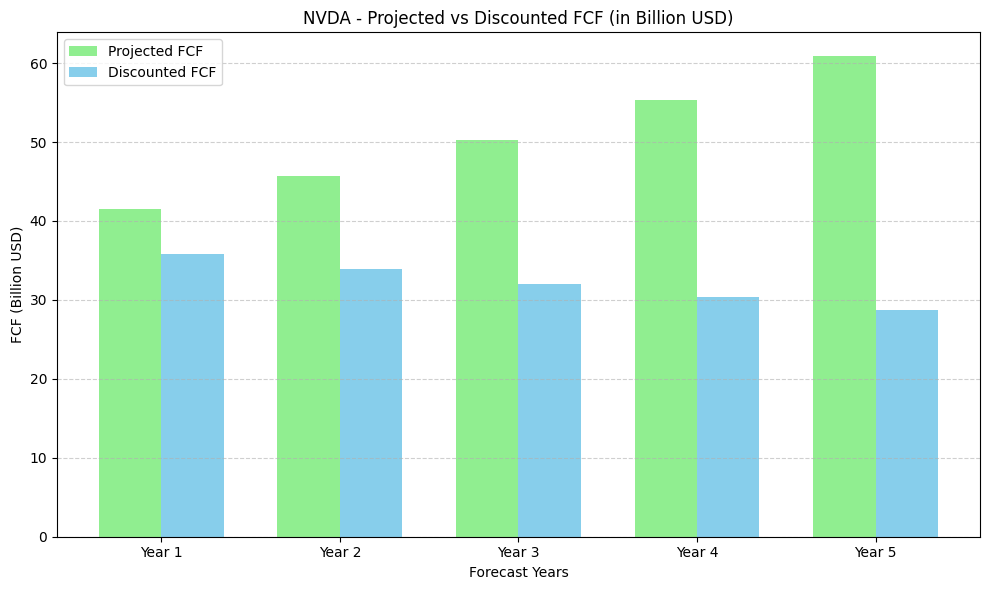

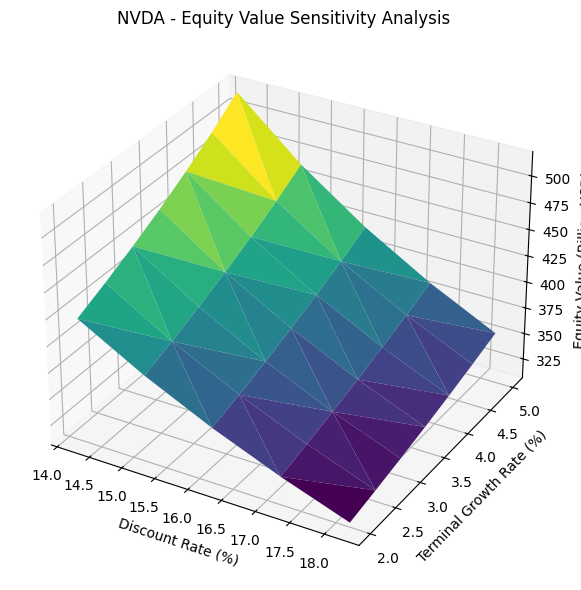


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
         2.0%    2.5%    3.0%    3.5%    4.0%    4.5%    5.0%
14.2%  422.55  435.08  448.73  463.66  480.05  498.13  518.17
15.2%  388.13  398.44  409.59  421.69  434.87  449.29  465.12
16.2%  358.62   367.2  376.43  386.38  397.15  408.84  421.58
17.2%  333.04  340.26  347.98  356.27  365.19  374.81  385.22
18.2%  310.66  316.79  323.32   330.3  337.77  345.78   354.4


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {base_discount_rate*100:.2f}%")
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    # Store for plotting
    discounted_fcf = [fcf_ / (1 + base_discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + 0.03) / (base_discount_rate - 0.03)
    discounted_terminal_value = terminal_value / (1 + base_discount_rate)**forecast_years
    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash
    print("Projected FCFs:", [round(float(v)/1e9, 2) for v in fcf_list], "B")
    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting projected vs discounted FCFs as bar graph
    years = [f'Year {i}' for i in range(1, forecast_years + 1)]
    x = np.arange(len(years))
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, [val / 1e9 for val in fcf_list], width=width, label='Projected FCF', color='lightgreen')
    plt.bar(x + width/2, [val / 1e9 for val in discounted_fcf], width=width, label='Discounted FCF', color='skyblue')
    plt.xticks(x, years)
    plt.title(f'{ticker_symbol} - Projected vs Discounted FCF (in Billion USD)')
    plt.ylabel('FCF (Billion USD)')
    plt.xlabel('Forecast Years')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Table
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    X, Y, Z = [], [], []

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

            X.append(r * 100)
            Y.append(g * 100)
            Z.append(equity_value / 1e9)

    # 3D Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis')
    ax.set_xlabel('Discount Rate (%)')
    ax.set_ylabel('Terminal Growth Rate (%)')
    ax.set_zlabel('Equity Value (Billion USD)')
    plt.tight_layout()
    plt.show()

    return table

# Run for NVDA
result_table = dcf_sensitivity_analysis_readable("NVDA")

print("\n🧾 Explanation:")
print("Rows represent different assumed Discount Rates (WACC).")
print("Columns represent different assumed Terminal Growth Rates.")
print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
print("📊 Equity Value Sensitivity Table:")
print(result_table)


--- DCF Model for ARM ---
Discount Rate (WACC): 9.99%
Last Year FCF: $0.16B | Cash: $0.00B | Debt: $0.36B
Projected FCFs: [0.11, 0.12, 0.13, 0.14, 0.16] B
Discounted FCFs: [0.1, 0.1, 0.1, 0.1, 0.1] B
Discounted Terminal Value: $1.45B
Enterprise Value: $1.94B
Equity Value: $1.58B

--- End of DCF ---



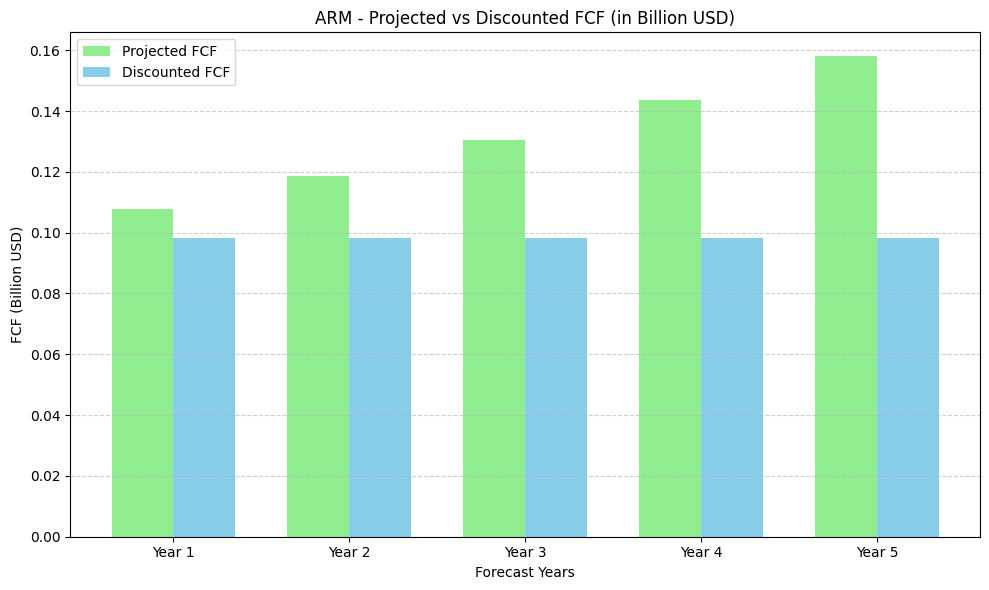

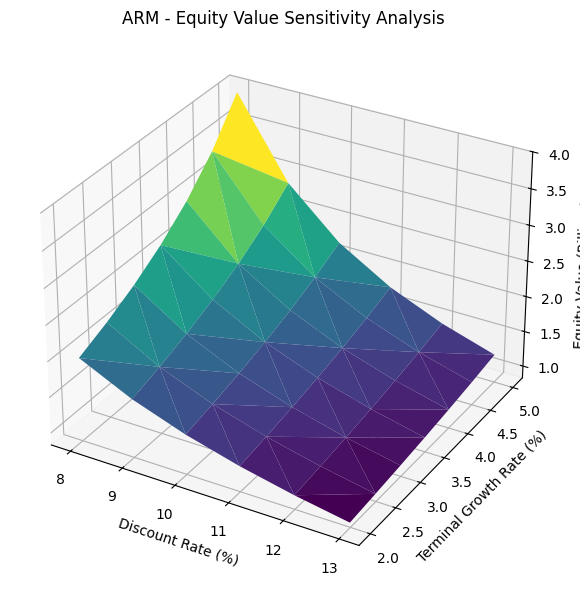


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
       2.0%  2.5%  3.0%  3.5%  4.0%  4.5%  5.0%
8.0%   1.99  2.17  2.38  2.64  2.97  3.38  3.94
9.0%   1.65  1.77  1.91  2.09  2.29  2.54  2.85
10.0%  1.39  1.48  1.58   1.7  1.84   2.0   2.2
11.0%  1.19  1.25  1.33  1.42  1.52  1.63  1.77
12.0%  1.02  1.08  1.14   1.2  1.28  1.36  1.46
13.0%  0.89  0.94  0.98  1.03  1.09  1.15  1.22


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {base_discount_rate*100:.2f}%")
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    # Store for plotting
    discounted_fcf = [fcf_ / (1 + base_discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + 0.03) / (base_discount_rate - 0.03)
    discounted_terminal_value = terminal_value / (1 + base_discount_rate)**forecast_years
    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash
    print("Projected FCFs:", [round(float(v)/1e9, 2) for v in fcf_list], "B")
    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting projected vs discounted FCFs as bar graph
    years = [f'Year {i}' for i in range(1, forecast_years + 1)]
    x = np.arange(len(years))
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, [val / 1e9 for val in fcf_list], width=width, label='Projected FCF', color='lightgreen')
    plt.bar(x + width/2, [val / 1e9 for val in discounted_fcf], width=width, label='Discounted FCF', color='skyblue')
    plt.xticks(x, years)
    plt.title(f'{ticker_symbol} - Projected vs Discounted FCF (in Billion USD)')
    plt.ylabel('FCF (Billion USD)')
    plt.xlabel('Forecast Years')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Table
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.02, 0.05 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    X, Y, Z = [], [], []

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

            X.append(r * 100)
            Y.append(g * 100)
            Z.append(equity_value / 1e9)

    # 3D Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis')
    ax.set_xlabel('Discount Rate (%)')
    ax.set_ylabel('Terminal Growth Rate (%)')
    ax.set_zlabel('Equity Value (Billion USD)')
    plt.tight_layout()
    plt.show()

    return table

# Run for NVDA
result_table = dcf_sensitivity_analysis_readable("ARM")

print("\n🧾 Explanation:")
print("Rows represent different assumed Discount Rates (WACC).")
print("Columns represent different assumed Terminal Growth Rates.")
print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
print("📊 Equity Value Sensitivity Table:")
print(result_table)


--- DCF Model for MSFT ---
Discount Rate (WACC): 10.10%
Last Year FCF: $74.07B | Cash: $0.00B | Debt: $42.69B
Projected FCFs: [50.59, 55.65, 61.22, 67.34, 74.07] B
Discounted FCFs: [45.95, 45.91, 45.87, 45.83, 45.78] B
Discounted Terminal Value: $664.19B
Enterprise Value: $893.52B
Equity Value: $850.83B

--- End of DCF ---



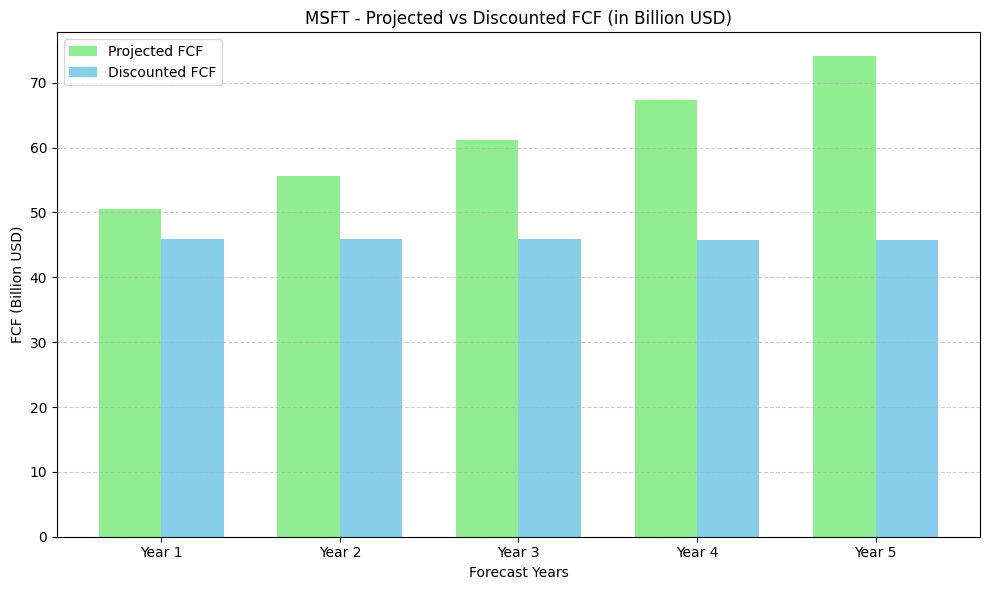

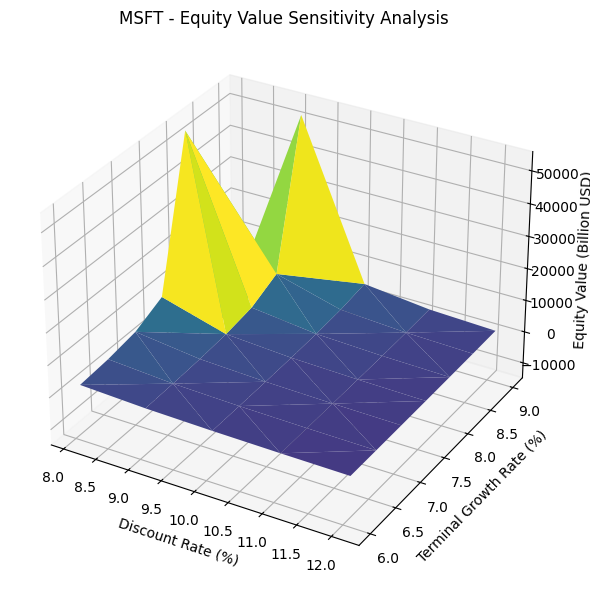


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
          6.0%     6.5%     7.0%     7.5%      8.0%     8.5%      9.0%
8.1%   2732.52  3539.71  5080.71  9190.04  54392.72 -13411.3  -5877.52
9.1%   1831.61  2155.94  2634.71  3412.71   4897.98  8858.71  52426.75
10.1%  1370.33  1541.08  1766.93  2079.63   2541.24  3291.36    4723.4
11.1%  1090.06  1193.67  1322.56  1487.26   1705.08  2006.67   2451.89
12.1%   901.77   970.43  1052.54  1152.51   1276.87  1435.76   1645.91


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {base_discount_rate*100:.2f}%")
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    # Store for plotting
    discounted_fcf = [fcf_ / (1 + base_discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + 0.03) / (base_discount_rate - 0.03)
    discounted_terminal_value = terminal_value / (1 + base_discount_rate)**forecast_years
    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash
    print("Projected FCFs:", [round(float(v)/1e9, 2) for v in fcf_list], "B")
    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting projected vs discounted FCFs as bar graph
    years = [f'Year {i}' for i in range(1, forecast_years + 1)]
    x = np.arange(len(years))
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, [val / 1e9 for val in fcf_list], width=width, label='Projected FCF', color='lightgreen')
    plt.bar(x + width/2, [val / 1e9 for val in discounted_fcf], width=width, label='Discounted FCF', color='skyblue')
    plt.xticks(x, years)
    plt.title(f'{ticker_symbol} - Projected vs Discounted FCF (in Billion USD)')
    plt.ylabel('FCF (Billion USD)')
    plt.xlabel('Forecast Years')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Table
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.06, 0.09 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    X, Y, Z = [], [], []

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

            X.append(r * 100)
            Y.append(g * 100)
            Z.append(equity_value / 1e9)

    # 3D Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis')
    ax.set_xlabel('Discount Rate (%)')
    ax.set_ylabel('Terminal Growth Rate (%)')
    ax.set_zlabel('Equity Value (Billion USD)')
    plt.tight_layout()
    plt.show()

    return table

# Run for NVDA
result_table = dcf_sensitivity_analysis_readable("MSFT")

print("\n🧾 Explanation:")
print("Rows represent different assumed Discount Rates (WACC).")
print("Columns represent different assumed Terminal Growth Rates.")
print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
print("📊 Equity Value Sensitivity Table:")
print(result_table)


--- DCF Model for BYD ---
Discount Rate (WACC): 8.90%
Last Year FCF: $0.56B | Cash: $0.00B | Debt: $3.13B
Projected FCFs: [0.38, 0.42, 0.46, 0.51, 0.56] B
Discounted FCFs: [0.35, 0.35, 0.36, 0.36, 0.36] B
Discounted Terminal Value: $6.35B
Enterprise Value: $8.13B
Equity Value: $4.99B

--- End of DCF ---



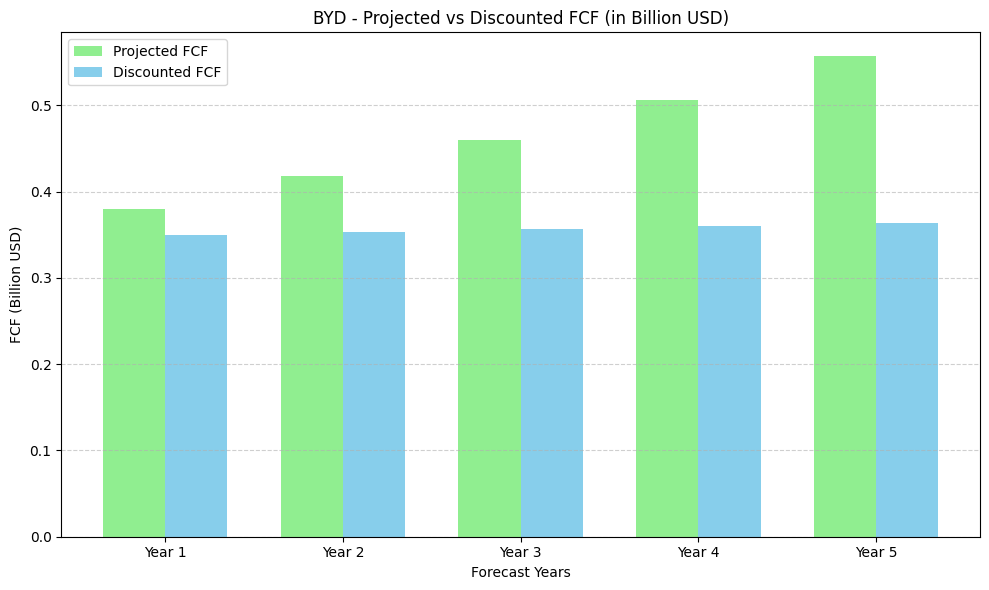

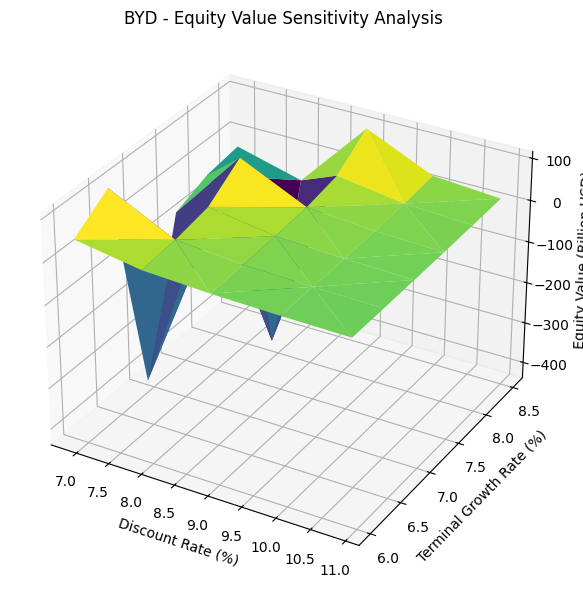


🧾 Explanation:
Rows represent different assumed Discount Rates (WACC).
Columns represent different assumed Terminal Growth Rates.
Each cell shows the Equity Value (in Billion USD) under those assumptions.

📊 Equity Value Sensitivity Table:
        6.0%    6.5%    7.0%    7.5%    8.0%   8.5%
6.9%   45.72  104.92 -427.92  -72.69   -40.4 -28.29
7.9%   19.93   27.65   43.95  100.99 -412.37 -70.13
8.9%   11.93   14.78   19.12   26.56   42.26  97.24
9.9%    8.04    9.48   11.41   14.15   18.34  25.51
10.9%   5.73    6.59    7.66    9.05   10.91  13.56


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)
    if beta is None:
        beta = 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income
    except:
        tax_rate = 0.20

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04

    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if 'Free Cash Flow' not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf['Free Cash Flow'].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc['Cash'].iloc[0] if 'Cash' in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def dcf_sensitivity_analysis_readable(ticker_symbol, growth_rate=0.10, forecast_years=5):
    print(f"\n--- DCF Model for {ticker_symbol} ---")
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    print(f"Discount Rate (WACC): {base_discount_rate*100:.2f}%")
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)
    print(f"Last Year FCF: ${fcf/1e9:.2f}B | Cash: ${cash/1e9:.2f}B | Debt: ${debt/1e9:.2f}B")
    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    # Store for plotting
    discounted_fcf = [fcf_ / (1 + base_discount_rate)**i for i, fcf_ in enumerate(fcf_list, start=1)]

    terminal_value = fcf_list[-1] * (1 + 0.03) / (base_discount_rate - 0.03)
    discounted_terminal_value = terminal_value / (1 + base_discount_rate)**forecast_years
    enterprise_value = sum(discounted_fcf) + discounted_terminal_value
    equity_value = enterprise_value - debt + cash
    print("Projected FCFs:", [round(float(v)/1e9, 2) for v in fcf_list], "B")
    print("Discounted FCFs:", [round(float(v)/1e9, 2) for v in discounted_fcf], "B")
    print(f"Discounted Terminal Value: ${discounted_terminal_value/1e9:.2f}B")
    print(f"Enterprise Value: ${enterprise_value/1e9:.2f}B")
    print(f"Equity Value: ${equity_value/1e9:.2f}B")
    print(f"\n--- End of DCF ---\n")

    # Plotting projected vs discounted FCFs as bar graph
    years = [f'Year {i}' for i in range(1, forecast_years + 1)]
    x = np.arange(len(years))
    width = 0.35
    plt.figure(figsize=(10, 6))
    plt.bar(x - width/2, [val / 1e9 for val in fcf_list], width=width, label='Projected FCF', color='lightgreen')
    plt.bar(x + width/2, [val / 1e9 for val in discounted_fcf], width=width, label='Discounted FCF', color='skyblue')
    plt.xticks(x, years)
    plt.title(f'{ticker_symbol} - Projected vs Discounted FCF (in Billion USD)')
    plt.ylabel('FCF (Billion USD)')
    plt.xlabel('Forecast Years')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Sensitivity Table
    discount_rates = np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01)
    terminal_growth_rates = np.arange(0.06, 0.085 + 0.001, 0.005)

    table = pd.DataFrame(index=[f"{round(r*100,1)}%" for r in discount_rates],
                         columns=[f"{round(g*100,1)}%" for g in terminal_growth_rates])

    X, Y, Z = [], [], []

    for r in discount_rates:
        for g in terminal_growth_rates:
            discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
            terminal_value = fcf_list[-1] * (1 + g) / (r - g)
            discounted_terminal_value = terminal_value / (1 + r)**forecast_years
            enterprise_value = sum(discounted) + discounted_terminal_value
            equity_value = enterprise_value - debt + cash
            table.loc[f"{round(r*100,1)}%", f"{round(g*100,1)}%"] = round(equity_value / 1e9, 2)

            X.append(r * 100)
            Y.append(g * 100)
            Z.append(equity_value / 1e9)

    # 3D Plot
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis')
    ax.set_xlabel('Discount Rate (%)')
    ax.set_ylabel('Terminal Growth Rate (%)')
    ax.set_zlabel('Equity Value (Billion USD)')
    plt.tight_layout()
    plt.show()

    return table

# Run for NVDA
result_table = dcf_sensitivity_analysis_readable("BYD")

print("\n🧾 Explanation:")
print("Rows represent different assumed Discount Rates (WACC).")
print("Columns represent different assumed Terminal Growth Rates.")
print("Each cell shows the Equity Value (in Billion USD) under those assumptions.\n")
print("📊 Equity Value Sensitivity Table:")
print(result_table)

In [ ]:
import os
import json
from textwrap import dedent
from typing import Annotated
from datetime import timedelta, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.optimize import minimize

In [ ]:
def estimate_discount_rate(
        ticker_symbol: Annotated[str, "ticker symbol"],
        risk_free_rate: Annotated[float, "risk free rate example 0.045"] = 0.045,
        market_return: Annotated[float, "market return example 0.10"] = 0.10
    ) -> float:
        """
        Fetches estimate discount rate for a given ticker symbol.
        """
        ticker = yf.Ticker(ticker_symbol)
        info = ticker.info
        market_cap = info.get('marketCap', None)
        beta = info.get('beta', 1.0) or 1.0

        bs = ticker.balance_sheet
        debt = 0
        for key in ['Long Term Debt', 'Total Debt']:
            if key in bs.index:
                debt = bs.loc[key].iloc[0]
                break

        is_ = ticker.financials
        try:
            tax_expense = is_.loc['Income Tax Expense'].iloc[0]
            pretax_income = is_.loc['Ebit'].iloc[0]
            tax_rate = tax_expense / pretax_income if pretax_income != 0 else 0.2
        except:
            tax_rate = 0.2

        cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
        cost_of_debt = 0.04
        if market_cap is None:
            raise ValueError("Market Cap not available")

        total_capital = market_cap + debt
        wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
        return round(wacc, 4)

In [ ]:
def fetch_fcf_cash_debt(
        ticker_symbol: Annotated[str, "ticker symbol"]
    ) -> tuple[float, float, float]:
        """
        Fetches Free Cash Flow, Cash, and Debt for a given ticker symbol.
        """
        ticker = yf.Ticker(ticker_symbol)
        cf = ticker.cashflow.T
        if "Free Cash Flow" not in cf.columns:
            raise ValueError("Free Cash Flow not available")
        fcf = cf["Free Cash Flow"].iloc[0]
        bs = ticker.balance_sheet
        cash = bs.loc["Cash"].iloc[0] if "Cash" in bs.index else 0
        debt = 0
        for key in ['Long Term Debt', 'Total Debt']:
            if key in bs.index:
                debt = bs.loc[key].iloc[0]
                break
        return fcf, cash, debt


In [ ]:
def get_sesitivity_analysis(
        ticker_symbol: Annotated[str, "ticker symbol"],
        growth_rate: Annotated[float, "risk free rate example 0.045"]=0.10,
        forecast_years: Annotated[int, "risk free rate example 5"] = 5
        ) -> pd.DataFrame:
        """
        Fetches Sensitivity analysis for a given ticker symbol.
        """
        base_discount_rate = estimate_discount_rate(ticker_symbol)
        fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)

        # print(f"📌 Base Discount Rate (WACC): {base_discount_rate:.4f}")
        # print(f"📌 FCF: {fcf:.2f}, Cash: {cash:.2f}, Debt: {debt:.2f}")

        base_fcf = fcf / (1 + growth_rate)**forecast_years
        fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

        discount_rates = np.round(np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01), 4)
        terminal_growth_rates = np.round(np.arange(0.02, 0.06 + 0.001, 0.005), 4)

        discount_labels = [f"{r*100:.1f}%" for r in discount_rates]
        growth_labels = [f"{g*100:.1f}%" for g in terminal_growth_rates]

        table = pd.DataFrame(index=discount_labels, columns=growth_labels)

        for r, r_label in zip(discount_rates, discount_labels):
            for g, g_label in zip(terminal_growth_rates, growth_labels):
                try:
                    if r <= g:
                        table.loc[r_label, g_label] = "N/A"
                        continue

                    discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
                    terminal_value = fcf_list[-1] * (1 + g) / (r - g)
                    discounted_terminal_value = terminal_value / (1 + r)**forecast_years
                    enterprise_value = sum(discounted) + discounted_terminal_value
                    equity_value = enterprise_value - debt + cash
                    table.loc[r_label, g_label] = round(equity_value / 1e9, 2)
                except Exception as e:
                    table.loc[r_label, g_label] = "Err"


        return table


In [ ]:
get_sesitivity_analysis("NVDA")


🧾 Explanation:
Rows → Discount Rates (WACC)
Columns → Terminal Growth Rates
Each cell → Equity Value (in Billion USD) under these assumptions



2.0%    2.5%    3.0%    3.5%    4.0%    4.5%    5.0%    5.5%    6.0%
14.2%  422.92  435.48  449.16  464.12  480.54  498.67  518.76  541.17  566.32
15.2%  388.45  398.77  409.95  422.07  435.28  449.73   465.6   483.1  502.51
16.2%  358.89  367.49  376.73  386.71   397.5  409.21  421.98  435.93  451.26
17.2%  333.28  340.51  348.25  356.55  365.48  375.12  385.55  396.87   409.2
18.2%  310.87  317.01  323.55  330.54  338.02  346.05  354.68   364.0  374.08

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0) or 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income if pretax_income != 0 else 0.2
    except:
        tax_rate = 0.2

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04
    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if "Free Cash Flow" not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf["Free Cash Flow"].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc["Cash"].iloc[0] if "Cash" in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def get_sensitivity_analysis(ticker_symbol, growth_rate=0.10, forecast_years=5):
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)

    # print(f"📌 Base Discount Rate (WACC): {base_discount_rate:.4f}")
    # print(f"📌 FCF: {fcf:.2f}, Cash: {cash:.2f}, Debt: {debt:.2f}")

    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    discount_rates = np.round(np.arange(0.08, 0.18 + 0.001, 0.01), 4)
    terminal_growth_rates = np.round(np.arange(0.02, 0.06 + 0.001, 0.005), 4)

    discount_labels = [f"{r*100:.1f}%" for r in discount_rates]
    growth_labels = [f"{g*100:.1f}%" for g in terminal_growth_rates]

    table = pd.DataFrame(index=discount_labels, columns=growth_labels)

    X, Y, Z = [], [], []

    for r, r_label in zip(discount_rates, discount_labels):
        for g, g_label in zip(terminal_growth_rates, growth_labels):
            try:
                if r <= g:
                    table.loc[r_label, g_label] = "N/A"
                    continue

                discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
                terminal_value = fcf_list[-1] * (1 + g) / (r - g)
                discounted_terminal_value = terminal_value / (1 + r)**forecast_years
                enterprise_value = sum(discounted) + discounted_terminal_value
                equity_value = enterprise_value - debt + cash
                table.loc[r_label, g_label] = round(equity_value / 1e9, 2)

                X.append(r * 100)
                Y.append(g * 100)
                Z.append(equity_value / 1e9)


            except Exception as e:
                table.loc[r_label, g_label] = "Err"

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # Not always required in modern matplotlib but safe to include

    # 3D Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')

    # Proper axis labels
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis', pad=20)
    ax.set_xlabel('Discount Rate (%)', labelpad=12)
    ax.set_ylabel('Terminal Growth Rate (%)', labelpad=12)
    ax.set_zlabel('Equity Value (Billion USD)', labelpad=12)

    # Optional: Adjust box aspect ratio to avoid flattening
    ax.set_box_aspect([1, 1, 0.7])

    # Manual adjustment to avoid label clipping
    fig.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.05)

    plt.show()




    print("\n🧾 Explanation:")
    print("Rows → Discount Rates (WACC)\nColumns → Terminal Growth Rates")
    print("Each cell → Equity Value (in Billion USD) under these assumptions\n")
    return table


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0) or 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income if pretax_income != 0 else 0.2
    except:
        tax_rate = 0.2

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04
    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if "Free Cash Flow" not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf["Free Cash Flow"].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc["Cash"].iloc[0] if "Cash" in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def get_sensitivity_analysis(ticker_symbol, growth_rate=0.10, forecast_years=5):
    base_discount_rate = estimate_discount_rate(ticker_symbol)
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)

    # print(f"📌 Base Discount Rate (WACC): {base_discount_rate:.4f}")
    # print(f"📌 FCF: {fcf:.2f}, Cash: {cash:.2f}, Debt: {debt:.2f}")

    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    discount_rates = np.round(np.arange(0.08, 0.18 + 0.001, 0.01), 4)
    terminal_growth_rates = np.round(np.arange(0.02, 0.06 + 0.001, 0.005), 4)

    discount_labels = [f"{r*100:.1f}%" for r in discount_rates]
    growth_labels = [f"{g*100:.1f}%" for g in terminal_growth_rates]

    table = pd.DataFrame(index=discount_labels, columns=growth_labels)

    X, Y, Z = [], [], []

    for r, r_label in zip(discount_rates, discount_labels):
        for g, g_label in zip(terminal_growth_rates, growth_labels):
            try:
                if r <= g:
                    table.loc[r_label, g_label] = "N/A"
                    continue

                discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
                terminal_value = fcf_list[-1] * (1 + g) / (r - g)
                discounted_terminal_value = terminal_value / (1 + r)**forecast_years
                enterprise_value = sum(discounted) + discounted_terminal_value
                equity_value = enterprise_value - debt + cash
                table.loc[r_label, g_label] = round(equity_value / 1e9, 2)

                X.append(r * 100)
                Y.append(g * 100)
                Z.append(equity_value / 1e9)


            except Exception as e:
                table.loc[r_label, g_label] = "Err"

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # Not always required in modern matplotlib but safe to include

    import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D  # Optional in latest versions

    # 3D Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')

    # Proper axis labels
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis', pad=20)
    ax.set_xlabel('Discount Rate (%)', labelpad=12)
    ax.set_ylabel('Terminal Growth Rate (%)', labelpad=12)
    ax.set_zlabel('Equity Value (Billion USD)', labelpad=12)

    # Fix Y-axis range (in %)
    ax.set_ylim(8, 18)

    # Optional: Adjust 3D box aspect ratio
    ax.set_box_aspect([1, 1, 0.7])

    # Manual margin adjustment to avoid clipping
    fig.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.05)

    plt.show()





    print("\n🧾 Explanation:")
    print("Rows → Discount Rates (WACC)\nColumns → Terminal Growth Rates")
    print("Each cell → Equity Value (in Billion USD) under these assumptions\n")
    return table


NameError: name 'X' is not defined

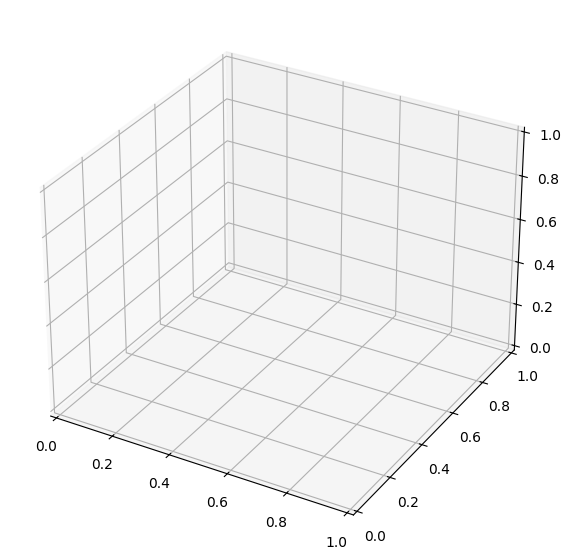

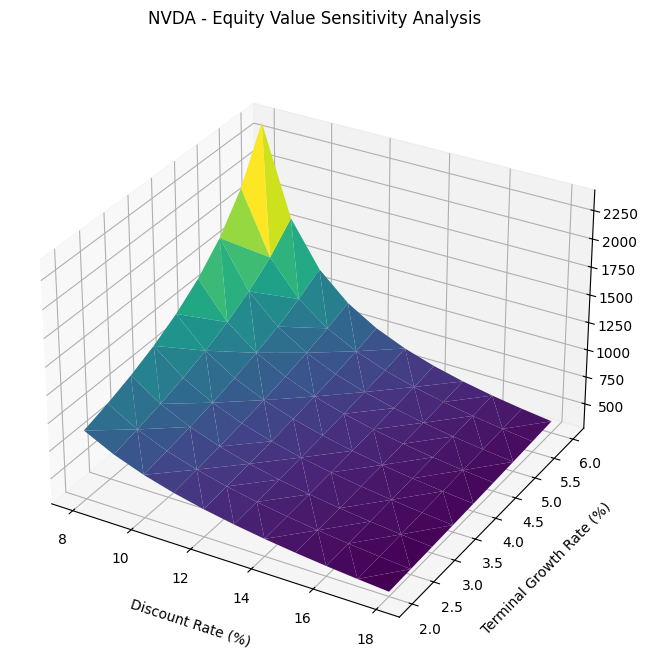


🧾 Explanation:
Rows → Discount Rates (WACC)
Columns → Terminal Growth Rates
Each cell → Equity Value (in Billion USD) under these assumptions



2.0%    2.5%     3.0%     3.5%     4.0%     4.5%     5.0%     5.5%  \
8.0%   895.28  963.06  1044.38  1143.78  1268.02  1427.77  1640.76  1938.96   
9.0%   762.03   809.4   864.67   929.99  1008.37  1104.17  1223.92  1377.88   
10.0%  662.22  696.86   736.44   782.11    835.4   898.38   973.95  1066.31   
11.0%   584.7   610.9   640.38   673.78   711.96   756.01    807.4   868.14   
12.0%  522.78  543.13   565.75   591.03   619.46   651.69   688.52   731.02   
13.0%   472.2  488.36   506.13   525.77    547.6   571.99   599.44   630.54   
14.0%  430.12  443.18   457.42   473.02   490.17   509.14   530.21   553.76   
15.0%  394.59  405.29   416.89   429.49   443.25   458.31   474.88   493.19   
16.0%  364.18  373.07   382.65   392.99   404.19   416.37   429.65    444.2   
17.0%  337.88  345.34   353.34   361.93   371.18   381.18    392.0   403.77   
18.0%  314.91  321.24   327.99    335.2   342.93   351.24   360.18   369.84   

          6.0%  
8.0%   2386.24  
9.0%   1583.17  
10.0%  1181.76  
11.0%   941.02  
12.0%    780.6  
13.0%   666.08  
14.0%   580.25  
15.0%   513.54  
16.0%    460.2  
17.0%    416.6  
18.0%    380.3

In [ ]:
get_sensitivity_analysis("NVDA")

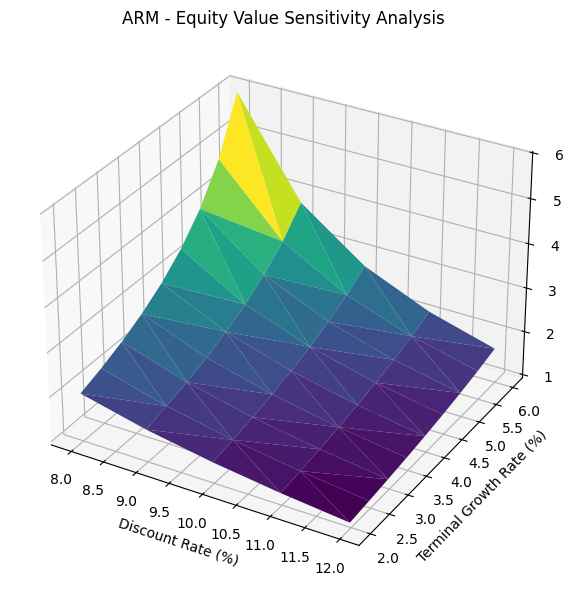


🧾 Explanation:
Rows → Discount Rates (WACC)
Columns → Terminal Growth Rates
Each cell → Equity Value (in Billion USD) under these assumptions



2.0%  2.5%  3.0%  3.5%  4.0%  4.5%  5.0%  5.5%  6.0%
8.0%    2.0  2.18  2.39  2.65  2.98  3.39  3.96  4.74  5.92
9.0%   1.65  1.77  1.92  2.09  2.29  2.55  2.86  3.26   3.8
10.0%  1.39  1.48  1.58   1.7  1.84  2.01  2.21  2.45  2.75
11.0%  1.19  1.26  1.33  1.42  1.52  1.64  1.77  1.93  2.12
12.0%  1.03  1.08  1.14   1.2  1.28  1.36  1.46  1.57   1.7

In [ ]:
get_sensitivity_analysis("ARM")

In [ ]:
import yfinance as yf
import pandas as pd
from typing import Annotated, Tuple
import time
from functools import wraps

def init_ticker(func):
    """Decorator to initialize yf.Ticker and pass it to the function."""
    @wraps(func)
    def wrapper(symbol: Annotated[str, "ticker symbol"], *args, **kwargs):
        try:
            time.sleep(10)
            ticker = yf.Ticker(symbol)
            return func(ticker, *args, **kwargs)
        except Exception as e:
            print(f"Error fetching data for {symbol}: {e}")
            return None
    return wrapper

class YFinanceUtils:

    @init_ticker
    def get_income_stmt(ticker: Annotated[str, "ticker symbol"]) -> pd.DataFrame:
        """Fetches and returns the latest income statement of the company as a DataFrame."""
        income_stmt = ticker.financials
        return income_stmt

    @init_ticker
    def get_balance_sheet(ticker: Annotated[str, "ticker symbol"]) -> pd.DataFrame:
        """Fetches and returns the latest balance sheet of the company as a DataFrame."""
        balance_sheet = ticker.balance_sheet
        return balance_sheet

    @init_ticker
    def get_cash_flow(ticker: Annotated[str, "ticker symbol"]) -> pd.DataFrame:
        """Fetches and returns the latest cash flow statement of the company as a DataFrame."""
        cash_flow = ticker.cashflow
        return cash_flow

    @init_ticker
    def get_stock_info(ticker: Annotated[str, "ticker symbol"]) -> dict:
        """Fetches and returns latest stock information."""
        stock_info = ticker.info
        return stock_info

    @init_ticker
    def get_stock_data(ticker: Annotated[str, "ticker symbol"], start_date: Annotated[str, "start date"], end_date: Annotated[str, "end date"]) -> pd.DataFrame:
        """Retrieve stock price data for the designated ticker symbol."""
        stock_data = ticker.history(start=start_date, end=end_date)
        return stock_data

    @init_ticker
    def get_analyst_recommendations(ticker: Annotated[str, "ticker symbol"]) -> tuple:
        """Fetches the latest analyst recommendations and returns the most common recommendation and its count."""
        recommendations = ticker.recommendations
        if recommendations.empty:
            return None, 0
        row_0 = recommendations.iloc[0, 1:]  # Exclude 'period' column if necessary
        max_votes = row_0.max()
        majority_voting_result = row_0[row_0 == max_votes].index.tolist()
        return majority_voting_result[0], max_votes

    @init_ticker
    def estimate_discount_rate(ticker: Annotated[str, "ticker symbol"], risk_free_rate: float = 0.045, market_return: float = 0.10) -> float:
        """Estimate the weighted average cost of capital (WACC) for a company."""
        info = ticker.info
        market_cap = info.get('marketCap', None)
        beta = info.get('beta', 1.0) or 1.0

        bs = ticker.balance_sheet
        debt = 0
        for key in ['Long Term Debt', 'Total Debt']:
            if key in bs.index:
                debt = bs.loc[key].iloc[0]
                break

        is_ = ticker.financials
        try:
            tax_expense = is_.loc['Income Tax Expense'].iloc[0]
            pretax_income = is_.loc['Ebit'].iloc[0]
            tax_rate = tax_expense / pretax_income if pretax_income != 0 else 0.2
        except:
            tax_rate = 0.2

        cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
        cost_of_debt = 0.04
        if market_cap is None:
            raise ValueError("Market Cap not available")

        total_capital = market_cap + debt
        wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
        return round(wacc, 4)

    @init_ticker
    def fetch_fcf_cash_debt(ticker: Annotated[str, "ticker symbol"]) -> Tuple[float, float, float]:
        """Fetches Free Cash Flow, Cash, and Debt for a given ticker symbol."""
        cf = ticker.cashflow.T
        if "Free Cash Flow" not in cf.columns:
            raise ValueError("Free Cash Flow not available")
        fcf = cf["Free Cash Flow"].iloc[0]

        bs = ticker.balance_sheet
        cash = bs.loc["Cash"].iloc[0] if "Cash" in bs.index else 0
        debt = 0
        for key in ['Long Term Debt', 'Total Debt']:
            if key in bs.index:
                debt = bs.loc[key].iloc[0]
                break

        return fcf, cash, debt


In [ ]:
import yfinance as yf
import pandas as pd
# from yfinance_utill import YFinanceUtils

class ReportAnalysisUtils:

    @staticmethod
    def get_sensitivity_analysis(ticker_symbol: Annotated[str, "ticker symbol"], growth_rate: Annotated[float, "growth rate, e.g., 0.10"] = 0.10, forecast_years: Annotated[int, "forecast years, e.g., 5"] = 5) -> pd.DataFrame:
        """Fetches Sensitivity analysis for a given ticker symbol."""

        # Fetch Discount Rate, FCF, Cash, Debt from YFinanceUtils
        # yfinance_utils = YFinanceUtils
        base_discount_rate = YFinanceUtils.estimate_discount_rate(ticker_symbol)
        fcf, cash, debt = YFinanceUtils.fetch_fcf_cash_debt(ticker_symbol)

        # Base Free Cash Flow calculation
        base_fcf = fcf / (1 + growth_rate)**forecast_years
        fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

        # Define Discount Rates and Terminal Growth Rates
        discount_rates = np.round(np.arange(base_discount_rate - 0.02, base_discount_rate + 0.03, 0.01), 4)
        terminal_growth_rates = np.round(np.arange(0.02, 0.06 + 0.001, 0.005), 4)

        # Labels for the table
        discount_labels = [f"{r*100:.1f}%" for r in discount_rates]
        growth_labels = [f"{g*100:.1f}%" for g in terminal_growth_rates]

        # Create empty DataFrame to store results
        table = pd.DataFrame(index=discount_labels, columns=growth_labels)

        # Populate table with calculated values
        for r, r_label in zip(discount_rates, discount_labels):
            for g, g_label in zip(terminal_growth_rates, growth_labels):
                try:
                    if r <= g:
                        table.loc[r_label, g_label] = "N/A"
                        continue

                    discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
                    terminal_value = fcf_list[-1] * (1 + g) / (r - g)
                    discounted_terminal_value = terminal_value / (1 + r)**forecast_years
                    enterprise_value = sum(discounted) + discounted_terminal_value
                    equity_value = enterprise_value - debt + cash
                    table.loc[r_label, g_label] = round(equity_value / 1e9, 2)
                except Exception as e:
                    table.loc[r_label, g_label] = "Err"

        return table


In [ ]:
ReportAnalysisUtils.get_sensitivity_analysis("NVDA")

2.0%    2.5%    3.0%    3.5%    4.0%    4.5%    5.0%    5.5%    6.0%
14.3%  419.95  432.31  445.76  460.46   476.6  494.38  514.09  536.04  560.64
15.3%  385.92  396.09  407.09  419.02  432.01  446.21  461.79  478.97   498.0
16.3%  356.71  365.18  374.29  384.12  394.74  406.27  418.82  432.54  447.59
17.3%  331.38  338.51  346.14  354.33  363.13  372.63  382.89  394.03  406.16
18.3%   309.2  315.26  321.72  328.61  335.99   343.9  352.42  361.59  371.52

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast].values.tolist()  # Accessing using iloc and converting to list
    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'AAPL'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for AAPL:
Market Cap: 3017795436544
Shares Outstanding: 14840399872
Return on Equity: 1.49814
WACC: 1.4579
Cash Flow Data (last 5 years):
                               2024-09-30    2023-09-30    2022-09-30  \
Free Cash Flow               1.088070e+11  9.958400e+10  1.114430e+11   
Repurchase Of Capital Stock -9.494900e+10 -7.755000e+10 -8.940200e+10   
Repayment Of Debt           -9.958000e+09 -1.115100e+10 -9.543000e+09   
Issuance Of Debt             0.000000e+00  5.228000e+09  5.465000e+09   
Issuance Of Capital Stock             NaN           NaN           NaN   

                               2021-09-30   2020-09-30  
Free Cash Flow               9.295300e+10          NaN  
Repurchase Of Capital Stock -8.597100e+10          NaN  
Repayment Of Debt           -8.750000e+09          NaN  
Issuance Of Debt             2.039300e+10          NaN  
Issuance Of Capital Stock    1.105000e+09  880000000.0  
Intrinsic Value per Share for AAPL: $nan


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.05):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'AAPL'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for AAPL:
Market Cap: 3017795436544
Shares Outstanding: 14840399872
Return on Equity: 1.49814
WACC: 1.4579
Cash Flow Data (last 5 years):
                               2024-09-30    2023-09-30    2022-09-30  \
Free Cash Flow               1.088070e+11  9.958400e+10  1.114430e+11   
Repurchase Of Capital Stock -9.494900e+10 -7.755000e+10 -8.940200e+10   
Repayment Of Debt           -9.958000e+09 -1.115100e+10 -9.543000e+09   
Issuance Of Debt             0.000000e+00  5.228000e+09  5.465000e+09   
Issuance Of Capital Stock             NaN           NaN           NaN   

                               2021-09-30   2020-09-30  
Free Cash Flow               9.295300e+10          NaN  
Repurchase Of Capital Stock -8.597100e+10          NaN  
Repayment Of Debt           -8.750000e+09          NaN  
Issuance Of Debt             2.039300e+10          NaN  
Issuance Of Capital Stock    1.105000e+09  880000000.0  
Free Cash Flow (after handling missing data): 2024-09-30    1.088070e+11
202

/tmp/ipython-input-969033276.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.05):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'AAPL'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for AAPL:
Market Cap: 3017795436544
Shares Outstanding: 14840399872
Return on Equity: 1.49814
WACC: 1.4579
Cash Flow Data (last 5 years):
                               2024-09-30    2023-09-30    2022-09-30  \
Free Cash Flow               1.088070e+11  9.958400e+10  1.114430e+11   
Repurchase Of Capital Stock -9.494900e+10 -7.755000e+10 -8.940200e+10   
Repayment Of Debt           -9.958000e+09 -1.115100e+10 -9.543000e+09   
Issuance Of Debt             0.000000e+00  5.228000e+09  5.465000e+09   
Issuance Of Capital Stock             NaN           NaN           NaN   

                               2021-09-30   2020-09-30  
Free Cash Flow               9.295300e+10          NaN  
Repurchase Of Capital Stock -8.597100e+10          NaN  
Repayment Of Debt           -8.750000e+09          NaN  
Issuance Of Debt             2.039300e+10          NaN  
Issuance Of Capital Stock    1.105000e+09  880000000.0  
Free Cash Flow (after handling missing data): 2024-09-30    1.088070e+11
202

/tmp/ipython-input-746104180.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.10):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'NVDA'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for NVDA:
Market Cap: 4389768003584
Shares Outstanding: 24387600384
Return on Equity: 1.15463
WACC: 1.1525
Cash Flow Data (last 5 years):
                               2025-01-31    2024-01-31    2023-01-31  \
Free Cash Flow               6.085300e+10  2.702100e+10  3.808000e+09   
Repurchase Of Capital Stock -3.370600e+10 -9.533000e+09 -1.003900e+10   
Repayment Of Debt           -1.250000e+09 -1.250000e+09  0.000000e+00   
Issuance Of Debt                      NaN  0.000000e+00  0.000000e+00   
Capital Expenditure         -3.236000e+09 -1.069000e+09 -1.833000e+09   

                               2022-01-31    2021-01-31  
Free Cash Flow               8.132000e+09           NaN  
Repurchase Of Capital Stock  0.000000e+00           NaN  
Repayment Of Debt           -1.000000e+09           NaN  
Issuance Of Debt             4.977000e+09  4.968000e+09  
Capital Expenditure         -9.760000e+08           NaN  
Free Cash Flow (after handling missing data): 2025-01-31    6.085300e+

/tmp/ipython-input-2228656922.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'ARM'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for ARM:
Market Cap: 148349370368
Shares Outstanding: 1059260032
Return on Equity: 0.11034001
WACC: 0.1102
Cash Flow Data (last 5 years):
                                    2025-03-31   2024-03-31   2023-03-31  \
Free Cash Flow                     158000000.0  947000000.0  646000000.0   
Issuance Of Debt                           NaN          0.0          0.0   
Capital Expenditure               -239000000.0 -143000000.0  -93000000.0   
Interest Paid Supplemental Data            NaN          0.0          0.0   
Income Tax Paid Supplemental Data  149000000.0  187000000.0  157000000.0   

                                    2022-03-31  2021-03-31  
Free Cash Flow                     383000000.0         NaN  
Issuance Of Debt                    50000000.0         0.0  
Capital Expenditure                -75000000.0         NaN  
Interest Paid Supplemental Data      1000000.0   1000000.0  
Income Tax Paid Supplemental Data  141000000.0         NaN  
Free Cash Flow (after handling mis

/tmp/ipython-input-2784087764.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'QCOM'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for QCOM:
Market Cap: 159163285504
Shares Outstanding: 1079000064
Return on Equity: 0.44615
WACC: 0.4149
Cash Flow Data (last 5 years):
                               2024-09-30    2023-09-30    2022-09-30  \
Free Cash Flow               1.116100e+10  9.849000e+09  6.834000e+09   
Repurchase Of Capital Stock -4.121000e+09 -2.973000e+09 -3.129000e+09   
Repayment Of Debt           -1.713000e+09 -7.012000e+09 -8.892000e+09   
Issuance Of Debt             7.990000e+08  6.948000e+09  8.477000e+09   
Issuance Of Capital Stock    3.830000e+08  4.340000e+08  3.560000e+08   

                               2021-09-30  2020-09-30  
Free Cash Flow               8.648000e+09         NaN  
Repurchase Of Capital Stock -3.366000e+09         NaN  
Repayment Of Debt           -2.885000e+09         NaN  
Issuance Of Debt             2.886000e+09         NaN  
Issuance Of Capital Stock    3.470000e+08         NaN  
Free Cash Flow (after handling missing data): 2024-09-30    1.116100e+10
2023-09-30 

/tmp/ipython-input-2679652268.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'PCAR'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for PCAR:
Market Cap: 50588422144
Shares Outstanding: 525103008
Return on Equity: 0.16771
WACC: 0.1459
Cash Flow Data (last 5 years):
                               2024-12-31    2023-12-31    2022-12-31  \
Free Cash Flow               2.895300e+09  2.927500e+09  1.636500e+09   
Repurchase Of Capital Stock -4.500000e+06 -3.500000e+06 -2.100000e+06   
Repayment Of Debt           -2.473100e+09 -2.233200e+09 -2.265800e+09   
Issuance Of Debt             3.891200e+09  3.085000e+09  3.171700e+09   
Capital Expenditure         -1.745600e+09 -1.262500e+09 -1.390500e+09   

                               2021-12-31  2020-12-31  
Free Cash Flow               5.539000e+08         NaN  
Repurchase Of Capital Stock -1.500000e+06         NaN  
Repayment Of Debt           -2.336700e+09         NaN  
Issuance Of Debt             2.101100e+09         NaN  
Capital Expenditure         -1.632800e+09         NaN  
Free Cash Flow (after handling missing data): 2024-12-31    2.895300e+09
2023-12-31   

/tmp/ipython-input-2268311134.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'MSFT'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for MSFT:
Market Cap: 3981503365120
Shares Outstanding: 7433169920
Return on Equity: 0.33280998
WACC: 0.3299
Cash Flow Data (last 5 years):
                               2025-06-30    2024-06-30    2023-06-30  \
Free Cash Flow               7.161100e+10  7.407100e+10  5.947500e+10   
Repurchase Of Capital Stock -1.842000e+10 -1.725400e+10 -2.224500e+10   
Repayment Of Debt           -3.216000e+09 -2.907000e+10 -2.750000e+09   
Issuance Of Debt             0.000000e+00  2.439500e+10  0.000000e+00   
Issuance Of Capital Stock    2.056000e+09  2.002000e+09  1.866000e+09   

                               2022-06-30  2021-06-30  
Free Cash Flow               6.514900e+10         NaN  
Repurchase Of Capital Stock -3.269600e+10         NaN  
Repayment Of Debt           -9.023000e+09         NaN  
Issuance Of Debt             0.000000e+00         NaN  
Issuance Of Capital Stock    1.841000e+09         NaN  
Free Cash Flow (after handling missing data): 2025-06-30    7.161100e+10
2024-06

/tmp/ipython-input-467184147.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'COST'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for COST:
Market Cap: 423684603904
Shares Outstanding: 443476992
Return on Equity: 0.3208
WACC: 0.3170
Cash Flow Data (last 5 years):
                               2024-08-31    2023-08-31    2022-08-31  \
Free Cash Flow               6.629000e+09  6.745000e+09  3.501000e+09   
Repurchase Of Capital Stock -7.000000e+08 -6.760000e+08 -4.390000e+08   
Repayment Of Debt           -2.134000e+09 -1.301000e+09 -9.860000e+08   
Issuance Of Debt             1.426000e+09  9.170000e+08  5.300000e+07   
Capital Expenditure         -4.710000e+09 -4.323000e+09 -3.891000e+09   

                               2021-08-31  2020-08-31  
Free Cash Flow               5.370000e+09         NaN  
Repurchase Of Capital Stock -4.960000e+08         NaN  
Repayment Of Debt           -1.610000e+08         NaN  
Issuance Of Debt             4.100000e+07         NaN  
Capital Expenditure         -3.588000e+09         NaN  
Free Cash Flow (after handling missing data): 2024-08-31    6.629000e+09
2023-08-31   

/tmp/ipython-input-483981685.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

def calculate_intrinsic_value(ticker_symbol, years_forecast=4, growth_rate=0.03):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 4 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage
ticker_symbol = 'GOOGL'  # Apple Inc.
intrinsic_value = calculate_intrinsic_value(ticker_symbol)

if intrinsic_value is not None:
    print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Data for GOOGL:
Market Cap: 2362675560448
Shares Outstanding: 5816999936
Return on Equity: 0.34829
WACC: 0.3469
Cash Flow Data (last 5 years):
                               2024-12-31    2023-12-31    2022-12-31  \
Free Cash Flow               7.276400e+10  6.949500e+10  6.001000e+10   
Repurchase Of Capital Stock -6.222200e+10 -6.150400e+10 -5.929600e+10   
Repayment Of Debt           -1.270100e+10 -1.155000e+10 -5.406800e+10   
Issuance Of Debt             1.358900e+10  1.079000e+10  5.287200e+10   
Capital Expenditure         -5.253500e+10 -3.225100e+10 -3.148500e+10   

                               2021-12-31  2020-12-31  
Free Cash Flow               6.701200e+10         NaN  
Repurchase Of Capital Stock -5.027400e+10         NaN  
Repayment Of Debt           -2.143500e+10         NaN  
Issuance Of Debt             2.019900e+10         NaN  
Capital Expenditure         -2.464000e+10         NaN  
Free Cash Flow (after handling missing data): 2024-12-31    7.276400e+10
2023-12-3

/tmp/ipython-input-2968576449.py:60: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np

def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Example usage:
ticker_symbol = 'AAPL'  # Apple Inc.
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")


Raw Free Cash Flow data for AAPL:
2024-09-30    1.088070e+11
2023-09-30    9.958400e+10
2022-09-30    1.114430e+11
2021-09-30    9.295300e+10
2020-09-30             NaN
Name: Free Cash Flow, dtype: float64
CAGR for AAPL's Free Cash Flow over the last 5 years: 5.39%


In [ ]:
import yfinance as yf
import numpy as np

def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Example usage:
ticker_symbol = 'NVDA'  # Apple Inc.
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")


Raw Free Cash Flow data for NVDA:
2025-01-31    6.085300e+10
2024-01-31    2.702100e+10
2023-01-31    3.808000e+09
2022-01-31    8.132000e+09
2021-01-31             NaN
Name: Free Cash Flow, dtype: float64
CAGR for NVDA's Free Cash Flow over the last 5 years: 95.60%


In [ ]:
import yfinance as yf
import numpy as np

def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Example usage:
ticker_symbol = 'MSFT'  # Apple Inc.
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")


Raw Free Cash Flow data for MSFT:
2025-06-30    7.161100e+10
2024-06-30    7.407100e+10
2023-06-30    5.947500e+10
2022-06-30    6.514900e+10
2021-06-30             NaN
Name: Free Cash Flow, dtype: float64
CAGR for MSFT's Free Cash Flow over the last 5 years: 3.20%


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Function to calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Function to calculate Weighted Average Cost of Capital (WACC)
def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

# Function to estimate terminal value using the perpetuity growth model
def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

# Function to calculate Intrinsic Value using DCF
def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=None):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # If no growth rate is provided, calculate it using CAGR
    if growth_rate is None:
        growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=years_forecast)
        if growth_rate is None:
            print("Could not calculate CAGR. Cannot proceed with Intrinsic Value calculation.")
            return None

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage:
ticker_symbol = 'NVDA'  # Example ticker (NVIDIA)
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")
    intrinsic_value = calculate_intrinsic_value(ticker_symbol, growth_rate=growth_rate)
    if intrinsic_value is not None:
        print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Raw Free Cash Flow data for NVDA:
2025-01-31    6.085300e+10
2024-01-31    2.702100e+10
2023-01-31    3.808000e+09
2022-01-31    8.132000e+09
2021-01-31             NaN
Name: Free Cash Flow, dtype: float64
CAGR for NVDA's Free Cash Flow over the last 5 years: 95.60%
Data for NVDA:
Market Cap: 4389768003584
Shares Outstanding: 24387600384
Return on Equity: 1.15463
WACC: 1.1525
Cash Flow Data (last 5 years):
                               2025-01-31    2024-01-31    2023-01-31  \
Free Cash Flow               6.085300e+10  2.702100e+10  3.808000e+09   
Repurchase Of Capital Stock -3.370600e+10 -9.533000e+09 -1.003900e+10   
Repayment Of Debt           -1.250000e+09 -1.250000e+09  0.000000e+00   
Issuance Of Debt                      NaN  0.000000e+00  0.000000e+00   
Capital Expenditure         -3.236000e+09 -1.069000e+09 -1.833000e+09   

                               2022-01-31    2021-01-31  
Free Cash Flow               8.132000e+09           NaN  
Repurchase Of Capital Stock  0.0000

/tmp/ipython-input-4123962271.py:109: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Function to calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Function to calculate Weighted Average Cost of Capital (WACC)
def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

# Function to estimate terminal value using the perpetuity growth model
def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

# Function to calculate Intrinsic Value using DCF
def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=None):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # If no growth rate is provided, calculate it using CAGR
    if growth_rate is None:
        growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=years_forecast)
        if growth_rate is None:
            print("Could not calculate CAGR. Cannot proceed with Intrinsic Value calculation.")
            return None

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage:
ticker_symbol = 'AAPL'  # Example ticker (NVIDIA)
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")
    intrinsic_value = calculate_intrinsic_value(ticker_symbol, growth_rate=growth_rate)
    if intrinsic_value is not None:
        print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Raw Free Cash Flow data for AAPL:
2024-09-30    1.088070e+11
2023-09-30    9.958400e+10
2022-09-30    1.114430e+11
2021-09-30    9.295300e+10
2020-09-30             NaN
Name: Free Cash Flow, dtype: float64
CAGR for AAPL's Free Cash Flow over the last 5 years: 5.39%
Data for AAPL:
Market Cap: 3017795436544
Shares Outstanding: 14840399872
Return on Equity: 1.49814
WACC: 1.4579
Cash Flow Data (last 5 years):
                               2024-09-30    2023-09-30    2022-09-30  \
Free Cash Flow               1.088070e+11  9.958400e+10  1.114430e+11   
Repurchase Of Capital Stock -9.494900e+10 -7.755000e+10 -8.940200e+10   
Repayment Of Debt           -9.958000e+09 -1.115100e+10 -9.543000e+09   
Issuance Of Debt             0.000000e+00  5.228000e+09  5.465000e+09   
Issuance Of Capital Stock             NaN           NaN           NaN   

                               2021-09-30   2020-09-30  
Free Cash Flow               9.295300e+10          NaN  
Repurchase Of Capital Stock -8.597100e

/tmp/ipython-input-2274229988.py:109: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Function to calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Function to calculate Weighted Average Cost of Capital (WACC)
def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

# Function to estimate terminal value using the perpetuity growth model
def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

# Function to calculate Intrinsic Value using DCF
def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=None):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # If no growth rate is provided, calculate it using CAGR
    if growth_rate is None:
        growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=years_forecast)
        if growth_rate is None:
            print("Could not calculate CAGR. Cannot proceed with Intrinsic Value calculation.")
            return None

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage:
ticker_symbol = 'ARM'  # Example ticker (NVIDIA)
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")
    intrinsic_value = calculate_intrinsic_value(ticker_symbol, growth_rate=growth_rate)
    if intrinsic_value is not None:
        print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Raw Free Cash Flow data for ARM:
2025-03-31    158000000.0
2024-03-31    947000000.0
2023-03-31    646000000.0
2022-03-31    383000000.0
2021-03-31            NaN
Name: Free Cash Flow, dtype: float64
CAGR for ARM's Free Cash Flow over the last 5 years: -25.56%
Data for ARM:
Market Cap: 148349370368
Shares Outstanding: 1059260032
Return on Equity: 0.11034001
WACC: 0.1102
Cash Flow Data (last 5 years):
                                    2025-03-31   2024-03-31   2023-03-31  \
Free Cash Flow                     158000000.0  947000000.0  646000000.0   
Issuance Of Debt                           NaN          0.0          0.0   
Capital Expenditure               -239000000.0 -143000000.0  -93000000.0   
Interest Paid Supplemental Data            NaN          0.0          0.0   
Income Tax Paid Supplemental Data  149000000.0  187000000.0  157000000.0   

                                    2022-03-31  2021-03-31  
Free Cash Flow                     383000000.0         NaN  
Issuance Of Debt 

/tmp/ipython-input-3127414566.py:109: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Function to calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Function to calculate Weighted Average Cost of Capital (WACC)
def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

# Function to estimate terminal value using the perpetuity growth model
def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

# Function to calculate Intrinsic Value using DCF
def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=None):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # If no growth rate is provided, calculate it using CAGR
    if growth_rate is None:
        growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=years_forecast)
        if growth_rate is None:
            print("Could not calculate CAGR. Cannot proceed with Intrinsic Value calculation.")
            return None

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage:
ticker_symbol = 'COST'  # Example ticker (NVIDIA)
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")
    intrinsic_value = calculate_intrinsic_value(ticker_symbol, growth_rate=growth_rate)
    if intrinsic_value is not None:
        print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Raw Free Cash Flow data for COST:
2024-08-31    6.629000e+09
2023-08-31    6.745000e+09
2022-08-31    3.501000e+09
2021-08-31    5.370000e+09
2020-08-31             NaN
Name: Free Cash Flow, dtype: float64
CAGR for COST's Free Cash Flow over the last 5 years: 7.27%
Data for COST:
Market Cap: 423684603904
Shares Outstanding: 443476992
Return on Equity: 0.3208
WACC: 0.3170
Cash Flow Data (last 5 years):
                               2024-08-31    2023-08-31    2022-08-31  \
Free Cash Flow               6.629000e+09  6.745000e+09  3.501000e+09   
Repurchase Of Capital Stock -7.000000e+08 -6.760000e+08 -4.390000e+08   
Repayment Of Debt           -2.134000e+09 -1.301000e+09 -9.860000e+08   
Issuance Of Debt             1.426000e+09  9.170000e+08  5.300000e+07   
Capital Expenditure         -4.710000e+09 -4.323000e+09 -3.891000e+09   

                               2021-08-31  2020-08-31  
Free Cash Flow               5.370000e+09         NaN  
Repurchase Of Capital Stock -4.960000e+08   

/tmp/ipython-input-2480123084.py:109: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Function to calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Function to calculate Weighted Average Cost of Capital (WACC)
def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

# Function to estimate terminal value using the perpetuity growth model
def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

# Function to calculate Intrinsic Value using DCF
def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=None):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # If no growth rate is provided, calculate it using CAGR
    if growth_rate is None:
        growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=years_forecast)
        if growth_rate is None:
            print("Could not calculate CAGR. Cannot proceed with Intrinsic Value calculation.")
            return None

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage:
ticker_symbol = 'MSFT'  # Example ticker (NVIDIA)
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")
    intrinsic_value = calculate_intrinsic_value(ticker_symbol, growth_rate=growth_rate)
    if intrinsic_value is not None:
        print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Raw Free Cash Flow data for MSFT:
2025-06-30    7.161100e+10
2024-06-30    7.407100e+10
2023-06-30    5.947500e+10
2022-06-30    6.514900e+10
2021-06-30             NaN
Name: Free Cash Flow, dtype: float64
CAGR for MSFT's Free Cash Flow over the last 5 years: 3.20%
Data for MSFT:
Market Cap: 3981503365120
Shares Outstanding: 7433169920
Return on Equity: 0.33280998
WACC: 0.3299
Cash Flow Data (last 5 years):
                               2025-06-30    2024-06-30    2023-06-30  \
Free Cash Flow               7.161100e+10  7.407100e+10  5.947500e+10   
Repurchase Of Capital Stock -1.842000e+10 -1.725400e+10 -2.224500e+10   
Repayment Of Debt           -3.216000e+09 -2.907000e+10 -2.750000e+09   
Issuance Of Debt             0.000000e+00  2.439500e+10  0.000000e+00   
Issuance Of Capital Stock    2.056000e+09  2.002000e+09  1.866000e+09   

                               2022-06-30  2021-06-30  
Free Cash Flow               6.514900e+10         NaN  
Repurchase Of Capital Stock -3.269600e

/tmp/ipython-input-3942947609.py:109: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

# Function to calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    cashflow_data = ticker.cashflow

    # Check if the requested metric exists in the data
    if metric not in cashflow_data.index:
        print(f"{metric} data is not available for {ticker_symbol}.")
        return None

    # Get the values for the requested metric over the last 'years' periods
    metric_values = cashflow_data.loc[metric].iloc[:years]

    print(f"Raw {metric} data for {ticker_symbol}:")
    print(metric_values)  # Debugging step to inspect data

    if len(metric_values) < 2:
        print(f"Insufficient data for calculating CAGR for {metric}.")
        return None

    # Remove NaN values (if any) or fill them
    metric_values = metric_values.dropna()  # Drop NaN values

    # Check if there are enough valid data points left
    if len(metric_values) < 2:
        print(f"Not enough valid data for CAGR calculation for {metric}.")
        return None

    # Get the start and end values for the CAGR calculation
    start_value = metric_values.iloc[-1]  # value at the start of the period
    end_value = metric_values.iloc[0]  # value at the end of the period
    periods = len(metric_values) - 1  # number of periods (years)

    # Calculate CAGR
    cagr = (end_value / start_value) ** (1 / periods) - 1

    return cagr

# Function to calculate Weighted Average Cost of Capital (WACC)
def calculate_wacc(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Get required financials
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0)  # If no beta is available, assume 1.0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in ticker.balance_sheet.index:
            debt = ticker.balance_sheet.loc[key].iloc[0]
            break

    equity = market_cap if market_cap else 1  # Default to 1 if market_cap is missing
    cost_of_equity = info.get('returnOnEquity', 0.12)  # Estimated cost of equity based on return on equity
    risk_free_rate = 0.045  # Assuming a risk-free rate of 4.5%
    market_return = 0.10  # Assuming a market return of 10%

    cost_of_debt = 0.05  # Assuming 5% cost of debt

    # Calculate WACC
    wacc = ((equity / (equity + debt)) * cost_of_equity) + ((debt / (equity + debt)) * cost_of_debt * (1 - 0.2))  # Assuming 20% tax rate
    return wacc

# Function to estimate terminal value using the perpetuity growth model
def estimate_terminal_value(fcf, wacc, growth_rate):
    # Estimate the terminal value using the perpetuity growth model
    terminal_value = fcf * (1 + growth_rate) / (wacc - growth_rate)
    return terminal_value

# Function to calculate Intrinsic Value using DCF
def calculate_intrinsic_value(ticker_symbol, years_forecast=5, growth_rate=None):
    # Get the company's data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # If no growth rate is provided, calculate it using CAGR
    if growth_rate is None:
        growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=years_forecast)
        if growth_rate is None:
            print("Could not calculate CAGR. Cannot proceed with Intrinsic Value calculation.")
            return None

    # Print out retrieved data for debugging
    print(f"Data for {ticker_symbol}:")
    print(f"Market Cap: {info.get('marketCap', 'N/A')}")
    print(f"Shares Outstanding: {info.get('sharesOutstanding', 'N/A')}")
    print(f"Return on Equity: {info.get('returnOnEquity', 'N/A')}")

    # Calculate WACC
    wacc = calculate_wacc(ticker_symbol)
    print(f"WACC: {wacc:.4f}")

    # Get Free Cash Flow data (if available)
    fcf_data = ticker.cashflow
    print("Cash Flow Data (last 5 years):")
    print(fcf_data.head())  # Print the first few rows of the cashflow to verify

    # Handle missing data in Free Cash Flow
    if 'Free Cash Flow' in fcf_data.index:
        free_cash_flow = fcf_data.loc['Free Cash Flow'].iloc[:years_forecast]

        # If there are NaN values, use the most recent available value to fill in missing data
        free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data
        print(f"Free Cash Flow (after handling missing data): {free_cash_flow}")

    else:
        # If Free Cash Flow is not available, estimate it using operating income and capital expenditures
        operating_income = ticker.financials.loc['Operating Income'].iloc[0] if 'Operating Income' in ticker.financials.index else 0
        capex = ticker.capital_gains.loc['Capital Expenditures'].iloc[0] if 'Capital Expenditures' in ticker.capital_gains.index else 0
        free_cash_flow = [operating_income - capex] * years_forecast  # Repeat the same value for forecast period
        print(f"Free Cash Flow not available, estimated Free Cash Flow: {free_cash_flow}")

    # Forecast the FCF for the next years (simple extrapolation)
    forecasted_fcf = free_cash_flow[:years_forecast]

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = estimate_terminal_value(free_cash_flow.iloc[-1], wacc, growth_rate)

    # Calculate the Present Value of Free Cash Flows
    pv_of_fcf = 0
    for t, fcf in enumerate(forecasted_fcf, start=1):
        pv_of_fcf += fcf / (1 + wacc) ** t

    # Calculate the Present Value of Terminal Value
    pv_of_terminal_value = terminal_value / (1 + wacc) ** years_forecast

    # Add them up to get the total intrinsic value
    intrinsic_value = pv_of_fcf + pv_of_terminal_value

    # Get the number of shares outstanding
    shares_outstanding = info.get('sharesOutstanding', None)

    if shares_outstanding is None or shares_outstanding == 0:
        print(f"Error: Unable to retrieve number of shares outstanding for {ticker_symbol}.")
        return None

    # Calculate the intrinsic value per share
    intrinsic_value_per_share = intrinsic_value / shares_outstanding

    # Get the actual market price per share
    market_price = info.get('regularMarketPrice', None)

    if market_price is None:
        print(f"Error: Unable to retrieve market price for {ticker_symbol}.")
        return None

    print(f"Actual Market Price per Share for {ticker_symbol}: ${market_price:.2f}")
    return intrinsic_value_per_share

# Example usage:
ticker_symbol = 'QCOM'  # Example ticker (NVIDIA)
growth_rate = calculate_cagr(ticker_symbol, metric='Free Cash Flow', years=5)

if growth_rate is not None:
    print(f"CAGR for {ticker_symbol}'s Free Cash Flow over the last 5 years: {growth_rate*100:.2f}%")
    intrinsic_value = calculate_intrinsic_value(ticker_symbol, growth_rate=growth_rate)
    if intrinsic_value is not None:
        print(f"Intrinsic Value per Share for {ticker_symbol}: ${intrinsic_value:.2f}")


Raw Free Cash Flow data for QCOM:
2024-09-30    1.116100e+10
2023-09-30    9.849000e+09
2022-09-30    6.834000e+09
2021-09-30    8.648000e+09
2020-09-30             NaN
Name: Free Cash Flow, dtype: float64
CAGR for QCOM's Free Cash Flow over the last 5 years: 8.88%
Data for QCOM:
Market Cap: 159163285504
Shares Outstanding: 1079000064
Return on Equity: 0.44615
WACC: 0.4149
Cash Flow Data (last 5 years):
                               2024-09-30    2023-09-30    2022-09-30  \
Free Cash Flow               1.116100e+10  9.849000e+09  6.834000e+09   
Repurchase Of Capital Stock -4.121000e+09 -2.973000e+09 -3.129000e+09   
Repayment Of Debt           -1.713000e+09 -7.012000e+09 -8.892000e+09   
Issuance Of Debt             7.990000e+08  6.948000e+09  8.477000e+09   
Issuance Of Capital Stock    3.830000e+08  4.340000e+08  3.560000e+08   

                               2021-09-30  2020-09-30  
Free Cash Flow               8.648000e+09         NaN  
Repurchase Of Capital Stock -3.366000e+09 

/tmp/ipython-input-47614509.py:109: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  free_cash_flow = free_cash_flow.fillna(method='ffill')  # Forward fill missing data


In [ ]:
import yfinance as yf

def fetch_ev_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Enterprise Value (EV) and Shares Outstanding
    ev = info.get('enterpriseValue', None)
    shares_outstanding = info.get('sharesOutstanding', None)

    # Check if both EV and Shares Outstanding are available
    if ev is None or shares_outstanding is None:
        print(f"Error: Could not retrieve EV or Shares Outstanding for {ticker_symbol}.")
        return None

    return ev, shares_outstanding

def calculate_dcf_value(ticker_symbol):
    # Fetch EV and Shares Outstanding
    ev, shares_outstanding = fetch_ev_and_shares_outstanding(ticker_symbol)

    if ev is None or shares_outstanding is None:
        return None

    # Calculate DCF Value by dividing EV by Shares Outstanding
    dcf_value = ev / shares_outstanding

    return dcf_value

# Example usage
ticker_symbol = 'AAPL'  # Example: Apple Inc.
dcf_value = calculate_dcf_value(ticker_symbol)

if dcf_value is not None:
    print(f"DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


DCF Value per Share for AAPL: $223.15


In [ ]:
import yfinance as yf

def fetch_ev_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Enterprise Value (EV) and Shares Outstanding
    ev = info.get('enterpriseValue', None)
    shares_outstanding = info.get('sharesOutstanding', None)

    # Check if both EV and Shares Outstanding are available
    if ev is None or shares_outstanding is None:
        print(f"Error: Could not retrieve EV or Shares Outstanding for {ticker_symbol}.")
        return None

    return ev, shares_outstanding

def calculate_dcf_value(ticker_symbol):
    # Fetch EV and Shares Outstanding
    ev, shares_outstanding = fetch_ev_and_shares_outstanding(ticker_symbol)

    if ev is None or shares_outstanding is None:
        return None

    # Calculate DCF Value by dividing EV by Shares Outstanding
    dcf_value = ev / shares_outstanding

    return dcf_value

# Example usage
ticker_symbol = 'NVDA'  # Example: Apple Inc.
dcf_value = calculate_dcf_value(ticker_symbol)

if dcf_value is not None:
    print(f"DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


DCF Value per Share for NVDA: $179.18


In [ ]:
import yfinance as yf

def fetch_ev_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Enterprise Value (EV) and Shares Outstanding
    ev = info.get('enterpriseValue', None)
    shares_outstanding = info.get('sharesOutstanding', None)

    # Check if both EV and Shares Outstanding are available
    if ev is None or shares_outstanding is None:
        print(f"Error: Could not retrieve EV or Shares Outstanding for {ticker_symbol}.")
        return None

    return ev, shares_outstanding

def calculate_dcf_value(ticker_symbol):
    # Fetch EV and Shares Outstanding
    ev, shares_outstanding = fetch_ev_and_shares_outstanding(ticker_symbol)

    if ev is None or shares_outstanding is None:
        return None

    # Calculate DCF Value by dividing EV by Shares Outstanding
    dcf_value = ev / shares_outstanding

    return dcf_value

# Example usage
ticker_symbol = 'ARM'  # Example: Apple Inc.
dcf_value = calculate_dcf_value(ticker_symbol)

if dcf_value is not None:
    print(f"DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


DCF Value per Share for ARM: $133.17


In [ ]:
import yfinance as yf

# Function to fetch Free Cash Flow (FCF) and Shares Outstanding
def fetch_fcf_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Free Cash Flow (FCF) from cashflow
    try:
        fcf_data = ticker.cashflow
        fcf = fcf_data.loc['Free Cash Flow'].iloc[:5]  # Get the last 5 years of FCF
        print(f"Fetched Free Cash Flow data for {ticker_symbol}:")
        print(fcf)  # Debugging step to inspect data
    except KeyError:
        print(f"Error: Free Cash Flow data is not available for {ticker_symbol}.")
        fcf = None

    # Extract Shares Outstanding
    shares_outstanding = info.get('sharesOutstanding', None)
    if shares_outstanding is None:
        print(f"Error: Shares Outstanding data is not available for {ticker_symbol}.")

    return fcf, shares_outstanding

# Function to calculate the Alpha Spread DCF Value
def calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread, growth_rate=0.03, years=5):
    # Fetch Free Cash Flow (FCF) and Shares Outstanding
    fcf, shares_outstanding = fetch_fcf_and_shares_outstanding(ticker_symbol)

    if fcf is None or shares_outstanding is None:
        return None

    # Handle NaN values in Free Cash Flow by forward filling
    if fcf.isnull().any():
        print(f"Warning: FCF data contains NaN values for {ticker_symbol}. Applying forward fill.")
        fcf = fcf.fillna(method='ffill')  # Forward fill NaN values

    if fcf.isnull().any():  # Check if any NaN values still exist after filling
        print(f"Error: FCF data contains NaN values after filling for {ticker_symbol}.")
        return None

    # Calculate the discount rate
    discount_rate = cost_of_capital + alpha_spread
    print(f"Using discount rate: {discount_rate*100:.2f}%")

    # Ensure discount rate is greater than growth rate to avoid division by zero in terminal value calculation
    if discount_rate <= growth_rate:
        print(f"Error: Discount rate ({discount_rate*100:.2f}%) must be greater than growth rate ({growth_rate*100}%) for valid terminal value calculation.")
        return None

    # Calculate Present Value of Free Cash Flows (FCF)
    pv_of_fcf = 0
    for t, fcf_value in enumerate(fcf, start=1):
        pv_of_fcf += fcf_value / (1 + discount_rate) ** t

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = fcf.iloc[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
    pv_of_terminal_value = terminal_value / (1 + discount_rate) ** years

    # Calculate Total Present Value (DCF)
    dcf_value = pv_of_fcf + pv_of_terminal_value

    # Calculate DCF Value per Share
    dcf_value_per_share = dcf_value / shares_outstanding

    return dcf_value_per_share

# Example usage
ticker_symbol = 'AAPL'  # Example ticker (Apple Inc.)
cost_of_capital = 0.08  # 8% Cost of Capital (WACC)
alpha_spread = 0.02  # 2% Alpha Spread (company's expected return above WACC)

dcf_value = calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread)

if dcf_value is not None:
    print(f"Alpha Spread DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


Fetched Free Cash Flow data for AAPL:
2024-09-30    1.088070e+11
2023-09-30    9.958400e+10
2022-09-30    1.114430e+11
2021-09-30    9.295300e+10
2020-09-30             NaN
Name: Free Cash Flow, dtype: float64
Using discount rate: 10.00%
Alpha Spread DCF Value per Share for AAPL: $83.25


/tmp/ipython-input-691633037.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fcf = fcf.fillna(method='ffill')  # Forward fill NaN values


In [ ]:
import yfinance as yf

# Function to fetch Free Cash Flow (FCF) and Shares Outstanding
def fetch_fcf_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Free Cash Flow (FCF) from cashflow
    try:
        fcf_data = ticker.cashflow
        fcf = fcf_data.loc['Free Cash Flow'].iloc[:5]  # Get the last 5 years of FCF
        print(f"Fetched Free Cash Flow data for {ticker_symbol}:")
        print(fcf)  # Debugging step to inspect data
    except KeyError:
        print(f"Error: Free Cash Flow data is not available for {ticker_symbol}.")
        fcf = None

    # Extract Shares Outstanding
    shares_outstanding = info.get('sharesOutstanding', None)
    if shares_outstanding is None:
        print(f"Error: Shares Outstanding data is not available for {ticker_symbol}.")

    return fcf, shares_outstanding

# Function to calculate the Alpha Spread DCF Value
def calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread, growth_rate=0.03, years=5):
    # Fetch Free Cash Flow (FCF) and Shares Outstanding
    fcf, shares_outstanding = fetch_fcf_and_shares_outstanding(ticker_symbol)

    if fcf is None or shares_outstanding is None:
        return None

    # Handle NaN values in Free Cash Flow by forward filling
    if fcf.isnull().any():
        print(f"Warning: FCF data contains NaN values for {ticker_symbol}. Applying forward fill.")
        fcf = fcf.fillna(method='ffill')  # Forward fill NaN values

    if fcf.isnull().any():  # Check if any NaN values still exist after filling
        print(f"Error: FCF data contains NaN values after filling for {ticker_symbol}.")
        return None

    # Calculate the discount rate
    discount_rate = cost_of_capital + alpha_spread
    print(f"Using discount rate: {discount_rate*100:.2f}%")

    # Ensure discount rate is greater than growth rate to avoid division by zero in terminal value calculation
    if discount_rate <= growth_rate:
        print(f"Error: Discount rate ({discount_rate*100:.2f}%) must be greater than growth rate ({growth_rate*100}%) for valid terminal value calculation.")
        return None

    # Calculate Present Value of Free Cash Flows (FCF)
    pv_of_fcf = 0
    for t, fcf_value in enumerate(fcf, start=1):
        pv_of_fcf += fcf_value / (1 + discount_rate) ** t

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = fcf.iloc[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
    pv_of_terminal_value = terminal_value / (1 + discount_rate) ** years

    # Calculate Total Present Value (DCF)
    dcf_value = pv_of_fcf + pv_of_terminal_value

    # Calculate DCF Value per Share
    dcf_value_per_share = dcf_value / shares_outstanding

    return dcf_value_per_share

# Example usage
ticker_symbol = 'NVDA'  # Example ticker (Apple Inc.)
cost_of_capital = 0.02  # 8% Cost of Capital (WACC)
alpha_spread = 0.02  # 2% Alpha Spread (company's expected return above WACC)

dcf_value = calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread)

if dcf_value is not None:
    print(f"Alpha Spread DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


Fetched Free Cash Flow data for NVDA:
2025-01-31    6.085300e+10
2024-01-31    2.702100e+10
2023-01-31    3.808000e+09
2022-01-31    8.132000e+09
2021-01-31             NaN
Name: Free Cash Flow, dtype: float64
Using discount rate: 4.00%
Alpha Spread DCF Value per Share for NVDA: $32.35


/tmp/ipython-input-3238563941.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fcf = fcf.fillna(method='ffill')  # Forward fill NaN values


In [ ]:
import yfinance as yf

# Function to fetch Free Cash Flow (FCF) and Shares Outstanding
def fetch_fcf_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Free Cash Flow (FCF) from cashflow
    try:
        fcf_data = ticker.cashflow
        fcf = fcf_data.loc['Free Cash Flow'].iloc[:5]  # Get the last 5 years of FCF
        print(f"Fetched Free Cash Flow data for {ticker_symbol}:")
        print(fcf)  # Debugging step to inspect data
    except KeyError:
        print(f"Error: Free Cash Flow data is not available for {ticker_symbol}.")
        fcf = None

    # Extract Shares Outstanding
    shares_outstanding = info.get('sharesOutstanding', None)
    if shares_outstanding is None:
        print(f"Error: Shares Outstanding data is not available for {ticker_symbol}.")

    return fcf, shares_outstanding

# Function to calculate the Alpha Spread DCF Value
def calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread, growth_rate=0.03, years=5):
    # Fetch Free Cash Flow (FCF) and Shares Outstanding
    fcf, shares_outstanding = fetch_fcf_and_shares_outstanding(ticker_symbol)

    if fcf is None or shares_outstanding is None:
        return None

    # Handle NaN values in Free Cash Flow by forward filling
    if fcf.isnull().any():
        print(f"Warning: FCF data contains NaN values for {ticker_symbol}. Applying forward fill.")
        fcf = fcf.fillna(method='ffill')  # Forward fill NaN values

    if fcf.isnull().any():  # Check if any NaN values still exist after filling
        print(f"Error: FCF data contains NaN values after filling for {ticker_symbol}.")
        return None

    # Calculate the discount rate
    discount_rate = cost_of_capital + alpha_spread
    print(f"Using discount rate: {discount_rate*100:.2f}%")

    # Ensure discount rate is greater than growth rate to avoid division by zero in terminal value calculation
    if discount_rate <= growth_rate:
        print(f"Error: Discount rate ({discount_rate*100:.2f}%) must be greater than growth rate ({growth_rate*100}%) for valid terminal value calculation.")
        return None

    # Calculate Present Value of Free Cash Flows (FCF)
    pv_of_fcf = 0
    for t, fcf_value in enumerate(fcf, start=1):
        pv_of_fcf += fcf_value / (1 + discount_rate) ** t

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = fcf.iloc[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
    pv_of_terminal_value = terminal_value / (1 + discount_rate) ** years

    # Calculate Total Present Value (DCF)
    dcf_value = pv_of_fcf + pv_of_terminal_value

    # Calculate DCF Value per Share
    dcf_value_per_share = dcf_value / shares_outstanding

    return dcf_value_per_share

# Example usage
ticker_symbol = 'ARM'  # Example ticker (Apple Inc.)
cost_of_capital = 0.015  # 8% Cost of Capital (WACC)
alpha_spread = 0.02  # 2% Alpha Spread (company's expected return above WACC)

dcf_value = calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread)

if dcf_value is not None:
    print(f"Alpha Spread DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


Fetched Free Cash Flow data for ARM:
2025-03-31    158000000.0
2024-03-31    947000000.0
2023-03-31    646000000.0
2022-03-31    383000000.0
2021-03-31            NaN
Name: Free Cash Flow, dtype: float64
Using discount rate: 3.50%
Alpha Spread DCF Value per Share for ARM: $64.86


/tmp/ipython-input-1190000545.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fcf = fcf.fillna(method='ffill')  # Forward fill NaN values


In [ ]:
import yfinance as yf

# Function to fetch Free Cash Flow (FCF) and Shares Outstanding
def fetch_fcf_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Free Cash Flow (FCF) from cashflow
    try:
        fcf_data = ticker.cashflow
        fcf = fcf_data.loc['Free Cash Flow'].iloc[:5]  # Get the last 5 years of FCF
        print(f"Fetched Free Cash Flow data for {ticker_symbol}:")
        print(fcf)  # Debugging step to inspect data
    except KeyError:
        print(f"Error: Free Cash Flow data is not available for {ticker_symbol}.")
        fcf = None

    # Extract Shares Outstanding
    shares_outstanding = info.get('sharesOutstanding', None)
    if shares_outstanding is None:
        print(f"Error: Shares Outstanding data is not available for {ticker_symbol}.")

    return fcf, shares_outstanding

# Function to calculate the Alpha Spread DCF Value
def calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread, growth_rate=0.03, years=5):
    # Fetch Free Cash Flow (FCF) and Shares Outstanding
    fcf, shares_outstanding = fetch_fcf_and_shares_outstanding(ticker_symbol)

    if fcf is None or shares_outstanding is None:
        return None

    # Handle NaN values in Free Cash Flow by forward filling
    if fcf.isnull().any():
        print(f"Warning: FCF data contains NaN values for {ticker_symbol}. Applying forward fill.")
        fcf = fcf.fillna(method='ffill')  # Forward fill NaN values

    if fcf.isnull().any():  # Check if any NaN values still exist after filling
        print(f"Error: FCF data contains NaN values after filling for {ticker_symbol}.")
        return None

    # Calculate the discount rate
    discount_rate = cost_of_capital + alpha_spread
    print(f"Using discount rate: {discount_rate*100:.2f}%")

    # Ensure discount rate is greater than growth rate to avoid division by zero in terminal value calculation
    if discount_rate <= growth_rate:
        print(f"Error: Discount rate ({discount_rate*100:.2f}%) must be greater than growth rate ({growth_rate*100}%) for valid terminal value calculation.")
        return None

    # Calculate Present Value of Free Cash Flows (FCF)
    pv_of_fcf = 0
    for t, fcf_value in enumerate(fcf, start=1):
        pv_of_fcf += fcf_value / (1 + discount_rate) ** t

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = fcf.iloc[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
    pv_of_terminal_value = terminal_value / (1 + discount_rate) ** years

    # Calculate Total Present Value (DCF)
    dcf_value = pv_of_fcf + pv_of_terminal_value

    # Calculate DCF Value per Share
    dcf_value_per_share = dcf_value / shares_outstanding

    return dcf_value_per_share

# Example usage
ticker_symbol = 'AAPL'  # Example ticker (Apple Inc.)
cost_of_capital = 0.06  # 8% Cost of Capital (WACC)
alpha_spread = 0.02  # 2% Alpha Spread (company's expected return above WACC)

dcf_value = calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread)

if dcf_value is not None:
    print(f"Alpha Spread DCF Value per Share for {ticker_symbol}: ${dcf_value:.2f}")


Fetched Free Cash Flow data for AAPL:
2024-09-30    1.088070e+11
2023-09-30    9.958400e+10
2022-09-30    1.114430e+11
2021-09-30    9.295300e+10
2020-09-30             NaN
Name: Free Cash Flow, dtype: float64
Using discount rate: 8.00%
Alpha Spread DCF Value per Share for AAPL: $115.18


/tmp/ipython-input-572326602.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fcf = fcf.fillna(method='ffill')  # Forward fill NaN values


In [ ]:
import yfinance as yf

# Function to fetch Free Cash Flow (FCF) and Shares Outstanding
def fetch_fcf_and_shares_outstanding(ticker_symbol):
    # Fetch company data
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info

    # Extract Free Cash Flow (FCF) from cashflow
    try:
        fcf_data = ticker.cashflow
        fcf = fcf_data.loc['Free Cash Flow'].iloc[:5]  # Get the last 5 years of FCF
        print(f"Fetched Free Cash Flow data for {ticker_symbol}:")
        print(fcf)  # Debugging step to inspect data
    except KeyError:
        print(f"Error: Free Cash Flow data is not available for {ticker_symbol}.")
        fcf = None

    # Extract Shares Outstanding
    shares_outstanding = info.get('sharesOutstanding', None)
    if shares_outstanding is None:
        print(f"Error: Shares Outstanding data is not available for {ticker_symbol}.")

    return fcf, shares_outstanding

In [ ]:

# Function to calculate the Alpha Spread DCF Value
def calculate_alpha_spread_dcf(ticker_symbol, cost_of_capital, alpha_spread, growth_rate=0.03, years=5):
    # Fetch Free Cash Flow (FCF) and Shares Outstanding
    fcf, shares_outstanding = fetch_fcf_and_shares_outstanding(ticker_symbol)

    if fcf is None or shares_outstanding is None:
        return None

    # Handle NaN values in Free Cash Flow by forward filling
    if fcf.isnull().any():
        print(f"Warning: FCF data contains NaN values for {ticker_symbol}. Applying forward fill.")
        fcf = fcf.fillna(method='ffill')  # Forward fill NaN values

    if fcf.isnull().any():  # Check if any NaN values still exist after filling
        print(f"Error: FCF data contains NaN values after filling for {ticker_symbol}.")
        return None

    # Calculate the discount rate
    discount_rate = cost_of_capital + alpha_spread
    print(f"Using discount rate: {discount_rate*100:.2f}%")

    # Ensure discount rate is greater than growth rate to avoid division by zero in terminal value calculation
    if discount_rate <= growth_rate:
        print(f"Error: Discount rate ({discount_rate*100:.2f}%) must be greater than growth rate ({growth_rate*100}%) for valid terminal value calculation.")
        return None

    # Calculate Present Value of Free Cash Flows (FCF)
    pv_of_fcf = 0
    for t, fcf_value in enumerate(fcf, start=1):
        pv_of_fcf += fcf_value / (1 + discount_rate) ** t

    # Calculate Terminal Value using the perpetuity growth model
    terminal_value = fcf.iloc[-1] * (1 + growth_rate) / (discount_rate - growth_rate)
    pv_of_terminal_value = terminal_value / (1 + discount_rate) ** years

    # Calculate Total Present Value (DCF)
    dcf_value = pv_of_fcf + pv_of_terminal_value

    # Calculate DCF Value per Share
    # dcf_value_per_share = dcf_value / shares_outstanding

    return dcf_value

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd

def estimate_discount_rate(ticker_symbol, risk_free_rate=0.045, market_return=0.10):
    ticker = yf.Ticker(ticker_symbol)
    info = ticker.info
    market_cap = info.get('marketCap', None)
    beta = info.get('beta', 1.0) or 1.0

    bs = ticker.balance_sheet
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break

    is_ = ticker.financials
    try:
        tax_expense = is_.loc['Income Tax Expense'].iloc[0]
        pretax_income = is_.loc['Ebit'].iloc[0]
        tax_rate = tax_expense / pretax_income if pretax_income != 0 else 0.2
    except:
        tax_rate = 0.2

    cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
    cost_of_debt = 0.04
    if market_cap is None:
        raise ValueError("Market Cap not available")

    total_capital = market_cap + debt
    wacc = (market_cap / total_capital) * cost_of_equity + (debt / total_capital) * cost_of_debt * (1 - tax_rate)
    return round(wacc, 4)

def fetch_fcf_cash_debt(ticker_symbol):
    ticker = yf.Ticker(ticker_symbol)
    cf = ticker.cashflow.T
    if "Free Cash Flow" not in cf.columns:
        raise ValueError("Free Cash Flow not available")
    fcf = cf["Free Cash Flow"].iloc[0]
    bs = ticker.balance_sheet
    cash = bs.loc["Cash"].iloc[0] if "Cash" in bs.index else 0
    debt = 0
    for key in ['Long Term Debt', 'Total Debt']:
        if key in bs.index:
            debt = bs.loc[key].iloc[0]
            break
    return fcf, cash, debt

def get_sensitivity_analysis(ticker_symbol, growth_rate=0.10, forecast_years=5):
    cost_of_capital = estimate_discount_rate(ticker_symbol)
    alpha_spread = 0.02
    base_discount_rate = calculate_alpha_spread_dcf(ticker_symbol,cost_of_capital,alpha_spread )
    fcf, cash, debt = fetch_fcf_cash_debt(ticker_symbol)

    # print(f"📌 Base Discount Rate (WACC): {base_discount_rate:.4f}")
    # print(f"📌 FCF: {fcf:.2f}, Cash: {cash:.2f}, Debt: {debt:.2f}")

    base_fcf = fcf / (1 + growth_rate)**forecast_years
    fcf_list = [base_fcf * (1 + growth_rate)**i for i in range(1, forecast_years + 1)]

    discount_rates = np.round(np.arange(0.08, 0.18 + 0.001, 0.01), 4)
    terminal_growth_rates = np.round(np.arange(0.02, 0.06 + 0.001, 0.005), 4)

    discount_labels = [f"{r*100:.1f}%" for r in discount_rates]
    growth_labels = [f"{g*100:.1f}%" for g in terminal_growth_rates]

    table = pd.DataFrame(index=discount_labels, columns=growth_labels)

    X, Y, Z = [], [], []

    for r, r_label in zip(discount_rates, discount_labels):
        for g, g_label in zip(terminal_growth_rates, growth_labels):
            try:
                if r <= g:
                    table.loc[r_label, g_label] = "N/A"
                    continue

                discounted = [fcf_ / (1 + r)**i for i, fcf_ in enumerate(fcf_list, start=1)]
                terminal_value = fcf_list[-1] * (1 + g) / (r - g)
                discounted_terminal_value = terminal_value / (1 + r)**forecast_years
                enterprise_value = sum(discounted) + discounted_terminal_value
                equity_value = enterprise_value - debt + cash
                table.loc[r_label, g_label] = round(equity_value / 1e9, 2)

                X.append(r * 100)
                Y.append(g * 100)
                Z.append(equity_value / 1e9)


            except Exception as e:
                table.loc[r_label, g_label] = "Err"

    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # Not always required in modern matplotlib but safe to include

    # 3D Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(X, Y, Z, cmap='viridis', edgecolor='none')

    # Proper axis labels
    ax.set_title(f'{ticker_symbol} - Equity Value Sensitivity Analysis', pad=20)
    ax.set_xlabel('Discount Rate (%)', labelpad=12)
    ax.set_ylabel('Terminal Growth Rate (%)', labelpad=12)
    ax.set_zlabel('Equity Value (Billion USD)', labelpad=12)

    # Optional: Adjust box aspect ratio to avoid flattening
    ax.set_box_aspect([1, 1, 0.7])

    # Manual adjustment to avoid label clipping
    fig.subplots_adjust(left=0.05, right=0.95, top=0.92, bottom=0.05)

    plt.show()




    print("\n🧾 Explanation:")
    print("Rows → Discount Rates (WACC)\nColumns → Terminal Growth Rates")
    print("Each cell → Equity Value (in Billion USD) under these assumptions\n")
    return table


Fetched Free Cash Flow data for NVDA:
2025-01-31    6.085300e+10
2024-01-31    2.702100e+10
2023-01-31    3.808000e+09
2022-01-31    8.132000e+09
2021-01-31             NaN
Name: Free Cash Flow, dtype: float64
Using discount rate: 18.27%


/tmp/ipython-input-914351269.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fcf = fcf.fillna(method='ffill')  # Forward fill NaN values


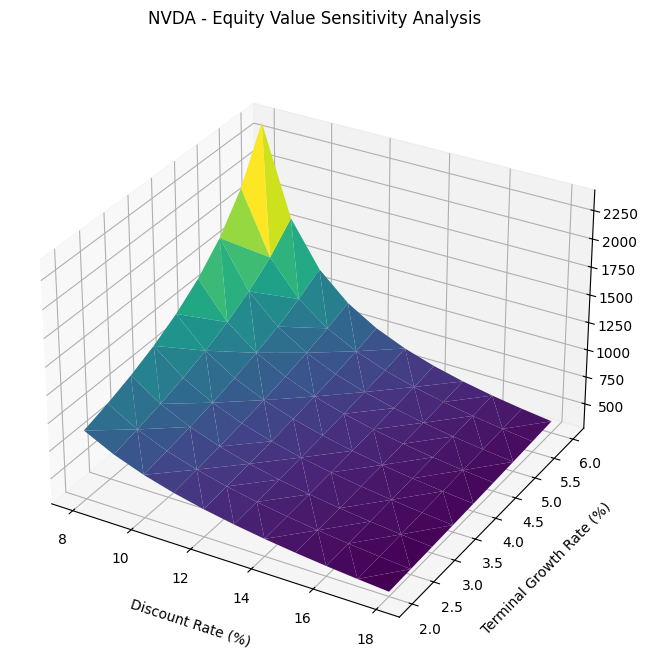


🧾 Explanation:
Rows → Discount Rates (WACC)
Columns → Terminal Growth Rates
Each cell → Equity Value (in Billion USD) under these assumptions



2.0%    2.5%     3.0%     3.5%     4.0%     4.5%     5.0%     5.5%  \
8.0%   895.28  963.06  1044.38  1143.78  1268.02  1427.77  1640.76  1938.96   
9.0%   762.03   809.4   864.67   929.99  1008.37  1104.17  1223.92  1377.88   
10.0%  662.22  696.86   736.44   782.11    835.4   898.38   973.95  1066.31   
11.0%   584.7   610.9   640.38   673.78   711.96   756.01    807.4   868.14   
12.0%  522.78  543.13   565.75   591.03   619.46   651.69   688.52   731.02   
13.0%   472.2  488.36   506.13   525.77    547.6   571.99   599.44   630.54   
14.0%  430.12  443.18   457.42   473.02   490.17   509.14   530.21   553.76   
15.0%  394.59  405.29   416.89   429.49   443.25   458.31   474.88   493.19   
16.0%  364.18  373.07   382.65   392.99   404.19   416.37   429.65    444.2   
17.0%  337.88  345.34   353.34   361.93   371.18   381.18    392.0   403.77   
18.0%  314.91  321.24   327.99    335.2   342.93   351.24   360.18   369.84   

          6.0%  
8.0%   2386.24  
9.0%   1583.17  
10.0%  1181.76  
11.0%   941.02  
12.0%    780.6  
13.0%   666.08  
14.0%   580.25  
15.0%   513.54  
16.0%    460.2  
17.0%    416.6  
18.0%    380.3

In [ ]:
get_sensitivity_analysis('NVDA')

Fetched Free Cash Flow data for ARM:
2025-03-31    158000000.0
2024-03-31    947000000.0
2023-03-31    646000000.0
2022-03-31    383000000.0
2021-03-31            NaN
Name: Free Cash Flow, dtype: float64
Using discount rate: 11.98%


/tmp/ipython-input-914351269.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fcf = fcf.fillna(method='ffill')  # Forward fill NaN values


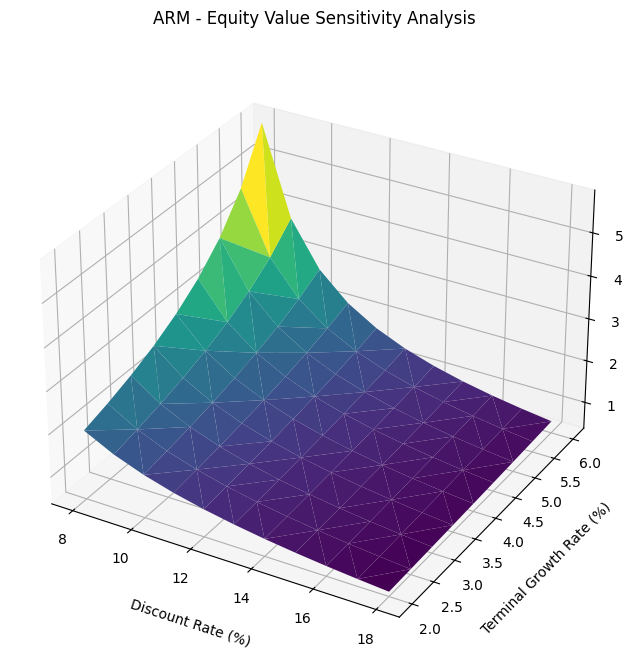


🧾 Explanation:
Rows → Discount Rates (WACC)
Columns → Terminal Growth Rates
Each cell → Equity Value (in Billion USD) under these assumptions



2.0%  2.5%  3.0%  3.5%  4.0%  4.5%  5.0%  5.5%  6.0%
8.0%   1.99  2.17  2.38  2.64  2.96  3.37  3.93   4.7  5.86
9.0%   1.64  1.77  1.91  2.08  2.28  2.53  2.84  3.24  3.78
10.0%  1.39  1.48  1.58   1.7  1.84   2.0  2.19  2.43  2.73
11.0%  1.18  1.25  1.33  1.42  1.51  1.63  1.76  1.92  2.11
12.0%  1.02  1.08  1.13   1.2  1.27  1.36  1.45  1.56  1.69
13.0%  0.89  0.93  0.98  1.03  1.09  1.15  1.22   1.3   1.4
14.0%  0.78  0.82  0.85  0.89  0.94  0.99  1.04   1.1  1.17
15.0%  0.69  0.72  0.75  0.78  0.82  0.86   0.9  0.95   1.0
16.0%  0.61  0.63  0.66  0.69  0.72  0.75  0.78  0.82  0.86
17.0%  0.54  0.56  0.58  0.61  0.63  0.66  0.68  0.71  0.75
18.0%  0.48   0.5  0.52  0.54  0.56  0.58   0.6  0.63  0.65

In [ ]:
get_sensitivity_analysis('ARM')

FCF data not available from Yahoo Finance. Will simulate.
Shares Outstanding: 1059260032
Projected FCF (5 years): [1000 1100 1210 1331 1464]

Base DCF per share: $0.00

Sensitivity Table (DCF per share $):
           2.0%      3.0%      4.0%
9.0%   0.000017  0.000020  0.000023
10.0%  0.000015  0.000017  0.000019
11.0%  0.000013  0.000015  0.000016


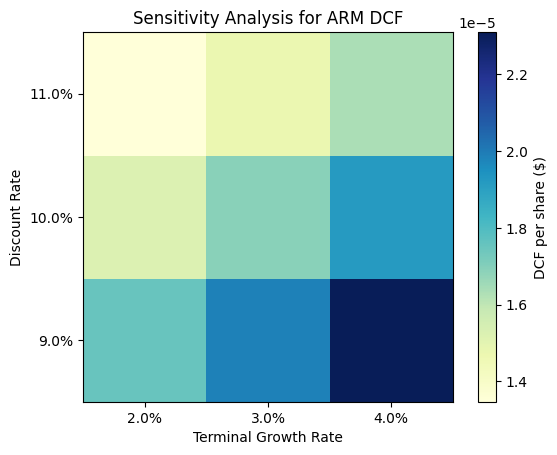

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Step 1: Fetch data
# -----------------------------
ticker = "ARM"  # ARM stock ticker
stock = yf.Ticker(ticker)

# Free Cash Flow
try:
    fcf_data = stock.financials.loc['FreeCashFlow']
    fcf_data = fcf_data[::-1]  # oldest to newest
    print("Free Cash Flow (historical):")
    print(fcf_data)
except KeyError:
    print("FCF data not available from Yahoo Finance. Will simulate.")

# Shares outstanding
shares_outstanding = stock.info.get("sharesOutstanding", 100000000)  # fallback 100M
print(f"Shares Outstanding: {shares_outstanding}")

# -----------------------------
# Step 2: Project FCF using CAGR
# -----------------------------
if 'fcf_data' in locals():
    # Remove negative or NaN FCF
    fcf_data = fcf_data[fcf_data > 0].dropna()
    # Calculate CAGR
    start_value = fcf_data.iloc[0]
    end_value = fcf_data.iloc[-1]
    n = len(fcf_data) - 1
    cagr = (end_value / start_value) ** (1/n) - 1
    print(f"Historical CAGR of FCF: {cagr*100:.2f}%")

    # Project next 5 years
    fcf_proj = [end_value * ((1 + cagr) ** i) for i in range(1, 6)]
else:
    # Simulate if no FCF
    cagr = 0.10
    fcf_proj = [1000, 1100, 1210, 1331, 1464]

fcf_proj = np.array(fcf_proj)
print("Projected FCF (5 years):", fcf_proj)

# -----------------------------
# Step 3: DCF Base Valuation
# -----------------------------
discount_rate = 0.10
terminal_growth = 0.03

pv_fcf = sum(fcf_proj / (1 + discount_rate) ** np.arange(1, len(fcf_proj)+1))
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
pv_terminal = terminal_value / (1 + discount_rate) ** len(fcf_proj)

dcf_value_total = pv_fcf + pv_terminal
dcf_per_share = dcf_value_total / shares_outstanding
print(f"\nBase DCF per share: ${dcf_per_share:.2f}")

# -----------------------------
# Step 4: Sensitivity Analysis
# -----------------------------
discount_rates = [0.09, 0.10, 0.11]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum(fcf_proj / (1 + r) ** np.arange(1, len(fcf_proj)+1))
        terminal_value = fcf_proj[-1] * (1 + g) / (r - g)
        pv_terminal = terminal_value / (1 + r) ** len(fcf_proj)
        values[i, j] = (pv_fcf + pv_terminal) / shares_outstanding

# Sensitivity Table
table = pd.DataFrame(values,
                     index=[f"{r*100:.1f}%" for r in discount_rates],
                     columns=[f"{g*100:.1f}%" for g in terminal_growths])
print("\nSensitivity Table (DCF per share $):")
print(table)

# -----------------------------
# Step 5: Heatmap
# -----------------------------
plt.imshow(values, cmap="YlGnBu", origin="lower")
plt.xticks(range(len(terminal_growths)), table.columns)
plt.yticks(range(len(discount_rates)), table.index)
plt.colorbar(label="DCF per share ($)")
plt.xlabel("Terminal Growth Rate")
plt.ylabel("Discount Rate")
plt.title(f"Sensitivity Analysis for {ticker} DCF")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Step 1: Input projected FCF
fcf_proj = np.array([1000, 1100, 1210, 1331, 1464])  # in millions
shares_outstanding = 100  # in millions

# Step 2: Define discount rate and terminal growth
discount_rate = 0.10
terminal_growth = 0.03

# Step 3: Calculate PV of FCF
pv_fcf = sum(fcf_proj / (1 + discount_rate) ** np.arange(1, len(fcf_proj)+1))

# Step 4: Terminal Value
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
pv_terminal = terminal_value / (1 + discount_rate) ** len(fcf_proj)

# Total DCF and per-share
dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding
print("Base DCF per share:", round(dcf_per_share, 2))

# Step 5: Sensitivity Analysis
discount_rates = [0.09, 0.10, 0.11]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum(fcf_proj / (1 + r) ** np.arange(1, len(fcf_proj)+1))
        tv = fcf_proj[-1] * (1 + g) / (r - g)
        pv_tv = tv / (1 + r) ** len(fcf_proj)
        values[i, j] = (pv_fcf + pv_tv) / shares_outstanding

table = pd.DataFrame(values,
                     index=[f"{r*100:.1f}%" for r in discount_rates],
                     columns=[f"{g*100:.1f}%" for g in terminal_growths])
print("\nSensitivity Table (DCF per share $):")
print(table)


Base DCF per share: 179.21

Sensitivity Table (DCF per share $):
             2.0%        3.0%        4.0%
9.0%   185.367424  210.061103  244.632253
10.0%  161.355099  179.211022  203.018919
11.0%  142.705553  156.099749  173.320859


In [ ]:
# Install required packages if not already installed
# !pip install yfinance pandas numpy

import yfinance as yf
import numpy as np
import pandas as pd

# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "AAPL"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================
# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
debt = total_debt + short_term_debt

# Cash & Cash Equivalents
cash = bs.loc['Cash'][0] if 'Cash' in bs.index else 0

# Effective Tax Rate (approx)
net_income = cf.loc['Net Income'][0] if 'Net Income' in cf.index else 0
tax_expense = bs.loc['Income Tax Payable'][0] if 'Income Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

# Cost of Debt
cost_of_debt = 0.05  # Approx 5%, can be refined based on industry

# Cost of Equity (using CAPM)
risk_free_rate = 0.04  # 10-year treasury yield approx
beta = info.get('beta', 1.0)
market_return = 0.10  # Expected market return 10%
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC (Discount Rate)
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 4: Extract Historical Free Cash Flow (FCF)
# =============================
# Using Operating Cash Flow - CapEx approximation
try:
    o_cash_flow = cf.loc['Total Cash From Operating Activities'][0]
    capex = cf.loc['Capital Expenditures'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback dummy FCF

# Project next 5 years using historical CAGR
historical_fcfs = [fcf]  # can extend using multiple years
growth_rate = 0.08  # assume 8% growth, can be refined
years = 5
fcf_proj = [fcf * ((1+growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF for next 5 years (in USD):")
print(fcf_proj)

# =============================
# Step 5: Terminal Value
# =============================
terminal_growth = 0.03  # assume 3% terminal growth
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

# Discount FCF and Terminal Value
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal

# DCF per share
shares_outstanding = info.get('sharesOutstanding', 1)
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF Value per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 6: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]  # ±2% around WACC
terminal_growths = [0.02, 0.03, 0.04]  # terminal growth variations

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


Calculated WACC (Discount Rate): 10.82%

Projected FCF for next 5 years (in USD):
[1080000000.0, 1166400000.0, 1259712000.0000002, 1360488960.0000002, 1469328076.8000007]

Total DCF Value: $16,210,770,501.52
DCF Value per Share: $1.09

Sensitivity Analysis (DCF per share $):
           2.0%      3.0%      4.0%
8.8%   1.299867  1.477781  1.729527
10.8%  0.997151  1.092341  1.215447
12.8%  0.806799  0.864322  0.934890


/tmp/ipython-input-4166056169.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
/tmp/ipython-input-4166056169.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax_expense = bs.loc['Income Tax Payable'][0] if 'Income Tax Payable' in bs.index else 0


In [ ]:
# Install required packages if not already installed
# !pip install yfinance pandas numpy

import yfinance as yf
import numpy as np
import pandas as pd

# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "NVDA"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================
# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
# total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
# short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
# debt = total_debt + short_term_debt
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0

# Cash & Cash Equivalents
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0

# Effective Tax Rate (approx)
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

# Cost of Debt
cost_of_debt = 0.05  # Approx 5%, can be refined based on industry

# Cost of Equity (using CAPM)
risk_free_rate = 0.04  # 10-year treasury yield approx
beta = info.get('beta', 1.0)
market_return = 0.10  # Expected market return 10%
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC (Discount Rate)
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 4: Extract Historical Free Cash Flow (FCF)
# =============================
# Using Operating Cash Flow - CapEx approximation
try:
    o_cash_flow = cf.loc['Total Cash From Operating Activities'][0]
    capex = cf.loc['Capital Expenditures'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback dummy FCF

# Project next 5 years using historical CAGR
historical_fcfs = [fcf]  # can extend using multiple years
growth_rate = 0.08  # assume 8% growth, can be refined
years = 5
fcf_proj = [fcf * ((1+growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF for next 5 years (in USD):")
print(fcf_proj)

# =============================
# Step 5: Terminal Value
# =============================
terminal_growth = 0.03  # assume 3% terminal growth
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

# Discount FCF and Terminal Value
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal

# DCF per share
shares_outstanding = info.get('sharesOutstanding', 1)
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF Value per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 6: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]  # ±2% around WACC
terminal_growths = [0.02, 0.03, 0.04]  # terminal growth variations

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


Calculated WACC (Discount Rate): 16.85%

Projected FCF for next 5 years (in USD):
[1080000000.0, 1166400000.0, 1259712000.0000002, 1360488960.0000002, 1469328076.8000007]

Total DCF Value: $8,991,479,474.74
DCF Value per Share: $0.37

Sensitivity Analysis (DCF per share $):
           2.0%      3.0%      4.0%
14.8%  0.410608  0.433369  0.460328
16.8%  0.352965  0.368691  0.386865
18.8%  0.309143  0.320457  0.333296


/tmp/ipython-input-2139664985.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0


In [ ]:
# Install required packages if not already installed
# !pip install yfinance pandas numpy

import yfinance as yf
import numpy as np
import pandas as pd

# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "NVDA"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================
# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
# total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
# short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
# debt = total_debt + short_term_debt
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0

# Cash & Cash Equivalents
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0

# Effective Tax Rate (approx)
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

# Cost of Debt
cost_of_debt = 0.05  # Approx 5%, can be refined based on industry

# Cost of Equity (using CAPM)
risk_free_rate = 0.04  # 10-year treasury yield approx
beta = info.get('beta', 1.0)
market_return = 0.10  # Expected market return 10%
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC (Discount Rate)
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 4: Extract Historical Free Cash Flow (FCF)
# =============================
# Using Operating Cash Flow - CapEx approximation
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback dummy FCF

# Project next 5 years using historical CAGR
historical_fcfs = [fcf]  # can extend using multiple years
growth_rate = 0.08  # assume 8% growth, can be refined
years = 5
fcf_proj = [fcf * ((1+growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF for next 5 years (in USD):")
print(fcf_proj)

# =============================
# Step 5: Terminal Value
# =============================
terminal_growth = 0.03  # assume 3% terminal growth
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

# Discount FCF and Terminal Value
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal

# DCF per share
shares_outstanding = info.get('sharesOutstanding', 1)
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF Value per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 6: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]  # ±2% around WACC
terminal_growths = [0.02, 0.03, 0.04]  # terminal growth variations

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


Calculated WACC (Discount Rate): 16.88%

Projected FCF for next 5 years (in USD):
[np.float64(65721240000.00001), np.float64(70978939200.0), np.float64(76657254336.00002), np.float64(82789834682.88002), np.float64(89413021457.51044)]

Total DCF Value: $545,946,319,079.21
DCF Value per Share: $22.39

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%
14.9%  24.926716  26.303753  27.934037
16.9%  21.434192  22.386225  23.486148
18.9%  18.777589  19.462934  20.240427


/tmp/ipython-input-2062053484.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-2062053484.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
/tmp/ipython-input-2062053484.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net 

In [ ]:
# Install required packages if not already installed
# !pip install yfinance pandas numpy

import yfinance as yf
import numpy as np
import pandas as pd

# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "ARM"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================
# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
debt = total_debt + short_term_debt

# Cash & Cash Equivalents
cash = bs.loc['Cash'][0] if 'Cash' in bs.index else 0

# Effective Tax Rate (approx)
net_income = cf.loc['Net Income'][0] if 'Net Income' in cf.index else 0
tax_expense = bs.loc['Income Tax Payable'][0] if 'Income Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

# Cost of Debt
cost_of_debt = 0.05  # Approx 5%, can be refined based on industry

# Cost of Equity (using CAPM)
risk_free_rate = 0.04  # 10-year treasury yield approx
beta = info.get('beta', 1.0)
market_return = 0.10  # Expected market return 10%
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC (Discount Rate)
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 4: Extract Historical Free Cash Flow (FCF)
# =============================
# Using Operating Cash Flow - CapEx approximation
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback dummy FCF

# Project next 5 years using historical CAGR
historical_fcfs = [fcf]  # can extend using multiple years
growth_rate = 0.08  # assume 8% growth, can be refined
years = 5
fcf_proj = [fcf * ((1+growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF for next 5 years (in USD):")
print(fcf_proj)

# =============================
# Step 5: Terminal Value
# =============================
terminal_growth = 0.03  # assume 3% terminal growth
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

# Discount FCF and Terminal Value
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal

# DCF per share
shares_outstanding = info.get('sharesOutstanding', 1)
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF Value per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 6: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]  # ±2% around WACC
terminal_growths = [0.02, 0.03, 0.04]  # terminal growth variations

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


Calculated WACC (Discount Rate): 10.00%

Projected FCF for next 5 years (in USD):
[1080000000.0, 1166400000.0, 1259712000.0000002, 1360488960.0000002, 1469328076.8000007]

Total DCF Value: $18,158,184,042.85
DCF Value per Share: $17.14

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%
8.0%   20.769216  24.167815  29.265713
10.0%  15.450496  17.142329  19.398106
12.0%  12.266329  13.245822  14.470189


In [ ]:
ticker = "NVDA"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

In [ ]:
print(bs)

                                                    2025-01-31    2024-01-31  \
Treasury Shares Number                                     NaN           NaN   
Ordinary Shares Number                            2.447700e+10  2.464000e+10   
Share Issued                                      2.447700e+10  2.464000e+10   
Net Debt                                                   NaN  2.429000e+09   
Total Debt                                        1.027000e+10  1.105600e+10   
...                                                        ...           ...   
Allowance For Doubtful Accounts Receivable                 NaN           NaN   
Gross Accounts Receivable                                  NaN           NaN   
Cash Cash Equivalents And Short Term Investments  4.321000e+10  2.598400e+10   
Other Short Term Investments                      3.462100e+10  1.870400e+10   
Cash And Cash Equivalents                         8.589000e+09  7.280000e+09   

                                       

In [ ]:
print(cf)

                                                  2025-01-31    2024-01-31  \
Free Cash Flow                                  6.085300e+10  2.702100e+10   
Repurchase Of Capital Stock                    -3.370600e+10 -9.533000e+09   
Repayment Of Debt                              -1.250000e+09 -1.250000e+09   
Issuance Of Debt                                         NaN  0.000000e+00   
Capital Expenditure                            -3.236000e+09 -1.069000e+09   
Interest Paid Supplemental Data                 2.460000e+08  2.520000e+08   
Income Tax Paid Supplemental Data               1.511800e+10  6.549000e+09   
End Cash Position                               8.589000e+09  7.280000e+09   
Beginning Cash Position                         7.280000e+09  3.389000e+09   
Changes In Cash                                 1.309000e+09  3.891000e+09   
Financing Cash Flow                            -4.235900e+10 -1.363300e+10   
Cash Flow From Continuing Financing Activities -4.235900e+10 -1.

In [ ]:
print(info)

{'address1': '2788 San Tomas Expressway', 'city': 'Santa Clara', 'state': 'CA', 'zip': '95051', 'country': 'United States', 'phone': '408 486 2000', 'website': 'https://www.nvidia.com', 'industry': 'Semiconductors', 'industryKey': 'semiconductors', 'industryDisp': 'Semiconductors', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': "NVIDIA Corporation, a computing infrastructure company, provides graphics and compute and networking solutions in the United States, Singapore, Taiwan, China, Hong Kong, and internationally. The Compute & Networking segment includes its Data Centre accelerated computing platforms and artificial intelligence solutions and software; networking; automotive platforms and autonomous and electric vehicle solutions; Jetson for robotics and other embedded platforms; and DGX Cloud computing services. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infra

In [ ]:
bs.columns

DatetimeIndex(['2025-01-31', '2024-01-31', '2023-01-31', '2022-01-31',
               '2021-01-31'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
bs.T.columns

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Net Debt', 'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Treasury Stock', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Preferred Stock', 'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Employee Benefits',
       'Tradeand Other Payables Non Current',
       'Non Current Deferred Liabilities', 'Non Current Deferred Revenue',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease 

In [ ]:
cf.columns

DatetimeIndex(['2025-01-31', '2024-01-31', '2023-01-31', '2022-01-31',
               '2021-01-31'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
cf.T.columns

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Proceeds From Stock Option Exercised',
       'Cash Dividends Paid', 'Common Stock Dividend Paid',
       'Net Common Stock Issuance', 'Common Stock Payments',
       'Net Issuance Payments Of Debt', 'Net Long Term Debt Issuance',
       'Long Term Debt Payments', 'Long Term Debt Issuance',
       'Investing Cash Flow', 'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purchase Of Business',
       'Net PPE Purchase And Sale',

In [ ]:
beta = info.get('beta', 1.0)

In [ ]:
beta

2.145

In [ ]:
# total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
# short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0

/tmp/ipython-input-2646245915.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0


In [ ]:
debt

np.float64(10270000000.0)

In [ ]:
short_term_debt

0

In [ ]:
bs.loc['Net Debt']

2025-01-31             NaN
2024-01-31    2.429000e+09
2023-01-31    7.564000e+09
2022-01-31    8.956000e+09
2021-01-31    6.116000e+09
Name: Net Debt, dtype: float64

In [ ]:
bs.loc['Total Debt'][0]

/tmp/ipython-input-2408290106.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bs.loc['Total Debt'][0]


np.float64(10270000000.0)

In [ ]:
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0

# Effective Tax Rate (approx)
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

/tmp/ipython-input-4095131292.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
/tmp/ipython-input-4095131292.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
/tmp/ipython-input-4095131292.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by 

In [ ]:
cash

np.float64(8589000000.0)

In [ ]:
net_income

np.float64(72880000000.0)

In [ ]:
tax_expense

np.float64(881000000.0)

In [ ]:
tax_rate

np.float64(0.012088364434687157)

In [ ]:
market_cap = info.get('marketCap', None)

In [ ]:
market_cap

4439031152640

In [ ]:
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

Calculated WACC (Discount Rate): 10.01%


In [ ]:
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback dummy FCF

/tmp/ipython-input-3052939435.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
/tmp/ipython-input-3052939435.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capex = cf.loc['Capital Expenditure'][0]


In [ ]:
fcf

np.float64(60853000000.0)

In [ ]:
o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]

/tmp/ipython-input-2129707771.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]


In [ ]:
o_cash_flow

np.float64(64089000000.0)

In [ ]:
capex = cf.loc['Capital Expenditure'][0]

/tmp/ipython-input-3715579444.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  capex = cf.loc['Capital Expenditure'][0]


In [ ]:
capex

np.float64(-3236000000.0)

In [ ]:
fcf = cf.loc['Free Cash Flow'][0]

/tmp/ipython-input-2847454429.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fcf = cf.loc['Free Cash Flow'][0]


In [ ]:
fcf

np.float64(60853000000.0)

In [ ]:
capex = o_cash_flow -fcf

In [ ]:
capex

np.float64(3236000000.0)

In [ ]:
# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "NVDA"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================
# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
# total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
# short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
# debt = total_debt + short_term_debt
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0

# Cash & Cash Equivalents
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0

# Effective Tax Rate (approx)
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

# Cost of Debt
cost_of_debt = 0.05  # Approx 5%, can be refined based on industry

# Cost of Equity (using CAPM)
risk_free_rate = 0.04  # 10-year treasury yield approx
beta = info.get('beta', 1.0)
market_return = 0.10  # Expected market return 10%
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC (Discount Rate)
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

Calculated WACC (Discount Rate): 16.88%


/tmp/ipython-input-2336367055.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-2336367055.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
/tmp/ipython-input-2336367055.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net 

In [ ]:
# =============================
# Step 0: Install packages (if not already installed)
# =============================
# !pip install yfinance pandas numpy

import yfinance as yf
import numpy as np
import pandas as pd

# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "NVDA"  # Example: Change to any company
company = yf.Ticker(ticker)

# Fetch balance sheet, cashflow, and company info
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================

# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0

# Cash & Cash Equivalents
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0

# Effective Tax Rate
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%

# Cost of Debt (using interest rate approximation)
# If interest expense is available, cost_of_debt = interest_expense / total_debt
interest_expense = cf.loc['Interest Expense'][0] if 'Interest Expense' in cf.index else 0
cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05  # fallback 5%

# Cost of Equity using CAPM
# Risk-free rate (current 10Y Treasury yield, approx 4%)
risk_free_rate = 0.04

# Beta from Yahoo Finance
beta = info.get('beta', 1.0)

# Expected market return (historical average ~10%)
market_return = 0.10

# Cost of Equity
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt

WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 4: Extract Historical Free Cash Flow (FCF)
# =============================
try:
    o_cash_flow = cf.loc['Total Cash From Operating Activities'][0]
    capex = cf.loc['Capital Expenditures'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback

# Project next 5 years using assumed CAGR
growth_rate = 0.08  # 8% growth assumption
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF for next 5 years (in USD):")
print(fcf_proj)

# =============================
# Step 5: Terminal Value
# =============================
terminal_growth = 0.03  # 3% terminal growth
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

# Present value of projected FCF
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

# Total DCF
dcf_total = pv_fcf + pv_terminal

# DCF per share
shares_outstanding = info.get('sharesOutstanding', 1)
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF Value per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 6: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]  # ±2% around WACC
terminal_growths = [0.02, 0.03, 0.04]  # terminal growth variations

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


Calculated WACC (Discount Rate): 16.86%

Projected FCF for next 5 years (in USD):
[1080000000.0, 1166400000.0, 1259712000.0000002, 1360488960.0000002, 1469328076.8000007]

Total DCF Value: $8,979,231,337.12
DCF Value per Share: $0.37

Sensitivity Analysis (DCF per share $):
           2.0%      3.0%      4.0%
14.9%  0.410001  0.432681  0.459536
16.9%  0.352513  0.368188  0.386301
18.9%  0.308793  0.320075  0.332875


/tmp/ipython-input-2021467455.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-2021467455.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
/tmp/ipython-input-2021467455.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net 

In [ ]:
pip install fredapi

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "NVDA"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-536206720.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-536206720.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.85%
Company Beta: 2.145
Cost of Equity: 25.06%
Cost of Debt: 2.40%
WACC (Discount Rate): 25.05%

Projected FCF (next 5 years, USD):
[np.float64(65721240000.00001), np.float64(70978939200.0), np.float64(76657254336.00002), np.float64(82789834682.88002), np.float64(89413021457.51044)]

Total DCF Value: $336,799,546,516.11
DCF per Share: $13.81

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%
23.1%  14.875773  15.254585  15.673164
25.1%  13.515354  13.810278  14.133222
27.1%  12.375983  12.609495  12.863268


/tmp/ipython-input-536206720.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-536206720.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
/tmp/ipython-input-536206720.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_incom

In [ ]:
# Install required packages if not already installed
# !pip install yfinance pandas numpy

import yfinance as yf
import numpy as np
import pandas as pd

# =============================
# Step 1: Input Ticker and Fetch Data
# =============================
ticker = "ARM"  # Example: Apple, you can change

# Fetch company data
company = yf.Ticker(ticker)

# Fetch balance sheet and financials
bs = company.balance_sheet
cf = company.cashflow
info = company.info

# =============================
# Step 2: Extract Financial Parameters
# =============================
# Market Cap (Equity value)
market_cap = info.get('marketCap', None)

# Total Debt (Long Term + Short Term)
# total_debt = bs.loc['Long Term Debt'][0] if 'Long Term Debt' in bs.index else 0
# short_term_debt = bs.loc['Short/Current Long Term Debt'][0] if 'Short/Current Long Term Debt' in bs.index else 0
# debt = total_debt + short_term_debt
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0

# Cash & Cash Equivalents
# cash = bs.loc['Cash'][0] if 'Cash' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0

# Effective Tax Rate (approx)
# net_income = cf.loc['Net Income'][0] if 'Net Income' in cf.index else 0
# tax_expense = bs.loc['Income Tax Payable'][0] if 'Income Tax Payable' in bs.index else 0
# tax_rate = tax_expense / net_income if net_income != 0 else 0.21  # fallback 21%
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income

# Cost of Debt
cost_of_debt = 0.05  # Approx 5%, can be refined based on industry

# Cost of Equity (using CAPM)
risk_free_rate = 0.04  # 10-year treasury yield approx
beta = info.get('beta', 1.0)
market_return = 0.10  # Expected market return 10%
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)

# =============================
# Step 3: Calculate WACC (Discount Rate)
# =============================
V = market_cap + debt - cash  # Enterprise Value
E = market_cap
D = debt
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"Calculated WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 4: Extract Historical Free Cash Flow (FCF)
# =============================
# Using Operating Cash Flow - CapEx approximation
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex  # CapEx is negative in Yahoo Finance
except:
    fcf = 1_000_000_000  # fallback dummy FCF

# Project next 5 years using historical CAGR
historical_fcfs = [fcf]  # can extend using multiple years
growth_rate = 0.08  # assume 8% growth, can be refined
years = 5
fcf_proj = [fcf * ((1+growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF for next 5 years (in USD):")
print(fcf_proj)

# =============================
# Step 5: Terminal Value
# =============================
terminal_growth = 0.03  # assume 3% terminal growth
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

# Discount FCF and Terminal Value
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal

# DCF per share
shares_outstanding = info.get('sharesOutstanding', 1)
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF Value per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 6: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]  # ±2% around WACC
terminal_growths = [0.02, 0.03, 0.04]  # terminal growth variations

values = np.zeros((len(discount_rates), len(terminal_growths)))

for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


Calculated WACC (Discount Rate): 10.12%

Projected FCF for next 5 years (in USD):
[np.float64(170640000.0), np.float64(184291200.00000003), np.float64(199034496.00000003), np.float64(214957255.68000004), np.float64(232153836.1344001)]

Total DCF Value: $2,817,612,788.46
DCF Value per Share: $2.66

Sensitivity Analysis (DCF per share $):
           2.0%      3.0%      4.0%
8.1%   3.213069  3.723961  4.482580
10.1%  2.402547  2.659982  3.001482
12.1%  1.913339  2.063436  2.250482


/tmp/ipython-input-1332559349.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-1332559349.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
/tmp/ipython-input-1332559349.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net 

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "ARM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][3] if 'Interest Paid Supplemental Data' in cf.index else 0
cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-3238075779.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-3238075779.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.85%
Company Beta: 1.0
Cost of Equity: 13.85%
Cost of Debt: 0.28%
WACC (Discount Rate): 14.01%

Projected FCF (next 5 years, USD):
[np.float64(170640000.0), np.float64(184291200.00000003), np.float64(199034496.00000003), np.float64(214957255.68000004), np.float64(232153836.1344001)]

Total DCF Value: $1,800,742,850.90
DCF per Share: $1.70

Sensitivity Analysis (DCF per share $):
           2.0%      3.0%      4.0%
12.0%  1.935775  2.090097  2.282945
14.0%  1.601931  1.700001  1.817662
16.0%  1.364053  1.430421  1.507840


/tmp/ipython-input-3238075779.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-3238075779.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][3] if 'Interest Paid Supplemental Data' in cf.index else 0
/tmp/ipython-input-3238075779.py:85: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_in

In [ ]:
bs

2025-03-31    2024-03-31  \
Ordinary Shares Number                            1.056514e+09  1.040330e+09   
Share Issued                                      1.056514e+09  1.040330e+09   
Total Debt                                        3.560000e+08  2.260000e+08   
Tangible Book Value                               5.068000e+09  3.518000e+09   
Invested Capital                                  6.839000e+09  5.295000e+09   
...                                                        ...           ...   
Allowance For Doubtful Accounts Receivable       -2.000000e+07 -3.000000e+06   
Gross Accounts Receivable                         1.127000e+09  7.840000e+08   
Cash Cash Equivalents And Short Term Investments  2.825000e+09  2.923000e+09   
Other Short Term Investments                      7.400000e+08  1.000000e+09   
Cash And Cash Equivalents                         2.085000e+09  1.923000e+09   

                                                    2023-03-31    2022-03-31  
Ordinary Shares Number                            1.025234e+09  1.026055e+09  
Share Issued                                      1.025234e+09  1.026055e+09  
Total Debt                                        2.210000e+08  2.610000e+08  
Tangible Book Value                               2.293000e+09  1.707000e+09  
Invested Capital                                  4.051000e+09  3.548000e+09  
...                                                        ...           ...  
Allowance For Doubtful Accounts Receivable       -3.000000e+06 -4.000000e+07  
Gross Accounts Receivable                         1.002000e+09  1.164000e+09  
Cash Cash Equivalents And Short Term Investments  2.215000e+09  1.635000e+09  
Other Short Term Investments                      6.610000e+08  6.310000e+08  
Cash And Cash Equivalents                         1.554000e+09  1.004000e+09  

[77 rows x 4 columns]

In [ ]:
cf

2025-03-31    2024-03-31  \
Free Cash Flow                                  1.580000e+08  9.470000e+08   
Issuance Of Debt                                         NaN  0.000000e+00   
Capital Expenditure                            -2.390000e+08 -1.430000e+08   
Interest Paid Supplemental Data                          NaN  0.000000e+00   
Income Tax Paid Supplemental Data               1.490000e+08  1.870000e+08   
End Cash Position                               2.085000e+09  1.923000e+09   
Beginning Cash Position                         1.923000e+09  1.554000e+09   
Effect Of Exchange Rate Changes                 2.000000e+06  3.000000e+06   
Changes In Cash                                 1.600000e+08  3.660000e+08   
Financing Cash Flow                            -2.020000e+08 -2.080000e+08   
Cash Flow From Continuing Financing Activities -2.020000e+08 -2.080000e+08   
Net Other Financing Charges                    -2.020000e+08 -2.080000e+08   
Cash Dividends Paid                                      NaN           NaN   
Net Issuance Payments Of Debt                            NaN  0.000000e+00   
Net Short Term Debt Issuance                             NaN  0.000000e+00   
Short Term Debt Issuance                                 NaN  0.000000e+00   
Investing Cash Flow                            -3.500000e+07 -5.160000e+08   
Cash Flow From Continuing Investing Activities -3.500000e+07 -5.160000e+08   
Net Other Investing Changes                     1.000000e+06 -1.000000e+06   
Net Investment Purchase And Sale                2.600000e+08 -3.400000e+08   
Sale Of Investment                              9.400000e+08  4.250000e+08   
Purchase Of Investment                         -6.800000e+08 -7.650000e+08   
Net Business Purchase And Sale                 -5.700000e+07 -3.200000e+07   
Purchase Of Business                           -5.700000e+07 -3.200000e+07   
Net Intangibles Purchase And Sale              -2.000000e+07 -5.100000e+07   
Purchase Of Intangibles                        -2.000000e+07 -5.100000e+07   
Net PPE Purchase And Sale                      -2.190000e+08 -9.200000e+07   
Purchase Of PPE                                -2.190000e+08 -9.200000e+07   
Operating Cash Flow                             3.970000e+08  1.090000e+09   
Cash Flow From Continuing Operating Activities  3.970000e+08  1.090000e+09   
Change In Working Capital                      -1.465000e+09 -1.950000e+08   
Change In Other Working Capital                -4.000000e+06 -1.900000e+08   
Change In Other Current Liabilities            -4.200000e+08  4.670000e+08   
Change In Payables And Accrued Expense         -1.580000e+08 -3.220000e+08   
Change In Accrued Expense                      -1.520000e+08 -2.920000e+08   
Change In Payable                              -6.000000e+06 -3.000000e+07   
Change In Tax Payable                          -6.000000e+06 -3.000000e+07   
Change In Income Tax Payable                   -6.000000e+06 -3.000000e+07   
Change In Prepaid Assets                       -1.400000e+08 -6.100000e+07   
Change In Receivables                          -7.430000e+08 -8.900000e+07   
Changes In Account Receivables                 -3.310000e+08  2.180000e+08   
Other Non Cash Items                            4.800000e+07  3.300000e+07   
Stock Based Compensation                        8.200000e+08  1.037000e+09   
Asset Impairment Charge                                  NaN  0.000000e+00   
Deferred Tax                                   -2.180000e+08 -2.730000e+08   
Deferred Income Tax                            -2.180000e+08 -2.730000e+08   
Depreciation Amortization Depletion             1.830000e+08  1.620000e+08   
Depreciation And Amortization                   1.830000e+08  1.620000e+08   
Amortization Cash Flow                          8.700000e+07  8.600000e+07   
Amortization Of Intangibles                     8.700000e+07  8.600000e+07   
Depreciation                                    9.590000e+07  7.600000e+

In [ ]:
info

{'address1': '110 Fulbourn Road',
 'city': 'Cambridge',
 'zip': 'CB1 9NJ',
 'country': 'United Kingdom',
 'phone': '44 1223 400 400',
 'website': 'https://www.arm.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Arm Holdings plc architects, develops, and licenses central processing unit products and related technologies for semiconductor companies and original equipment manufacturers. The company is involved in the licensing, marketing, research, and development of microprocessors, systems intellectual property (IPs), graphics processing units, physical IP and associated systems IPs, software, tools, and other related services. It also offers arm central processing units, accelerators, system IP products, and compute platform products, as well as development tools and software. The company's products are used in various mark

In [ ]:
cf.T.columns

Index(['Free Cash Flow', 'Issuance Of Debt', 'Capital Expenditure',
       'Interest Paid Supplemental Data', 'Income Tax Paid Supplemental Data',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Short Term Debt Issuance', 'Investing Cash Flow',
       'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net Investment Purchase And Sale',
       'Sale Of Investment', 'Purchase Of Investment',
       'Net Business Purchase And Sale', 'Purchase Of Business',
       'Net Intangibles Purchase And Sale', 'Purchase Of Intangibles',
       'Net PPE Purchase And Sale', 'Purchase Of PPE', 'Operating Cash Flow',
       'Cash Flow From Continuing Operating Activities',
       'C

In [ ]:
interest_expense = cf.loc['Interest Expense'][0] if 'Interest Expense' in cf.index else 0

In [ ]:
interest_expense

0

In [ ]:
cf.loc['Interest Expense'][0]

KeyError: 'Interest Expense'

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "NVDA"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
# cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
# cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

# WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-2971304858.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-2971304858.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.78%
Company Beta: 2.145
Cost of Equity: 9.30%
Cost of Debt: 4.50%
WACC (Discount Rate): 9.30%

Projected FCF (next 5 years, USD):
[np.float64(65721240000.00001), np.float64(70978939200.0), np.float64(76657254336.00002), np.float64(82789834682.88002), np.float64(89413021457.51044)]

Total DCF Value: $1,230,702,061,658.83
DCF per Share: $50.46

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%
7.3%   62.331176  74.467537  93.959268
9.3%   44.878425  50.464254  58.157943
11.3%  34.952993  38.048202  41.991413


/tmp/ipython-input-2971304858.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-2971304858.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
/tmp/ipython-input-2971304858.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_in


Sensitivity Analysis (DCF per share $):
            2.0%       2.5%       3.0%       3.5%        4.0%        4.5%  \
7.0%   66.156895  72.372509  80.142028  90.131408  103.450582  122.097426   
8.0%   54.895356  58.978481  63.878232  69.866816   77.352547   86.977057   
9.0%   46.858736  49.712935  53.042834  56.978170   61.700573   67.472398   
10.0%  40.837387  42.924182  45.309090  48.060907   51.271360   55.065532   
11.0%  36.159298  37.737812  39.513640  41.526245   43.826365   46.480349   
12.0%  32.421276  33.647602  35.010187  36.533076   38.246326   40.188009   
13.0%  29.366753  30.340186  31.410962  32.594451   33.909440   35.379132   
14.0%  26.824695  27.611203  28.469212  29.408936   30.442633   31.585139   
15.0%  24.676700  25.321696  26.020442  26.779948   27.608500   28.515962   

             5.0%  
7.0%   150.067692  
8.0%    99.809738  
9.0%    74.687180  
10.0%   59.618539  
11.0%   49.576665  
12.0%   42.407075  
13.0%   37.032536  
14.0%   32.854591  
15.0%   

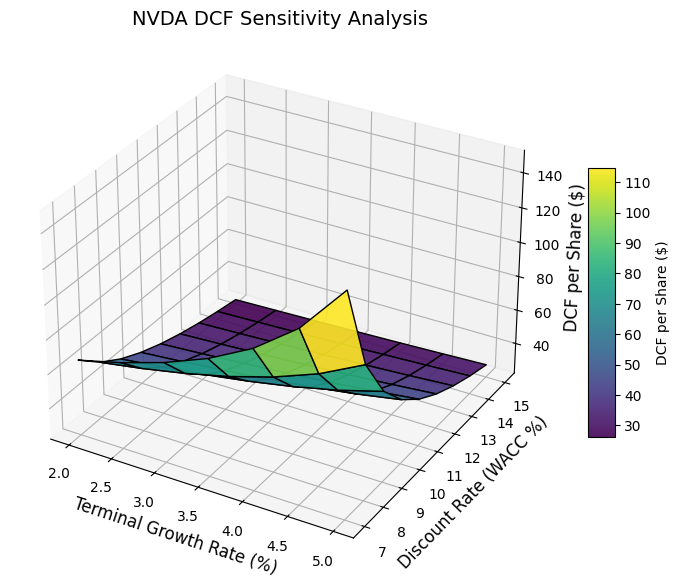

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# =============================
# Step 11: Sensitivity Analysis (Modified)
# =============================
# Discount rates: 7% to 15% (step 1%)
discount_rates = np.arange(0.07, 0.16, 0.01)
# Terminal growth: 2% to 5% (step 0.5%)
terminal_growths = np.arange(0.02, 0.051, 0.005)

# Prepare empty array
values = np.zeros((len(discount_rates), len(terminal_growths)))

# Compute DCF per share for each combination
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

# Create DataFrame for display
sensitivity_table = pd.DataFrame(
    values,
    index=[f"{r*100:.1f}%" for r in discount_rates],
    columns=[f"{g*100:.1f}%" for g in terminal_growths]
)

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)

# =============================
# 3D Surface Plot
# =============================
X, Y = np.meshgrid(terminal_growths*100, discount_rates*100)  # % for axis
Z = values

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)

# Labels
ax.set_xlabel('Terminal Growth Rate (%)', fontsize=12)
ax.set_ylabel('Discount Rate (WACC %) ', fontsize=12)
ax.set_zlabel('DCF per Share ($)', fontsize=12)
ax.set_title(f"{ticker} DCF Sensitivity Analysis", fontsize=14)

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label='DCF per Share ($)')

plt.show()


In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "ARM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
# cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity = 0.083
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
# cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
cost_of_debt = 0.05
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

# WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
WACC = 0.083
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.05,WACC - 0.04,WACC - 0.03, WACC, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-1727276602.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-1727276602.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.50%
Company Beta: 1.0
Cost of Equity: 8.30%
Cost of Debt: 5.00%
WACC (Discount Rate): 8.30%

Projected FCF (next 5 years, USD):
[np.float64(170640000.0), np.float64(184291200.00000003), np.float64(199034496.00000003), np.float64(214957255.68000004), np.float64(232153836.1344001)]

Total DCF Value: $3,811,731,486.63
DCF per Share: $3.60

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%
3.3%   15.473357  64.825656 -26.828613
4.3%    8.703550  14.897460  62.384099
5.3%    6.037774   8.386423  14.348376
8.3%    3.121348   3.598485   4.297546
10.3%   2.350174   2.594557   2.916521


/tmp/ipython-input-1727276602.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-1727276602.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
/tmp/ipython-input-1727276602.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_in

/tmp/ipython-input-2664306646.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  tv = fcf_proj[-1]*(1+g)/(r-g)



Sensitivity Analysis (DCF per share $):
           2.0%       2.5%          3.0%       3.5%          4.0%       4.5%  \
2.0%        inf -39.805411 -1.955786e+01 -12.808671 -9.434078e+00  -7.409323   
3.0%  20.145272  39.617891 -5.612600e+16 -38.272587 -1.879997e+01 -12.309094   
4.0%  10.023465  13.145866  1.939067e+01  38.125073 -1.349956e+16 -36.812550   
5.0%   6.650777   7.852833  9.655918e+00  12.661059  1.867134e+01  36.702186   
6.0%   4.965323   5.585324  6.411990e+00   7.569324  9.305324e+00  12.198658   
7.0%   3.954729   4.326286  4.790732e+00   5.387878  6.184072e+00   7.298743   
8.0%   3.281536   3.525617  3.818515e+00   4.176500  4.623983e+00   5.199317   
9.0%   2.801123   2.971741  3.170796e+00   3.406043  3.688339e+00   4.033367   

              5.0%  
2.0% -6.059486e+00  
3.0% -9.063658e+00  
4.0% -1.807814e+01  
5.0% -2.598519e+16  
6.0%  1.798533e+01  
7.0%  8.970751e+00  
8.0%  5.966429e+00  
9.0%  4.464652e+00  


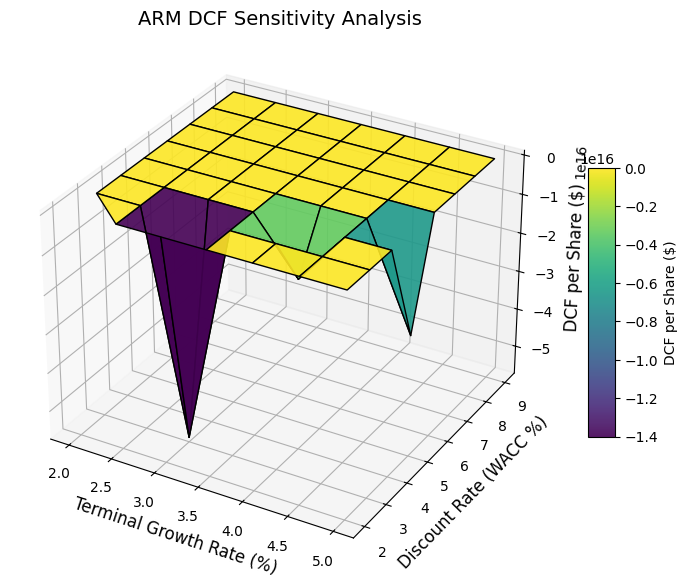

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# =============================
# Step 11: Sensitivity Analysis (Modified)
# =============================
# Discount rates: 7% to 15% (step 1%)
discount_rates = np.arange(0.02, 0.1, 0.01)
# Terminal growth: 2% to 5% (step 0.5%)
terminal_growths = np.arange(0.02, 0.051, 0.005)

# Prepare empty array
values = np.zeros((len(discount_rates), len(terminal_growths)))

# Compute DCF per share for each combination
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

# Create DataFrame for display
sensitivity_table = pd.DataFrame(
    values,
    index=[f"{r*100:.1f}%" for r in discount_rates],
    columns=[f"{g*100:.1f}%" for g in terminal_growths]
)

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)

# =============================
# 3D Surface Plot
# =============================
X, Y = np.meshgrid(terminal_growths*100, discount_rates*100)  # % for axis
Z = values

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)

# Labels
ax.set_xlabel('Terminal Growth Rate (%)', fontsize=12)
ax.set_ylabel('Discount Rate (WACC %) ', fontsize=12)
ax.set_zlabel('DCF per Share ($)', fontsize=12)
ax.set_title(f"{ticker} DCF Sensitivity Analysis", fontsize=14)

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label='DCF per Share ($)')

plt.show()


In [ ]:
!pip install yfinance pandas numpy fredapi

In [ ]:


# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "QCOM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
# cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity = 0.13
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
# cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

# WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
WACC = 0.13
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.09  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.02, WACC, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-813131754.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-813131754.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.78%
Company Beta: 1.228
Cost of Equity: 13.00%
Cost of Debt: 4.50%
WACC (Discount Rate): 13.00%

Projected FCF (next 5 years, USD):
[np.float64(12264680000.0), np.float64(13368501200.000002), np.float64(14571666308.000002), np.float64(15883116275.720005), np.float64(17312596740.534805)]

Total DCF Value: $147,344,902,914.04
DCF per Share: $136.56

Sensitivity Analysis (DCF per share $):
             2.0%        3.0%        4.0%
11.0%  157.304666  171.984337  190.858200
13.0%  127.610788  136.556899  147.491035
15.0%  107.116158  112.996801  119.946651


/tmp/ipython-input-813131754.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-813131754.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
/tmp/ipython-input-813131754.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax


Sensitivity Analysis (DCF per share $):
             2.0%        2.5%        3.0%        3.5%        4.0%        4.5%  \
7.0%   288.512310  315.713827  349.715723  393.432446  451.721410  533.325960   
8.0%   239.246943  257.116007  278.558883  304.766842  337.526791  379.646726   
9.0%   204.094255  216.585144  231.157849  248.380135  269.046879  294.306233   
10.0%  177.760466  186.892947  197.330067  209.372899  223.422869  240.027379   
11.0%  157.304666  164.212746  171.984337  180.792140  190.858200  202.472885   
12.0%  140.962372  146.329168  152.292274  158.956922  166.454651  174.952077   
13.0%  127.610788  131.870841  136.556899  141.736227  147.491035  153.922879   
14.0%  116.501430  119.943441  123.698362  127.810895  132.334681  137.334655   
15.0%  107.116158  109.938867  112.996801  116.320642  119.946651  123.917994   

             5.0%  
7.0%   655.732784  
8.0%   435.806639  
9.0%   325.880426  
10.0%  259.952791  
11.0%  216.023351  
12.0%  184.663421  
13.0%  1

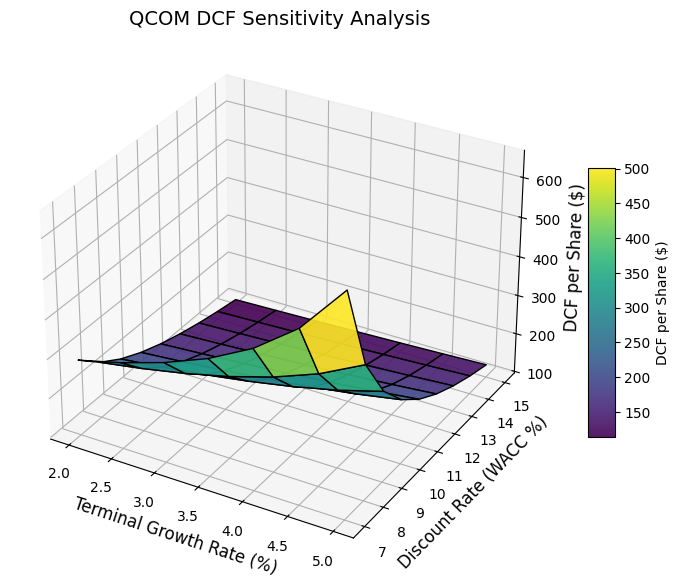

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# =============================
# Step 11: Sensitivity Analysis (Modified)
# =============================
# Discount rates: 7% to 15% (step 1%)
discount_rates = np.arange(0.07, 0.16, 0.01)
# Terminal growth: 2% to 5% (step 0.5%)
terminal_growths = np.arange(0.02, 0.051, 0.005)

# Prepare empty array
values = np.zeros((len(discount_rates), len(terminal_growths)))

# Compute DCF per share for each combination
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

# Create DataFrame for display
sensitivity_table = pd.DataFrame(
    values,
    index=[f"{r*100:.1f}%" for r in discount_rates],
    columns=[f"{g*100:.1f}%" for g in terminal_growths]
)

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)

# =============================
# 3D Surface Plot
# =============================
X, Y = np.meshgrid(terminal_growths*100, discount_rates*100)  # % for axis
Z = values

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)

# Labels
ax.set_xlabel('Terminal Growth Rate (%)', fontsize=12)
ax.set_ylabel('Discount Rate (WACC %) ', fontsize=12)
ax.set_zlabel('DCF per Share ($)', fontsize=12)
ax.set_title(f"{ticker} DCF Sensitivity Analysis", fontsize=14)

# Color bar
fig.colorbar(surf, shrink=0.5, aspect=10, label='DCF per Share ($)')

plt.show()


In [ ]:
# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "ARM.L"  # ARM Holdings LSE ticker
sp500_ticker = "^GSPC"  # S&P 500 index (for market return)

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
info = company.info

# Safely fetch market_cap, use fallback if None
market_cap = info.get('marketCap', None)
if market_cap is None:
    print("Market cap not available from Yahoo Finance. Using fallback value.")
    market_cap = 50_000_000_000  # Example: 50B USD, replace with correct estimate

# Safely fetch shares outstanding
shares_outstanding = info.get('sharesOutstanding', 1)
if shares_outstanding is None:
    shares_outstanding = 1_000_000_000  # Example fallback, adjust as needed

# ARM may not have balance_sheet & cashflow for LSE ticker
try:
    bs = company.balance_sheet
    cf = company.cashflow
    debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
    cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
    interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    print("Balance sheet / cashflow not available. Using estimated values for ARM.")
    debt = 500_000_000      # 500M USD
    cash = 200_000_000      # 200M USD
    interest_expense = 20_000_000
    fcf = 300_000_000       # 300M USD


# =============================
# Step 3: Fetch Risk-Free Rate
# =============================
ten_yield_series = fred.get_series_latest_release('DGS10')  # 10Y US Treasury
ten_yield = ten_yield_series.values[0]
risk_free_rate = ten_yield / 100
print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")

# =============================
# Step 4: Market Return (S&P 500 5Y CAGR)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']
market_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Cost of Equity (CAPM)
# =============================
cost_of_equity = risk_free_rate + beta*(market_return - risk_free_rate)
print(f"Company Beta: {beta}")
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 6: Cost of Debt
# =============================
cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 7: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

tax_rate = 0.21  # Approximate UK corporate tax
WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 8: FCF Projection
# =============================
growth_rate = 0.08  # Assumed 8% FCF growth
years = 5
fcf_proj = [fcf*((1+growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 9: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1]*(1+terminal_growth)/(WACC - terminal_growth)
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")


Market cap not available from Yahoo Finance. Using fallback value.
Balance sheet / cashflow not available. Using estimated values for ARM.
Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.78%
Company Beta: 1.0
Cost of Equity: 13.78%
Cost of Debt: 4.00%
WACC (Discount Rate): 13.73%

Projected FCF (next 5 years, USD):
[324000000.0, 349920000.00000006, 377913600.00000006, 408146688.0000001, 440798423.04000014]

Total DCF Value: $3,511,262,084.34
DCF per Share: $3,511,262,084.34


/tmp/ipython-input-2960368762.py:70: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  market_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1


Market cap not available. Using fallback: 50B USD
Market Cap: $50.00B
Shares Outstanding: 1000M
Beta: 1.0
WACC: 9.98%
FCF: $300M

Projected FCF (next 5 years, USD):
['$324M', '$350M', '$378M', '$408M', '$441M']

Total DCF Value: $5.47B
DCF per Share: $5.47

Sensitivity Analysis (DCF per share $):
           2.0%      2.5%      3.0%       3.5%       4.0%       4.5%  \
7.0%   7.953961  8.701256  9.635376  10.836387  12.437734  14.679621   
8.0%   6.600000  7.090909  7.680000   8.400000   9.300000  10.457143   
9.0%   5.633767  5.976924  6.377274   6.850414   7.418183   8.112122   
10.0%  4.909828  5.160721  5.447455   5.778303   6.164292   6.620460   
11.0%  4.347387  4.537170  4.750676   4.992649   5.269189   5.588274   
12.0%  3.897969  4.045409  4.209231   4.392326   4.598308   4.831754   
13.0%  3.530728  3.647763  3.776501   3.918790   4.076890   4.253589   
14.0%  3.225100  3.319660  3.422818   3.535800   3.660080   3.797442   
15.0%  2.966849  3.044396  3.128405   3.219720   3.319

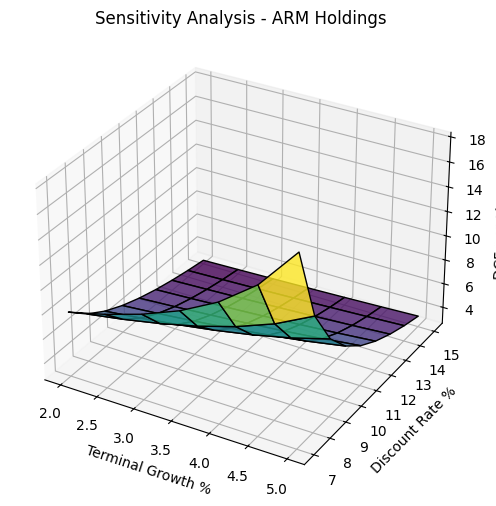

In [ ]:
# =============================
# ARM Holdings DCF Estimation
# =============================
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# Step 1: Inputs
# -----------------------------
ticker = "ARM.L"
sp500_ticker = "^GSPC"
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"
fred = Fred(api_key=fred_api_key)

# -----------------------------
# Step 2: Fetch Company Data
# -----------------------------
company = yf.Ticker(ticker)
info = company.info

market_cap = info.get('marketCap', None)
if market_cap is None:
    print("Market cap not available. Using fallback: 50B USD")
    market_cap = 50_000_000_000  # fallback

shares_outstanding = info.get('sharesOutstanding', None)
if shares_outstanding is None:
    shares_outstanding = 1_000_000_000  # fallback

# Fallback financials
debt = 500_000_000      # 500M USD
cash = 200_000_000      # 200M USD
fcf = 300_000_000       # 300M USD
cost_of_equity = 0.10
cost_of_debt = 0.045
tax_rate = 0.21
WACC = (market_cap/(market_cap+debt-cash))*cost_of_equity + (debt/(market_cap+debt-cash))*cost_of_debt*(1-tax_rate)
beta = info.get('beta', 1.0)

print(f"Market Cap: ${market_cap/1e9:.2f}B")
print(f"Shares Outstanding: {shares_outstanding/1e6:.0f}M")
print(f"Beta: {beta}")
print(f"WACC: {WACC*100:.2f}%")
print(f"FCF: ${fcf/1e6:.0f}M")

# -----------------------------
# Step 3: Project FCF (5 years)
# -----------------------------
growth_rate = 0.08
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print([f"${x/1e6:.0f}M" for x in fcf_proj])

# -----------------------------
# Step 4: Terminal Value
# -----------------------------
terminal_growth = 0.03
terminal_value = fcf_proj[-1]*(1+terminal_growth)/(WACC-terminal_growth)
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total/1e9:.2f}B")
print(f"DCF per Share: ${dcf_per_share:.2f}")

# -----------------------------
# Step 5: Sensitivity Analysis (WACC 7%-15%, Terminal Growth 2%-5%)
# -----------------------------
discount_rates = np.arange(0.07, 0.16, 0.01)  # 7% to 15%
terminal_growths = np.arange(0.02, 0.051, 0.005)  # 2% to 5%

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)

# -----------------------------
# Step 6: 3D Plot
# -----------------------------
X, Y = np.meshgrid([g*100 for g in terminal_growths], [r*100 for r in discount_rates])
Z = values

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_xlabel('Terminal Growth %')
ax.set_ylabel('Discount Rate %')
ax.set_zlabel('DCF per Share $')
ax.set_title('Sensitivity Analysis - ARM Holdings')
plt.show()


In [ ]:
# 📦 Install if needed
# !pip install yfinance numpy pandas

import yfinance as yf
import numpy as np

def calculate_dcf(ticker, discount_rate=0.10, terminal_growth=0.03, forecast_years=5):
    """
    Calculate DCF value for a company (per share)

    Parameters:
    ticker: str - stock ticker symbol
    discount_rate: float - WACC / discount rate (default 10%)
    terminal_growth: float - Terminal growth rate for perpetuity (default 3%)
    forecast_years: int - number of years to project FCF (default 5)

    Returns:
    dcf_per_share: float - intrinsic value per share
    """
    # Fetch company data
    company = yf.Ticker(ticker)

    # Get Free Cash Flow (FCF) history (quarterly or annual)
    try:
        cashflow = company.cashflow
        fcf_history = cashflow.loc['Cash Flow From Continuing Operating Activities'] - cashflow.loc['Capital Expenditure']
        fcf_history = fcf_history.dropna()
    except Exception as e:
        print(f"Error fetching cashflow data for {ticker}: {e}")
        return None

    # Ensure at least 3 years of FCF
    if len(fcf_history) < 3:
        print("Not enough FCF history for accurate DCF calculation.")
        return None

    # Reverse to chronological order
    fcf_history = fcf_history[::-1]

    # Calculate historical FCF CAGR
    try:
        fcf_start = fcf_history.iloc[0]
        fcf_end = fcf_history.iloc[-1]
        years = len(fcf_history) - 1
        cagr = (fcf_end / fcf_start)**(1/years) - 1
    except:
        cagr = 0.05  # fallback if calculation fails

    # Project future FCF
    last_fcf = fcf_history.iloc[-1]
    projected_fcfs = [last_fcf * ((1 + cagr) ** (i+1)) for i in range(forecast_years)]

    # Discount projected FCFs to present value
    discounted_fcfs = [fcf / ((1 + discount_rate) ** (i+1)) for i, fcf in enumerate(projected_fcfs)]

    # Terminal value (perpetuity)
    terminal_value = projected_fcfs[-1] * (1 + terminal_growth) / (discount_rate - terminal_growth)
    discounted_terminal_value = terminal_value / ((1 + discount_rate) ** forecast_years)

    # Total firm value
    total_value = sum(discounted_fcfs) + discounted_terminal_value

    # Get shares outstanding
    try:
        shares_outstanding = company.info['sharesOutstanding']
    except:
        shares_outstanding = 1e9  # fallback

    # DCF per share
    dcf_per_share = total_value / shares_outstanding

    return {
        'Ticker': ticker,
        'DCF Value per Share': round(dcf_per_share, 2),
        'Last FCF': round(last_fcf/1e6, 2),  # in millions
        'FCF CAGR': round(cagr*100, 2),
        'Projected Years': forecast_years
    }

# Example usage:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'ARM', 'NVDA']  # ARM if available
for t in tickers:
    result = calculate_dcf(t)
    if result:
        print(result)


{'Ticker': 'AAPL', 'DCF Value per Share': np.float64(129.44), 'Last FCF': np.float64(127701.0), 'FCF CAGR': np.float64(3.52), 'Projected Years': 5}
{'Ticker': 'MSFT', 'DCF Value per Share': np.float64(825.43), 'Last FCF': np.float64(200713.0), 'FCF CAGR': np.float64(21.13), 'Projected Years': 5}
{'Ticker': 'GOOGL', 'DCF Value per Share': np.float64(742.93), 'Last FCF': np.float64(177834.0), 'FCF CAGR': np.float64(15.21), 'Projected Years': 5}
{'Ticker': 'ARM', 'DCF Value per Share': np.float64(10.06), 'Last FCF': np.float64(636.0), 'FCF CAGR': np.float64(6.07), 'Projected Years': 5}
{'Ticker': 'NVDA', 'DCF Value per Share': np.float64(688.01), 'Last FCF': np.float64(67325.0), 'FCF CAGR': np.float64(88.3), 'Projected Years': 5}


In [ ]:


# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "ARM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
# cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity = 0.09
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
# cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
cost_of_debt = 0.025
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

# WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
WACC = 0.06125
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.03  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.057
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC , WACC+0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-4260547923.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-4260547923.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 1.0
Cost of Equity: 9.00%
Cost of Debt: 2.50%
WACC (Discount Rate): 6.12%

Projected FCF (next 5 years, USD):
[np.float64(162740000.0), np.float64(167622200.0), np.float64(172650866.0), np.float64(177830391.98000002), np.float64(183165303.7394)]

Total DCF Value: $34,563,702,365.28
DCF per Share: $32.63

Sensitivity Analysis (DCF per share $):
          2.0%      3.0%      4.0%
6.1%  3.858800  4.916338  6.969205
7.1%  3.103401  3.724498  4.743097
8.1%  2.594738  2.997767  3.596204


/tmp/ipython-input-4260547923.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-4260547923.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
/tmp/ipython-input-4260547923.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_in

In [ ]:


# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "NVDA"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
# cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity = 0.09
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
# cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

# WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
WACC = 0.07
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.03  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC , WACC+0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-3965651585.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-3965651585.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 2.145
Cost of Equity: 9.00%
Cost of Debt: 4.50%
WACC (Discount Rate): 7.00%

Projected FCF (next 5 years, USD):
[np.float64(62678590000.0), np.float64(64558947700.0), np.float64(66495716131.0), np.float64(68490587614.93001), np.float64(70545305243.3779)]

Total DCF Value: $1,566,964,750,000.00
DCF per Share: $64.25

Sensitivity Analysis (DCF per share $):
           2.0%       3.0%       4.0%
7.0%  53.218494  64.252519  82.642559
8.0%  44.314683  51.402015  62.033013
9.0%  37.955867  42.835012  49.665816


/tmp/ipython-input-3965651585.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-3965651585.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
/tmp/ipython-input-3965651585.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_in

In [ ]:


# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "QCOM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap', None)
debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0
shares_outstanding = info.get('sharesOutstanding', 1)

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta', 1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
# cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
cost_of_equity = 0.09
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0] if 'Interest Paid Supplemental Data' in cf.index else 0
# cost_of_debt = (interest_expense / debt) if debt != 0 else 0.05
cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
tax_expense = bs.loc['Total Tax Payable'][0] if 'Total Tax Payable' in bs.index else 0
tax_rate = tax_expense / net_income if net_income != 0 else 0.21

# WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
WACC = 0.09
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================
try:
    o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
    capex = cf.loc['Capital Expenditure'][0]
    fcf = o_cash_flow + capex
except:
    fcf = 1_000_000_000

growth_rate = 0.02  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.02
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC , WACC+0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-3117378971.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0] if 'Total Debt' in bs.index else 0
/tmp/ipython-input-3117378971.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0] if 'Cash And Cash Equivalents' in bs.index else 0


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 1.228
Cost of Equity: 9.00%
Cost of Debt: 4.50%
WACC (Discount Rate): 9.00%

Projected FCF (next 5 years, USD):
[np.float64(11477040000.0), np.float64(11706580800.0), np.float64(11940712416.000002), np.float64(12179526664.32), np.float64(12423117197.6064)]

Total DCF Value: $163,957,714,285.71
DCF per Share: $151.95

Sensitivity Analysis (DCF per share $):
             2.0%        3.0%        4.0%
9.0%   151.953387  171.373593  198.561881
10.0%  132.959214  147.001905  165.725493
11.0%  118.185968  128.719759  142.263204


/tmp/ipython-input-3117378971.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-3117378971.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0] if 'Net Income From Continuing Operations' in cf.index else 0
/tmp/ipython-input-3117378971.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

Market Cap: $146.09B
Shares Outstanding: 1059M
Beta: 1.0
WACC: 5.25%
FCF: $300M

Projected FCF (next 5 years, USD):
['$309M', '$318M', '$328M', '$338M', '$348M']

Current Price of ARM: $137.92

Total DCF Value: $38.93B
DCF per Share: $36.75

Sensitivity Analysis (DCF per share $):
           4.0%       4.5%       5.0%       5.5%       6.0%       6.5%
7.0%   9.380144  11.049998  13.554778  17.729412  26.078681  51.126486
8.0%   7.040907   7.902797   9.051983  10.660844  13.074136  17.096288
9.0%   5.637198   6.154074   6.800169   7.630863   8.738454  10.289082
10.0%  4.701260   5.041034   5.448763   5.947098   6.570017   7.370913
11.0%  4.032625   4.270293   4.547573   4.875267   5.268500   5.749119
12.0%  3.531058   3.704938   3.903659   4.132952   4.400461   4.716608
13.0%  3.140873   3.272486   3.420551   3.588358   3.780138   4.001421
14.0%  2.828660   2.930973   3.044654   3.171710   3.314648   3.476644
15.0%  2.573155   2.654420   2.743811   2.842612   2.952390   3.075084


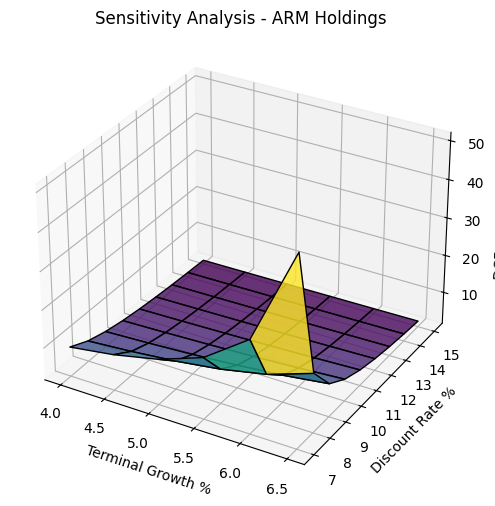

In [ ]:
# =============================
# ARM Holdings DCF Estimation
# =============================
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# -----------------------------
# Step 1: Inputs
# -----------------------------
ticker = "ARM"
sp500_ticker = "^GSPC"
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"
fred = Fred(api_key=fred_api_key)

# -----------------------------
# Step 2: Fetch Company Data
# -----------------------------
company = yf.Ticker(ticker)
info = company.info

market_cap = info.get('marketCap', None)
if market_cap is None:
    print("Market cap not available. Using fallback: 50B USD")
    market_cap = 50_000_000_000  # fallback

shares_outstanding = info.get('sharesOutstanding', None)
if shares_outstanding is None:
    shares_outstanding = 1_000_000_000  # fallback

# Fallback financials
debt = 500_000_000      # 500M USD
cash = 200_000_000      # 200M USD
fcf = 300_000_000       # 300M USD
cost_of_equity = 0.10
cost_of_debt = 0.045
tax_rate = 0.21
# WACC = (market_cap/(market_cap+debt-cash))*cost_of_equity + (debt/(market_cap+debt-cash))*cost_of_debt*(1-tax_rate)
WACC = 0.0525
beta = info.get('beta', 1.0)

print(f"Market Cap: ${market_cap/1e9:.2f}B")
print(f"Shares Outstanding: {shares_outstanding/1e6:.0f}M")
print(f"Beta: {beta}")
print(f"WACC: {WACC*100:.2f}%")
print(f"FCF: ${fcf/1e6:.0f}M")

# -----------------------------
# Step 3: Project FCF (5 years)
# -----------------------------
growth_rate = 0.03
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print([f"${x/1e6:.0f}M" for x in fcf_proj])

# -----------------------------
# Step 4: Terminal Value
# -----------------------------
terminal_growth = 0.045
terminal_value = fcf_proj[-1]*(1+terminal_growth)/(WACC-terminal_growth)
pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nCurrent Price of {ticker}: ${info.get('currentPrice')}")
print(f"\nTotal DCF Value: ${dcf_total/1e9:.2f}B")
print(f"DCF per Share: ${dcf_per_share:.2f}")

# -----------------------------
# Step 5: Sensitivity Analysis (WACC 7%-15%, Terminal Growth 2%-5%)
# -----------------------------
discount_rates = np.arange(0.07, 0.16, 0.01)  # 7% to 15%
terminal_growths = np.arange(0.04, 0.0651, 0.005)  # 2% to 5%

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)

# -----------------------------
# Step 6: 3D Plot
# -----------------------------
X, Y = np.meshgrid([g*100 for g in terminal_growths], [r*100 for r in discount_rates])
Z = values

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.8)
ax.set_xlabel('Terminal Growth %')
ax.set_ylabel('Discount Rate %')
ax.set_zlabel('DCF per Share $')
ax.set_title('Sensitivity Analysis - ARM Holdings')
plt.show()


In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "NVDA"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap')
debt = bs.loc['Total Debt'][0]
cash = bs.loc['Cash And Cash Equivalents'][0]
shares_outstanding = info.get('sharesOutstanding')

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta')
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
# cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
print("interest_expense is",interest_expense)
cost_of_debt = (interest_expense / debt)
# cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0]
tax_expense = bs.loc['Total Tax Payable'][0]
tax_rate = tax_expense / net_income

WACC = (E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate)
# WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================

o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
capex = cf.loc['Capital Expenditure'][0]
fcf = o_cash_flow + capex


growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.01, WACC, WACC + 0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04, 0.05]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-7332539.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0]
/tmp/ipython-input-7332539.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0]


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 2.145
Cost of Equity: 24.34%
interest_expense is 246000000.0
Cost of Debt: 2.40%
WACC (Discount Rate): 24.33%

Projected FCF (next 5 years, USD):
[np.float64(65721240000.00001), np.float64(70978939200.0), np.float64(76657254336.00002), np.float64(82789834682.88002), np.float64(89413021457.51044)]

Total DCF Value: $348,669,562,834.86
DCF per Share: $14.30

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%       5.0%
23.3%  14.668037  15.033286  15.436318  15.883315
24.3%  13.975030  14.297002  14.650642  15.040863
25.3%  13.342480  13.627572  13.939391  14.281879
26.3%  12.762893  13.016367  13.292540  13.594603


/tmp/ipython-input-7332539.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-7332539.py:74: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
/tmp/ipython-input-7332539.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0]
/tmp/ip

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "QCOM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap')
debt = bs.loc['Total Debt'][0]
cash = bs.loc['Cash And Cash Equivalents'][0]
shares_outstanding = info.get('sharesOutstanding')

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta')
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
# cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
# interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
interest_expense = 500000000
cost_of_debt = (interest_expense / debt)
# cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0]
tax_expense = bs.loc['Total Tax Payable'][0]
tax_rate = tax_expense / net_income

WACC = ((E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate))/2
# WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================

o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
capex = cf.loc['Capital Expenditure'][0]
fcf = o_cash_flow + capex


growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.01, WACC, WACC + 0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04, 0.05]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-3121623731.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0]
/tmp/ipython-input-3121623731.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0]


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 1.228
Cost of Equity: 15.67%
Cost of Debt: 3.42%
WACC (Discount Rate): 7.66%

Projected FCF (next 5 years, USD):
[np.float64(12152160000.0), np.float64(13124332800.000002), np.float64(14174279424.000002), np.float64(15308221777.920004), np.float64(16532879520.153606)]

Total DCF Value: $309,406,299,315.37
DCF per Share: $286.75

Sensitivity Analysis (DCF per share $):
            2.0%        3.0%        4.0%        5.0%
6.7%  297.056123  366.447434  487.999888  755.943630
7.7%  243.522736  286.752809  353.601669  470.700524
8.7%  206.096628  235.247711  276.908238  341.330031
9.7%  178.468653  199.234102  227.336321  267.497893


/tmp/ipython-input-3121623731.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-3121623731.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0]
/tmp/ipython-input-3121623731.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax_expense = bs.loc['Total Tax Payable'][0]
/tmp/ipython-inpu

In [ ]:
cf.T.columns

Index(['Free Cash Flow', 'Repurchase Of Capital Stock', 'Repayment Of Debt',
       'Issuance Of Debt', 'Issuance Of Capital Stock', 'Capital Expenditure',
       'End Cash Position', 'Beginning Cash Position',
       'Effect Of Exchange Rate Changes', 'Changes In Cash',
       'Financing Cash Flow', 'Cash From Discontinued Financing Activities',
       'Cash Flow From Continuing Financing Activities',
       'Net Other Financing Charges', 'Cash Dividends Paid',
       'Common Stock Dividend Paid', 'Net Common Stock Issuance',
       'Common Stock Payments', 'Common Stock Issuance',
       'Net Issuance Payments Of Debt', 'Net Short Term Debt Issuance',
       'Short Term Debt Payments', 'Short Term Debt Issuance',
       'Net Long Term Debt Issuance', 'Long Term Debt Payments',
       'Long Term Debt Issuance', 'Investing Cash Flow',
       'Cash From Discontinued Investing Activities',
       'Cash Flow From Continuing Investing Activities',
       'Net Other Investing Changes', 'Net

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "NVDA"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap')
debt = bs.loc['Total Debt'][0]
cash = bs.loc['Cash And Cash Equivalents'][0]
shares_outstanding = info.get('sharesOutstanding')

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta')
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
# cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
# interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
interest_expense = 500000000
cost_of_debt = (interest_expense / debt)
# cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0]
tax_expense = bs.loc['Total Tax Payable'][0]
tax_rate = tax_expense / net_income

WACC = ((E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate))/2
# WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================

o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
capex = cf.loc['Capital Expenditure'][0]
fcf = o_cash_flow + capex


growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.01, WACC, WACC + 0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04, 0.05]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-881230466.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0]
/tmp/ipython-input-881230466.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0]


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 2.145
Cost of Equity: 24.34%
Cost of Debt: 4.87%
WACC (Discount Rate): 12.17%

Projected FCF (next 5 years, USD):
[np.float64(65721240000.00001), np.float64(70978939200.0), np.float64(76657254336.00002), np.float64(82789834682.88002), np.float64(89413021457.51044)]

Total DCF Value: $837,532,595,019.76
DCF per Share: $34.34

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%       5.0%
11.2%  35.465866  38.669821  42.767485  48.193397
12.2%  31.859245  34.342559  37.433780  41.387263
13.2%  28.902163  30.869730  33.266427  36.249828
14.2%  26.434346  28.021713  29.921246  32.235070


/tmp/ipython-input-881230466.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-881230466.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0]
/tmp/ipython-input-881230466.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax_expense = bs.loc['Total Tax Payable'][0]
/tmp/ipython-input-8

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "ARM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap')
debt = bs.loc['Total Debt'][0]
cash = bs.loc['Cash And Cash Equivalents'][0]
shares_outstanding = info.get('sharesOutstanding')

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta',1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
# cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
# interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
interest_expense = 500000000
cost_of_debt = (interest_expense / debt)
# cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0]
tax_expense = bs.loc['Total Tax Payable'][0]
tax_rate = tax_expense / net_income

WACC = ((E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate))/2
# WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================

o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
capex = cf.loc['Capital Expenditure'][0]
fcf = o_cash_flow + capex


growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.06
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.01, WACC, WACC + 0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04, 0.05]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-3205236785.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0]
/tmp/ipython-input-3205236785.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0]


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 1.0
Cost of Equity: 13.51%
Cost of Debt: 140.45%
WACC (Discount Rate): 6.94%

Projected FCF (next 5 years, USD):
[np.float64(170640000.0), np.float64(184291200.00000003), np.float64(199034496.00000003), np.float64(214957255.68000004), np.float64(232153836.1344001)]

Total DCF Value: $19,529,763,853.25
DCF per Share: $18.44

Sensitivity Analysis (DCF per share $):
          2.0%      3.0%      4.0%       5.0%
5.9%  5.042189  6.544177  9.594540  19.134452
6.9%  4.003738  4.864674  6.311265   9.249122
7.9%  3.315472  3.865666  4.695139   6.088863
8.9%  2.825996  3.203451  3.733719   4.533152


/tmp/ipython-input-3205236785.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-3205236785.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0]
/tmp/ipython-input-3205236785.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax_expense = bs.loc['Total Tax Payable'][0]
/tmp/ipython-inpu

In [ ]:
ticker = "ARM"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

In [ ]:
info

{'address1': '110 Fulbourn Road',
 'city': 'Cambridge',
 'zip': 'CB1 9NJ',
 'country': 'United Kingdom',
 'phone': '44 1223 400 400',
 'website': 'https://www.arm.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "Arm Holdings plc architects, develops, and licenses central processing unit products and related technologies for semiconductor companies and original equipment manufacturers. The company is involved in the licensing, marketing, research, and development of microprocessors, systems intellectual property (IPs), graphics processing units, physical IP and associated systems IPs, software, tools, and other related services. It also offers arm central processing units, accelerators, system IP products, and compute platform products, as well as development tools and software. The company's products are used in various mark

In [ ]:
print(info.get('beta'))

None


In [ ]:

# =============================
# Step 0: Install packages
# =============================
!pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "NVDA"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap')
debt = bs.loc['Total Debt'][0]
cash = bs.loc['Cash And Cash Equivalents'][0]
shares_outstanding = info.get('sharesOutstanding')

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta')
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
# cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
# interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
interest_expense = 500000000
cost_of_debt = (interest_expense / debt)
# cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0]
tax_expense = bs.loc['Total Tax Payable'][0]
tax_rate = tax_expense / net_income

WACC = ((E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate))/2
# WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================

o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
capex = cf.loc['Capital Expenditure'][0]
fcf = o_cash_flow + capex


growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\n Current price: {info.get('currentPrice')}")
print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.01, WACC, WACC + 0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04, 0.05]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-743444120.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0]
/tmp/ipython-input-743444120.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0]


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 2.145
Cost of Equity: 24.34%
Cost of Debt: 4.87%
WACC (Discount Rate): 12.17%

Projected FCF (next 5 years, USD):
[np.float64(65721240000.00001), np.float64(70978939200.0), np.float64(76657254336.00002), np.float64(82789834682.88002), np.float64(89413021457.51044)]

 Current price: 177.99

Total DCF Value: $837,532,595,019.76
DCF per Share: $34.34

Sensitivity Analysis (DCF per share $):
            2.0%       3.0%       4.0%       5.0%
11.2%  35.465866  38.669821  42.767485  48.193397
12.2%  31.859245  34.342559  37.433780  41.387263
13.2%  28.902163  30.869730  33.266427  36.249828
14.2%  26.434346  28.021713  29.921246  32.235070


/tmp/ipython-input-743444120.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-743444120.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0]
/tmp/ipython-input-743444120.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax_expense = bs.loc['Total Tax Payable'][0]
/tmp/ipython-input-7

In [ ]:

# =============================
# Step 0: Install packages
# =============================
# !pip install yfinance pandas numpy fredapi

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from fredapi import Fred

# =============================
# Step 1: Inputs
# =============================
ticker = "MSFT"  # Example company
sp500_ticker = "^GSPC"  # S&P 500 index

# Your FRED API key
fred_api_key = "2b045fcd378377e27d5d1f3feac9cbfe"  # Get from https://fred.stlouisfed.org/
fred = Fred(api_key=fred_api_key)

# =============================
# Step 2: Fetch Company Data
# =============================
company = yf.Ticker(ticker)
bs = company.balance_sheet
cf = company.cashflow
info = company.info

market_cap = info.get('marketCap')
debt = bs.loc['Total Debt'][0]
cash = bs.loc['Cash And Cash Equivalents'][0]
shares_outstanding = info.get('sharesOutstanding')

# =============================
# Step 3: Fetch Risk-Free Rate (10Y US Treasury)
# =============================
# Using FRED 10-year Treasury Constant Maturity
# Fetch the latest 10Y US Treasury yield from FRED
ten_yield_series = fred.get_series_latest_release('DGS10')  # returns a Series
ten_yield = ten_yield_series.values[0]  # extract the numeric value
risk_free_rate = ten_yield / 100

print(f"Current 10Y US Treasury Yield (Risk-free rate): {risk_free_rate*100:.2f}%")


# =============================
# Step 4: Fetch Market Return (S&P 500 expected)
# =============================
sp500 = yf.Ticker(sp500_ticker)
sp500_hist = sp500.history(period="5y")['Close']

# Annualized historical return
sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
market_return = sp500_return
print(f"Estimated Market Return (S&P 500 5Y CAGR): {market_return*100:.2f}%")

# =============================
# Step 5: Company Beta
# =============================
beta = info.get('beta',1.0)
print(f"Company Beta: {beta}")

# =============================
# Step 6: Cost of Equity using CAPM
# =============================
cost_of_equity = risk_free_rate + beta * (market_return - risk_free_rate)
# cost_of_equity = 0.093
print(f"Cost of Equity: {cost_of_equity*100:.2f}%")

# =============================
# Step 7: Cost of Debt
# =============================
# interest_expense = cf.loc['Interest Paid Supplemental Data'][0]
interest_expense = 500000000
cost_of_debt = (interest_expense / debt)
# cost_of_debt = 0.045
print(f"Cost of Debt: {cost_of_debt*100:.2f}%")

# =============================
# Step 8: WACC
# =============================
V = market_cap + debt - cash
E = market_cap
D = debt

# Tax rate approx
net_income = cf.loc['Net Income From Continuing Operations'][0]
tax_expense = bs.loc['Total Tax Payable'][0]
tax_rate = tax_expense / net_income

WACC = ((E/V)*cost_of_equity + (D/V)*cost_of_debt*(1-tax_rate))/2
# WACC = 0.093
print(f"WACC (Discount Rate): {WACC*100:.2f}%")

# =============================
# Step 9: Free Cash Flow Projection
# =============================

o_cash_flow = cf.loc['Cash Flow From Continuing Operating Activities'][0]
capex = cf.loc['Capital Expenditure'][0]
fcf = o_cash_flow + capex


growth_rate = 0.08  # Assumed growth rate
years = 5
fcf_proj = [fcf * ((1 + growth_rate)**i) for i in range(1, years+1)]
print("\nProjected FCF (next 5 years, USD):")
print(fcf_proj)

# =============================
# Step 10: Terminal Value
# =============================
terminal_growth = 0.03
terminal_value = fcf_proj[-1] * (1 + terminal_growth) / (WACC - terminal_growth)

pv_fcf = sum([fcf_proj[i]/((1+WACC)**(i+1)) for i in range(years)])
pv_terminal = terminal_value / ((1+WACC)**years)

dcf_total = pv_fcf + pv_terminal
dcf_per_share = dcf_total / shares_outstanding

print(f"\n Current price: {info.get('currentPrice')}")
print(f"\nTotal DCF Value: ${dcf_total:,.2f}")
print(f"DCF per Share: ${dcf_per_share:,.2f}")

# =============================
# Step 11: Sensitivity Analysis
# =============================
discount_rates = [WACC - 0.01, WACC, WACC + 0.01, WACC + 0.02]
terminal_growths = [0.02, 0.03, 0.04, 0.05]

values = np.zeros((len(discount_rates), len(terminal_growths)))
for i, r in enumerate(discount_rates):
    for j, g in enumerate(terminal_growths):
        pv_fcf = sum([fcf_proj[k]/((1+r)**(k+1)) for k in range(years)])
        tv = fcf_proj[-1]*(1+g)/(r-g)
        pv_tv = tv / ((1+r)**years)
        values[i,j] = (pv_fcf + pv_tv)/shares_outstanding

sensitivity_table = pd.DataFrame(values,
                                 index=[f"{r*100:.1f}%" for r in discount_rates],
                                 columns=[f"{g*100:.1f}%" for g in terminal_growths])

print("\nSensitivity Analysis (DCF per share $):")
print(sensitivity_table)


/tmp/ipython-input-689482223.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  debt = bs.loc['Total Debt'][0]
/tmp/ipython-input-689482223.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cash = bs.loc['Cash And Cash Equivalents'][0]


Current 10Y US Treasury Yield (Risk-free rate): 4.06%
Estimated Market Return (S&P 500 5Y CAGR): 13.51%
Company Beta: 1.055
Cost of Equity: 14.03%
Cost of Debt: 0.83%
WACC (Discount Rate): 6.97%

Projected FCF (next 5 years, USD):
[np.float64(77339880000.0), np.float64(83527070400.0), np.float64(90209236032.00002), np.float64(97425974914.56003), np.float64(105220052907.72484)]

 Current price: 507.23

Total DCF Value: $2,319,478,661,295.57
DCF per Share: $312.04

Sensitivity Analysis (DCF per share $):
            2.0%        3.0%        4.0%         5.0%
6.0%  323.424448  418.811867  611.192245  1201.507541
7.0%  257.167205  312.044348  403.914487   589.201104
8.0%  213.153199  248.303486  301.175591   389.689085
9.0%  181.802888  205.955198  239.832828   290.790637


/tmp/ipython-input-689482223.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_hist[-1] / sp500_hist[0]) ** (1/5) - 1
/tmp/ipython-input-689482223.py:88: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  net_income = cf.loc['Net Income From Continuing Operations'][0]
/tmp/ipython-input-689482223.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tax_expense = bs.loc['Total Tax Payable'][0]
/tmp/ipython-input-6